## Visualize Time Series

In [5]:
import os
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats

<class 'pandas.core.series.Series'>
(250, 1)


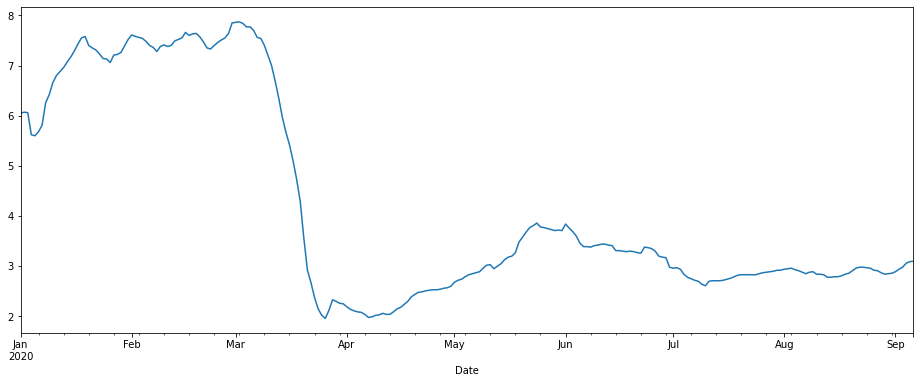

In [6]:
## Cuebiq Contact Index data

path="./data/"
df=pd.read_csv(path+'state_cuebiq_CCI.txt',dtype=object)
df = df [(df['state'] == 'Arizona')]
df=df.drop(['state'],axis=1)
#print(df.head())


# convert dataframe to series
df = df.T.squeeze()
print(type(df))
distance_df = df.to_frame()
distance_df.index.names = ['Date']
distance_df.index = pd.to_datetime(df.index) # convert to datetime
distance_df.columns=['Distance']
distance_df['Distance'] = pd.to_numeric(distance_df['Distance'])
distance_df=distance_df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
start = distance_df.index.searchsorted(dt.datetime(2020, 1, 1))
end = distance_df.index.searchsorted(dt.datetime(2020, 9, 7))
distance_df = distance_df.iloc[start:end]
print(distance_df.shape)
#distance_df
distance_df['Distance'].plot(figsize = (16,6))
plt.show()


<class 'pandas.core.series.Series'>
(95, 1)


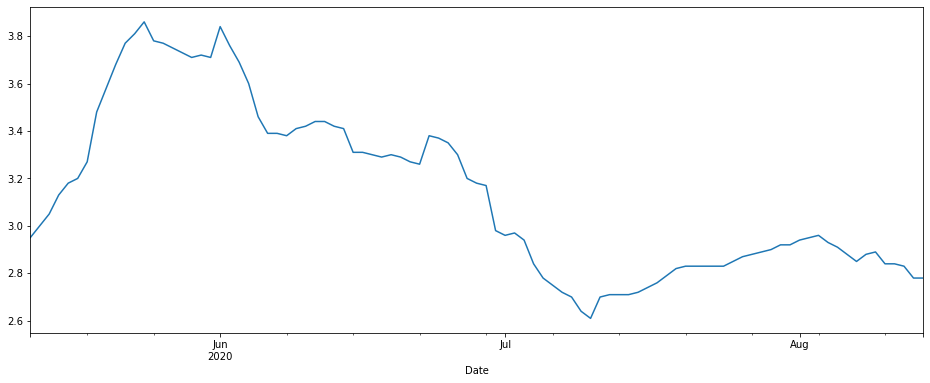

In [7]:


# convert dataframe to series
df = df.T.squeeze()
print(type(df))

distance_df = df.to_frame()
distance_df.index.names = ['Date']
distance_df.index = pd.to_datetime(df.index) # convert to datetime
distance_df.columns=['Distance']
distance_df['Distance'] = pd.to_numeric(distance_df['Distance'])
distance_df=distance_df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
start = distance_df.index.searchsorted(dt.datetime(2020, 5, 12))
end = distance_df.index.searchsorted(dt.datetime(2020, 8, 15))
distance_df = distance_df.iloc[start:end]
print(distance_df.shape)
#distance_df
distance_df['Distance'].plot(figsize = (16,6))
plt.show()


## Read NYT COVID-19 data

In [8]:
# Hospitialization Data
path="./data"
hospitial_data = pd.read_csv(path+'/nyt_us-states.csv', sep=',')
print(hospitial_data.head())

         date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0


          date    state  fips  cases  deaths
8   2020-01-26  Arizona     4      1       0
12  2020-01-27  Arizona     4      1       0
16  2020-01-28  Arizona     4      1       0
20  2020-01-29  Arizona     4      1       0
24  2020-01-30  Arizona     4      1       0


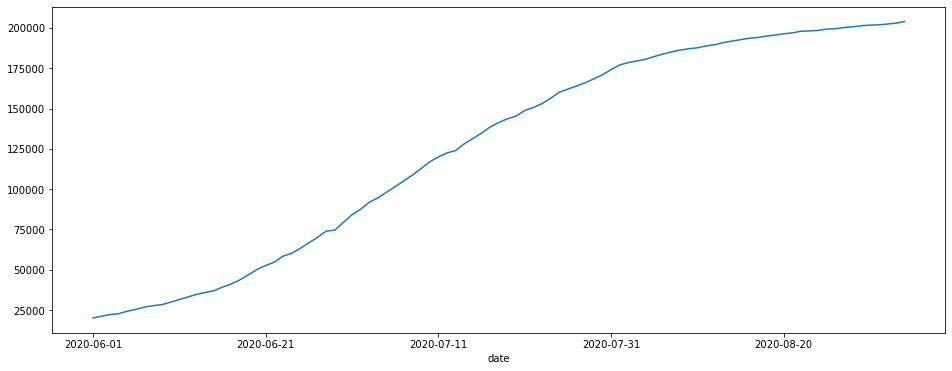

(95, 4)
[400, 1127, 995, 573, 1551, 1148, 1407, 837, 635, 1585, 1544, 1642, 1606, 1180, 1052, 2293, 1861, 2572, 3183, 3284, 2468, 2101, 3630, 1810, 3090, 3379, 3476, 3809, 641, 4797, 4753, 3343, 4399, 2722, 3510, 3416, 3617, 3551, 4073, 4164, 3044, 2488, 1438, 4209, 3285, 3319, 3845, 2758, 2311, 1676, 3410, 1929, 2370, 3363, 3663, 1986, 1877, 2076, 2367, 2544, 3203, 2911, 1454, 1033, 1031, 1693, 1514, 1360, 1122, 860, 548, 1146, 742, 1328, 960, 860, 884, 473, 904, 637, 737, 620, 984, 208, 304, 872, 202, 677, 522, 623, 378, 171, 509, 523, 1066]


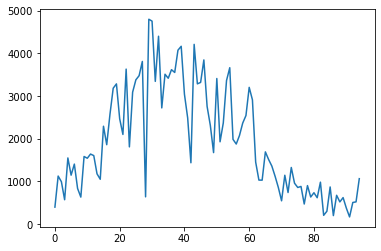

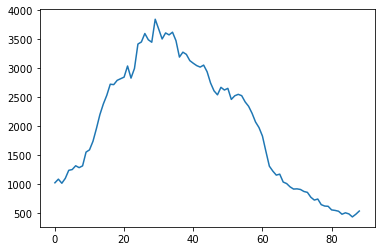

In [9]:

df = hospitial_data[hospitial_data['state'] == 'Arizona']
#df['date'] = pd.to_datetime(df['date'])
print(df.head())
start_date = '2020-06-01'
end_date = '2020-09-04'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask]

df.set_index('date',inplace=True)
df=df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
start = df.index.searchsorted(start_date)
end = df.index.searchsorted(end_date)
NY_hospitial_data = df.iloc[start:end]
NY_hospitial_data['cases'].plot(figsize = (16,6))
plt.show()

print(NY_hospitial_data.shape)
#print(NY_hospitial_data.head)

y=NY_hospitial_data['cases']
daily_hospitial_data = [None] * len(y)
daily_hospitial_data[0] = 400
for i in range(1,len(y)):
    daily_hospitial_data[i] = y[i] - y[i-1]
print(daily_hospitial_data)
plt.plot(daily_hospitial_data)
plt.show()

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

avg_daily_hospitial_data = moving_average(daily_hospitial_data,7)
plt.plot(avg_daily_hospitial_data)
plt.show()

## Correlation between Mobility/Contact Index and COVID-19 cases

In [10]:

## Correlation
x = np.array(distance_df['Distance'])
x = x.astype(float)
y = np.array(NY_hospitial_data['cases'])
print(x,y)
print(len(x),len(y))
daily = [None] * len(y)
daily[0] = 400
print(daily)
for i in range(1,len(y)):
    daily[i] = y[i] - y[i-1]
print(daily)

r, p = scipy.stats.pearsonr(x, y)
print(r,p)
r, p = scipy.stats.pearsonr(x, daily)
print(r,p)

r, p = scipy.stats.spearmanr(x, y)
print(r,p)
r, p = scipy.stats.spearmanr(x, daily)
print(r,p)

[2.95 3.   3.05 3.13 3.18 3.2  3.27 3.48 3.58 3.68 3.77 3.81 3.86 3.78
 3.77 3.75 3.73 3.71 3.72 3.71 3.84 3.76 3.69 3.6  3.46 3.39 3.39 3.38
 3.41 3.42 3.44 3.44 3.42 3.41 3.31 3.31 3.3  3.29 3.3  3.29 3.27 3.26
 3.38 3.37 3.35 3.3  3.2  3.18 3.17 2.98 2.96 2.97 2.94 2.84 2.78 2.75
 2.72 2.7  2.64 2.61 2.7  2.71 2.71 2.71 2.72 2.74 2.76 2.79 2.82 2.83
 2.83 2.83 2.83 2.83 2.85 2.87 2.88 2.89 2.9  2.92 2.92 2.94 2.95 2.96
 2.93 2.91 2.88 2.85 2.88 2.89 2.84 2.84 2.83 2.78 2.78] [ 20123  21250  22245  22818  24369  25517  26924  27761  28396  29981
  31525  33167  34773  35953  37005  39298  41159  43731  46914  50198
  52666  54767  58397  60207  63297  66676  70152  73961  74602  79399
  84152  87495  91894  94616  98126 101542 105159 108710 112783 116947
 119991 122479 123917 128126 131411 134730 138575 141333 143644 145320
 148730 150659 153029 156392 160055 162041 163918 165994 168361 170905
 174108 177019 178473 179506 180537 182230 183744 185104 186226 187086
 187634 188780 18952

## moving average

In [19]:
def moving_average_0(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

a=range(15)
print (moving_average(a,5))
print (moving_average_0(a,5))

print(len(daily))
daily_cases_moving_average = moving_average(daily,7)
print(len(daily_cases_moving_average))
print(len(x))
x_moving_average = moving_average(x,7)
print(len(x_moving_average))
r, p = scipy.stats.pearsonr(x_moving_average, daily_cases_moving_average)
print(r,p)
r, p = scipy.stats.spearmanr(x_moving_average, daily_cases_moving_average)
print(r,p)

[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
95
89
95
89
0.4195786357744731 4.260238000114202e-05
0.420703186517202 4.043087152561245e-05


## Looping the correlation analysis

        state 2020-01-01 2020-01-02 2020-01-03 2020-01-04 2020-01-05  \
0      Nevada       8.98       9.07       8.92       8.71       8.42   
1    Oklahoma        4.0       3.95       4.06       4.34       4.42   
2   Tennessee       6.07       5.99        5.8       5.67       5.49   
3    Colorado       3.84       3.87       3.86       3.88       3.71   
4  New Jersey       4.15       4.14       4.11       4.07       3.99   

  2020-01-06 2020-01-07 2020-01-08 2020-01-09  ... 2020-08-31 2020-09-01  \
0       8.14       7.88       7.91       7.77  ...       2.88       2.91   
1        4.5       4.54        4.8        5.0  ...       3.79       3.78   
2       5.16       5.05        5.2       5.28  ...       3.94       3.97   
3       3.59       3.51       3.61       3.58  ...       2.13       2.15   
4       4.05       4.22       4.56       4.69  ...       3.11        3.1   

  2020-09-02 2020-09-03 2020-09-04 2020-09-05 2020-09-06 2020-09-07  \
0       2.96       2.99       3.06     

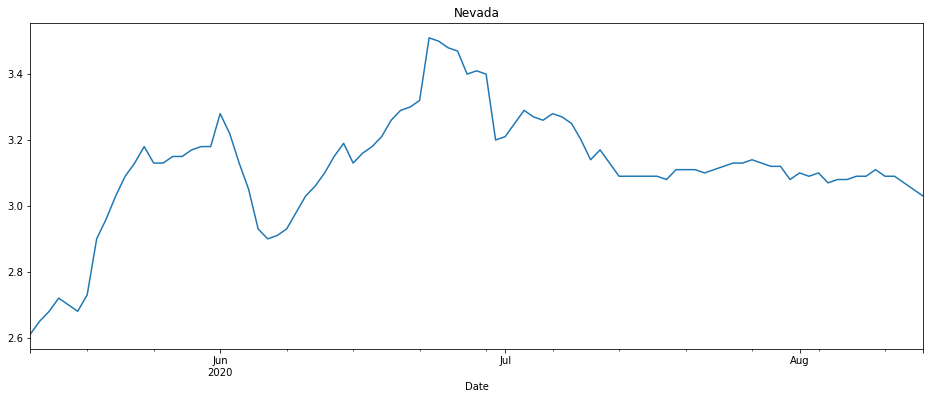

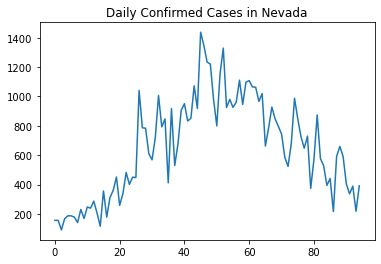

Nevada 0.6161589354802344 3.000612203234499e-11
Nevada 0.6822453201547216 1.8144291195600609e-13
Nevada 0.6510182801020852 4.955179932798498e-12


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


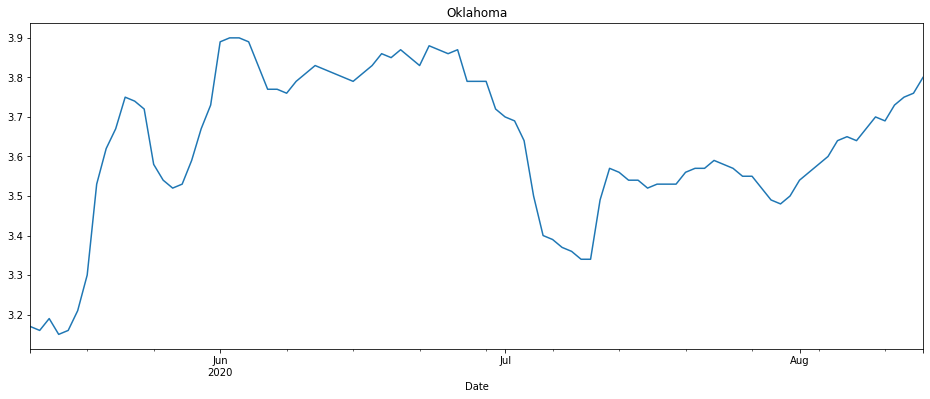

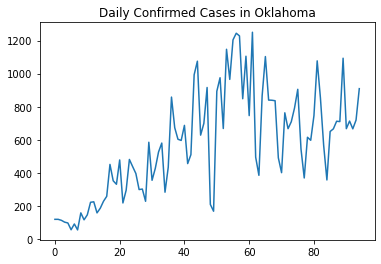

Oklahoma 0.03211034194459626 0.7573904778128234
Oklahoma -0.12713952009873825 0.2351088168767499
Oklahoma -0.2655447307982245 0.011901295535872415


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


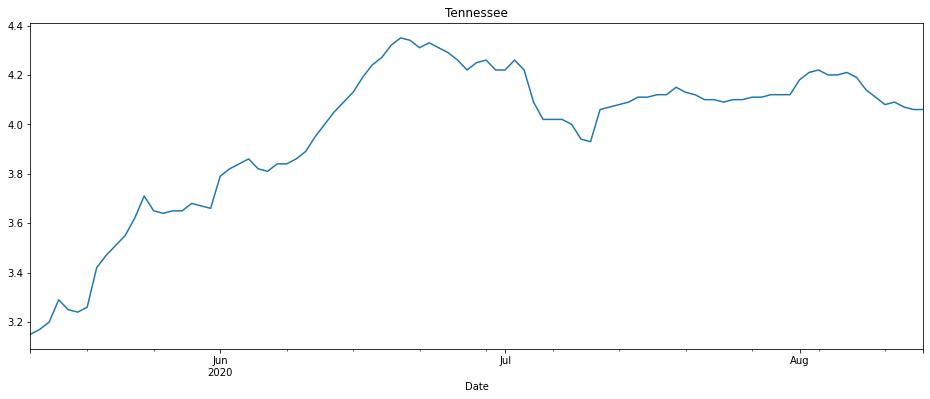

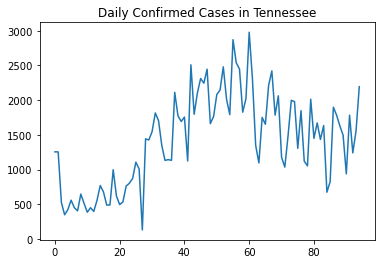

Tennessee 0.64731113855808 1.3585445277738682e-12
Tennessee 0.8099573999490907 7.2200096797188025e-22
Tennessee 0.6260746693224658 5.34303467964028e-11


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


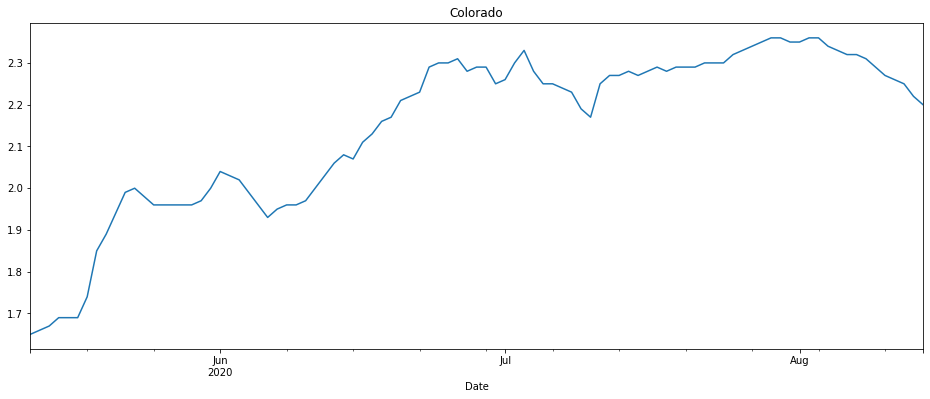

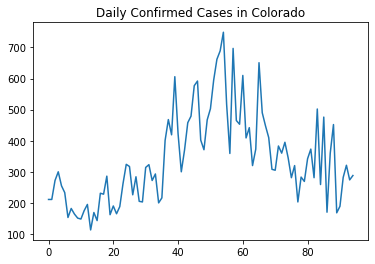

Colorado 0.5266130420859751 4.214927895563064e-08
Colorado 0.6689492164043538 7.787491069018818e-13
Colorado 0.5667551972231825 7.050410306517437e-09


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


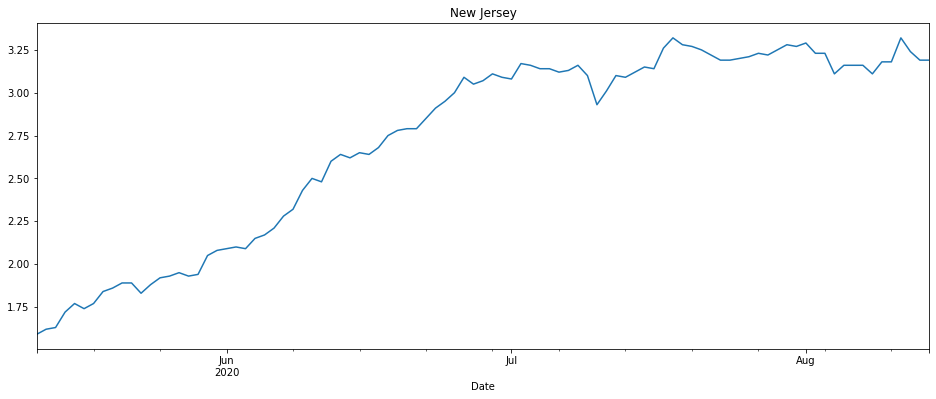

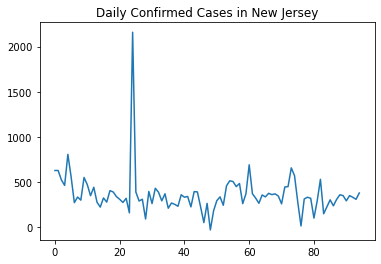

New Jersey -0.2265423003975497 0.027271025808844458
New Jersey -0.4315059471023551 2.42268983586428e-05
New Jersey -0.28962992913798963 0.005905054473233269


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


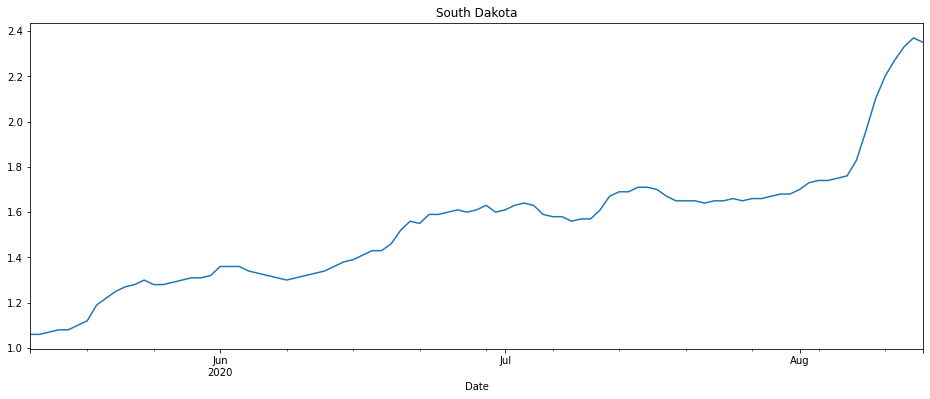

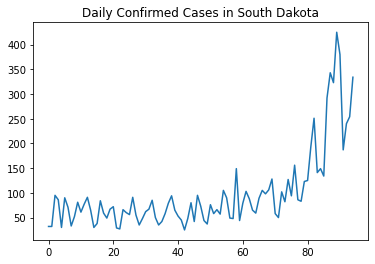

<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


South Dakota 0.7096982157313777 8.209701929064194e-16
South Dakota 0.7631940983225647 3.507483918627041e-18
South Dakota 0.7540703829797777 1.466253314757567e-17


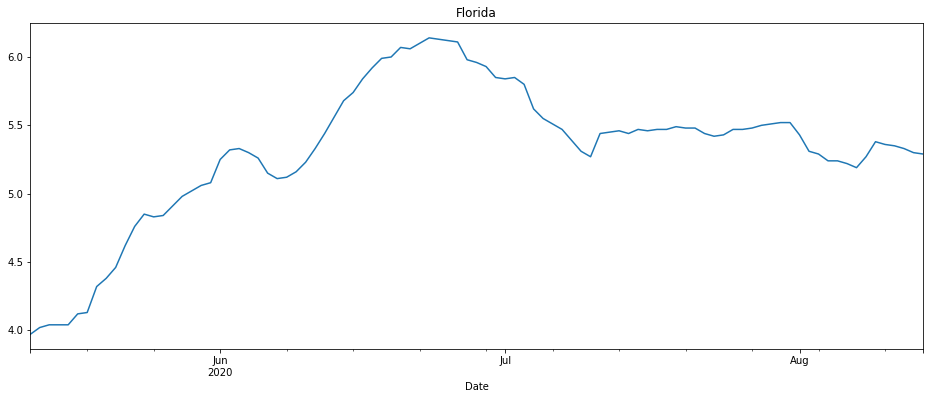

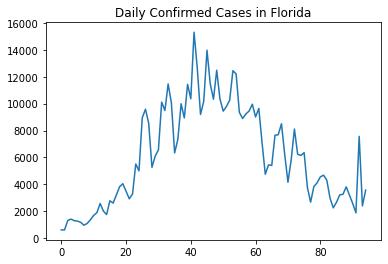

Florida 0.7683554269176883 1.0094044737900103e-19
Florida 0.8486510877875526 8.661985032109419e-26
Florida 0.8513787867734335 4.1738408152211574e-26


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


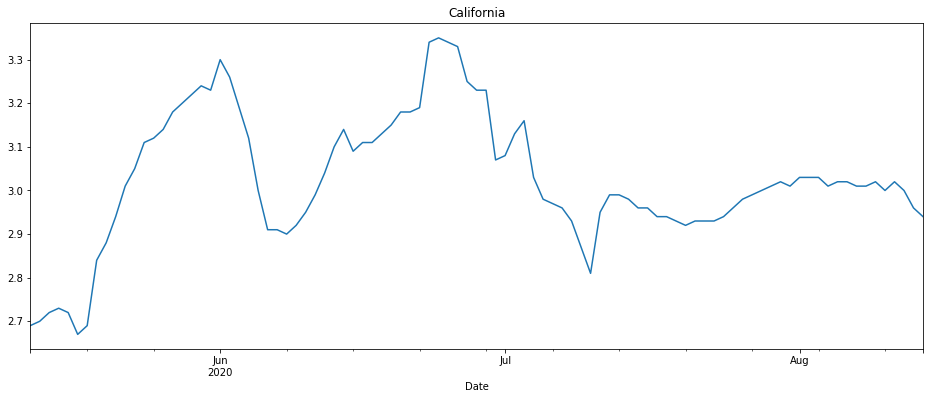

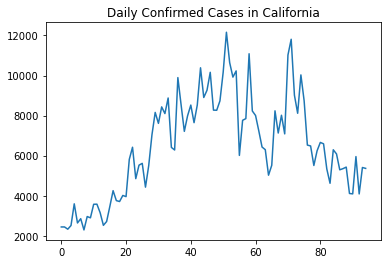

<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


California 0.3092468188188115 0.002293140011787156
California 0.2661621168758168 0.01169802456832736
California 0.17293965943473877 0.10508578478511724


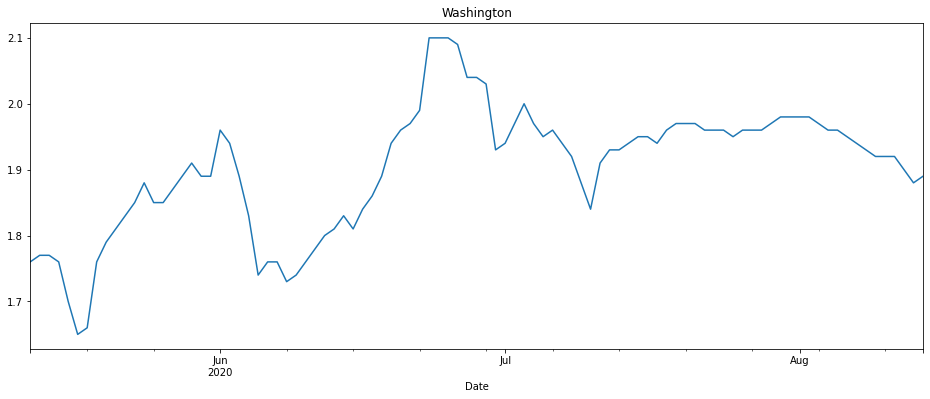

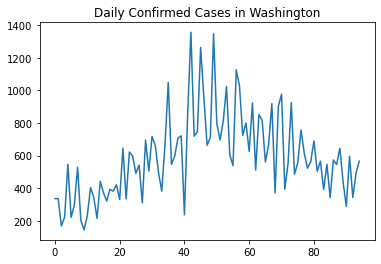

Washington 0.482223731024629 7.488610149828162e-07
Washington 0.6832934637201524 1.6123201994820052e-13
Washington 0.6556884447299606 3.0970530570232272e-12


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


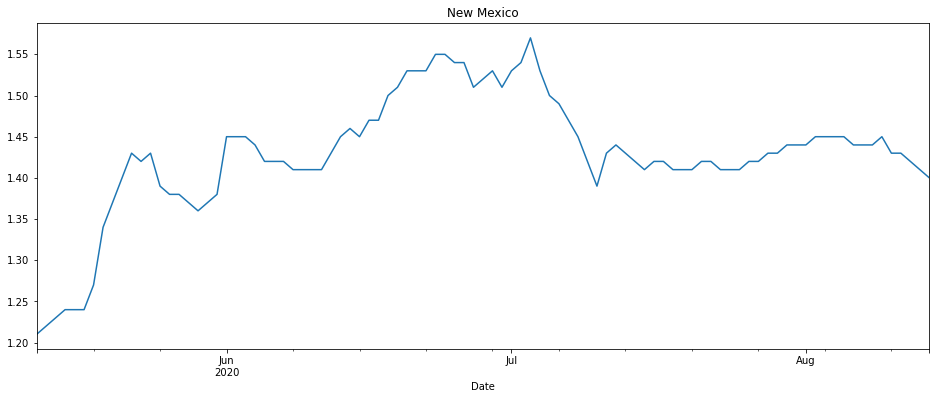

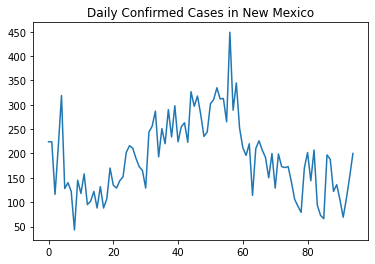

New Mexico 0.401591971046732 5.493121642583159e-05
New Mexico 0.6516066095805253 4.672418434910066e-12
New Mexico 0.6710398689362087 6.224044180293679e-13


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


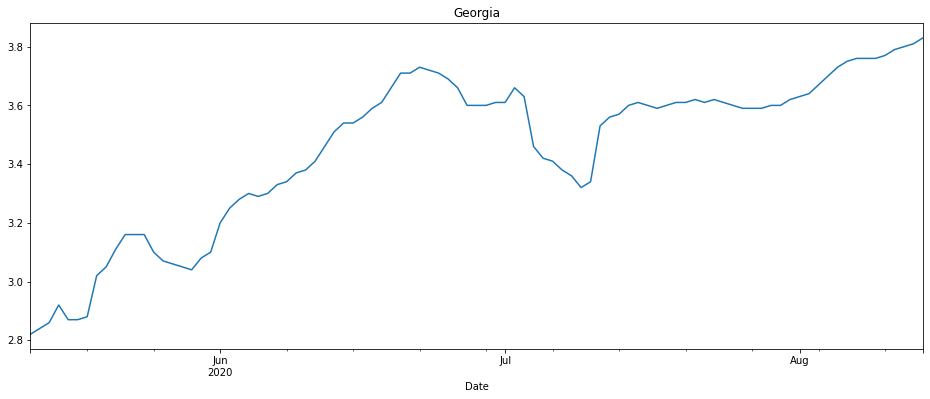

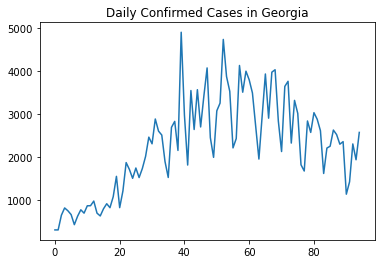

Georgia 0.6678616331326799 1.4391770448024622e-13
Georgia 0.7940015771269848 1.669810894507666e-20
Georgia 0.47695496556917777 2.2968184656361575e-06


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


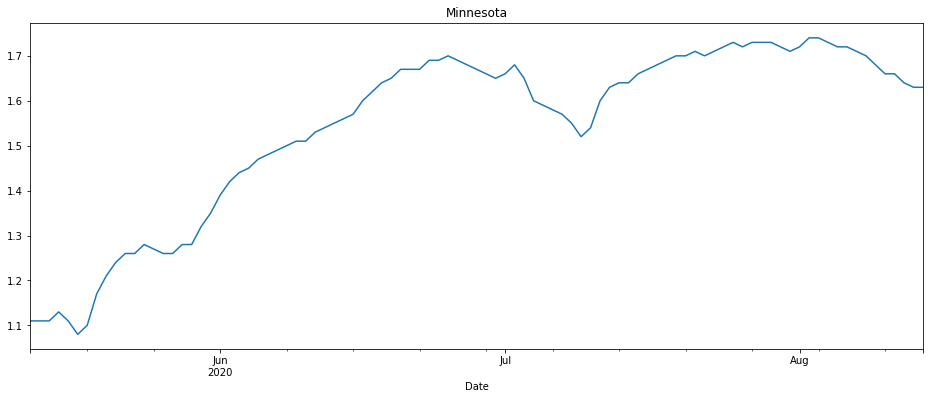

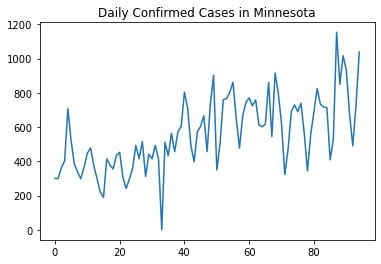

Minnesota 0.5392840095931948 1.714594279131374e-08
Minnesota 0.7512450082095983 2.2548872731573195e-17
Minnesota 0.6456081959674155 8.455114124405744e-12


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


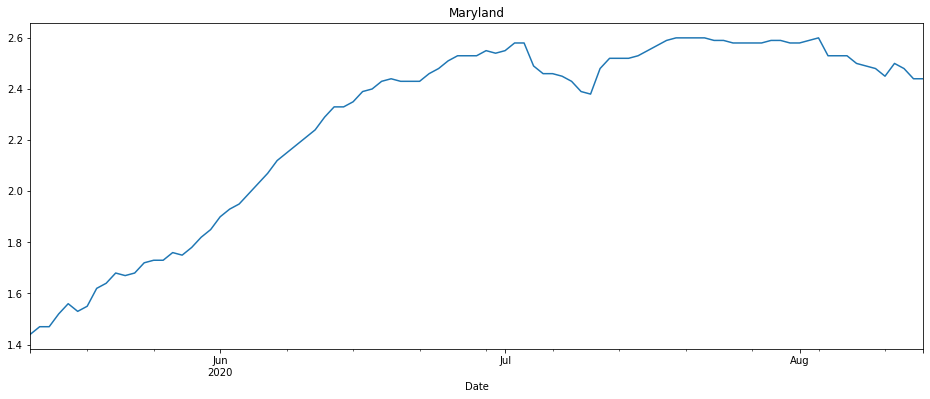

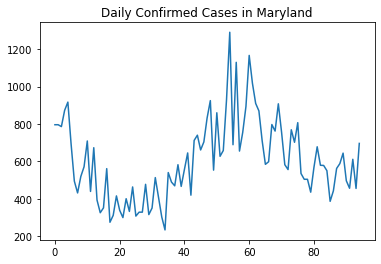

Maryland 0.22432679234704783 0.028855424699496562
Maryland 0.42105825819884135 3.9766957836794016e-05
Maryland 0.47924921804386744 2.020655770063551e-06


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


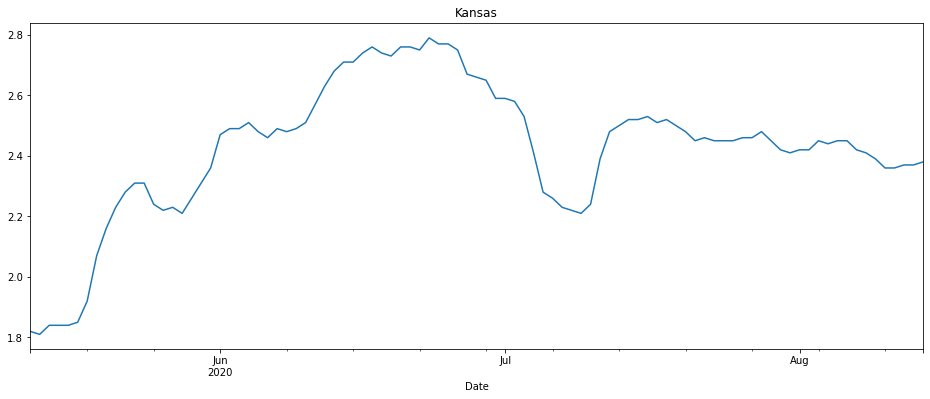

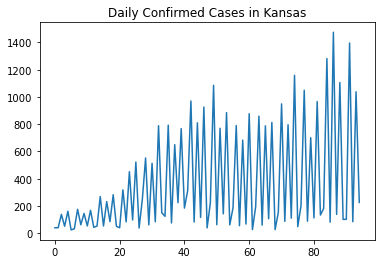

Kansas 0.251429775916214 0.013978603959713141
Kansas 0.569948815745464 5.554199208959921e-09
Kansas 0.3871792908629264 0.0001780290879031334


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


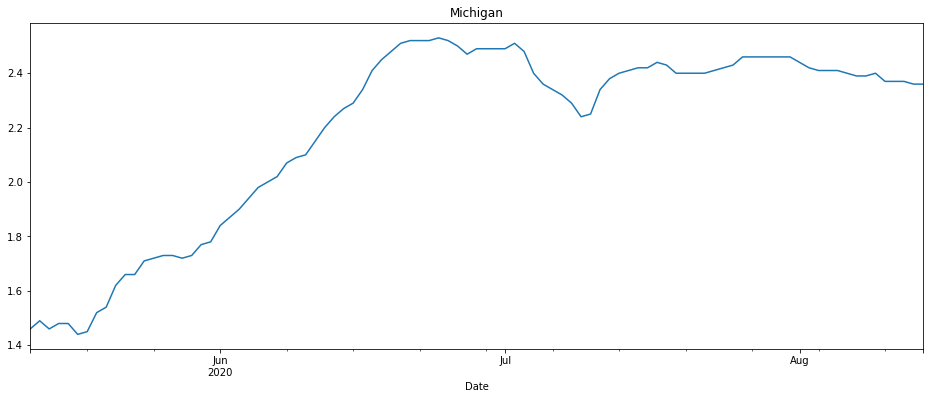

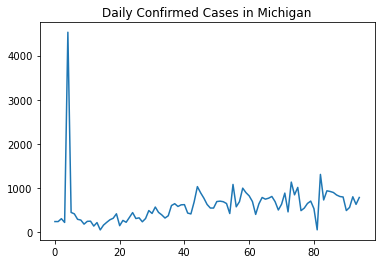

<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


Michigan 0.17579890971735057 0.08836406778161868
Michigan 0.48175812019176256 1.7546473977039549e-06
Michigan 0.2971109484436621 0.0046918604548767786


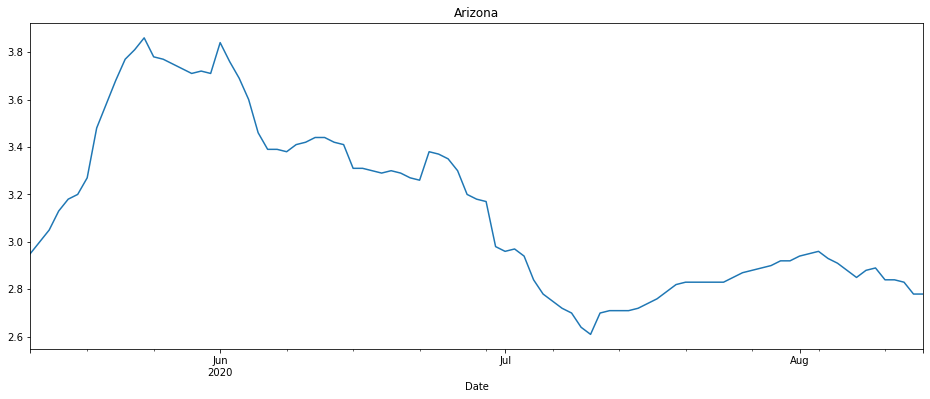

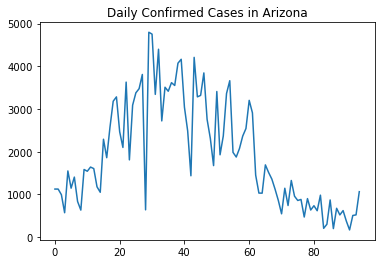

Arizona 0.3712703298561658 0.00021214022366265305
Arizona 0.41984297325582365 4.208238582287281e-05
Arizona 0.420890453231822 4.007944277639666e-05


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


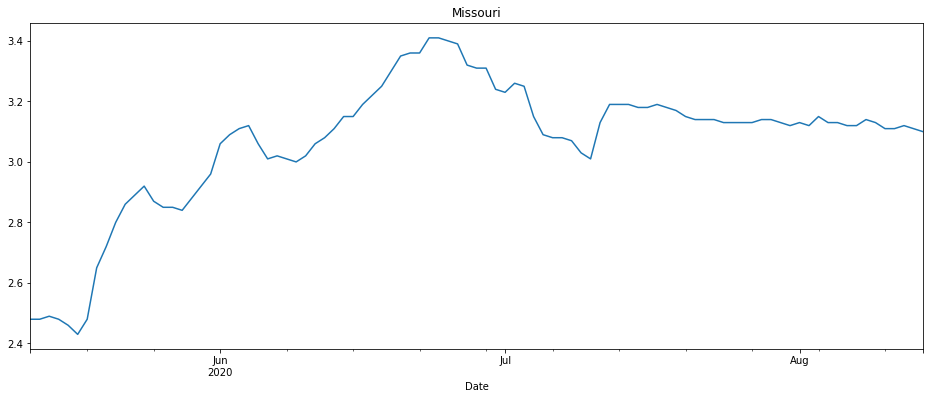

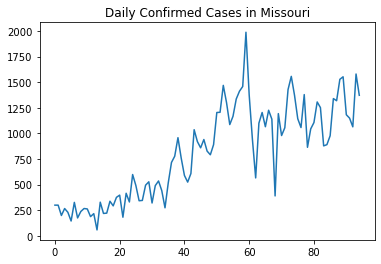

Missouri 0.5150809374363589 9.261440872550161e-08
Missouri 0.5809499892137324 2.394342218648796e-09
Missouri 0.45880845849608104 6.1274076225514e-06


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


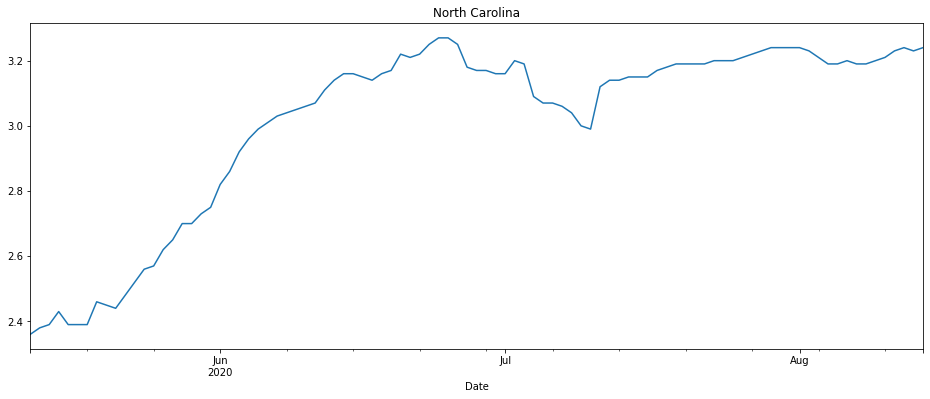

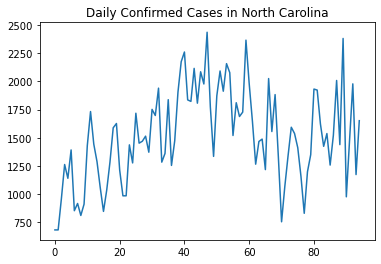

<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


North Carolina 0.511785656762568 1.1536347303871755e-07
North Carolina 0.6912463247598375 6.475068929498232e-14
North Carolina 0.5367109726898085 5.904452333503628e-08


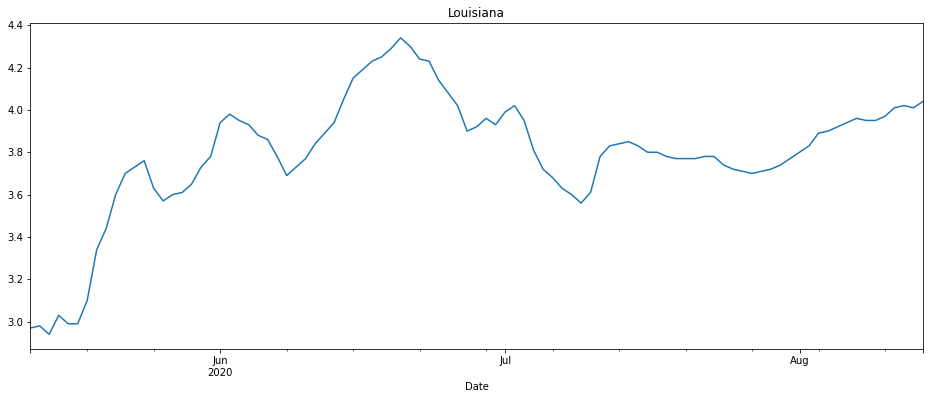

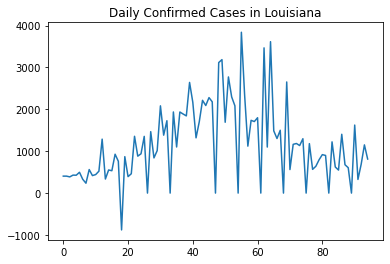

Louisiana 0.36623842907125603 0.00026216797537148887
Louisiana 0.5449395066441103 3.3678784828883186e-08
Louisiana 0.5530121815425995 1.9129657906111004e-08


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


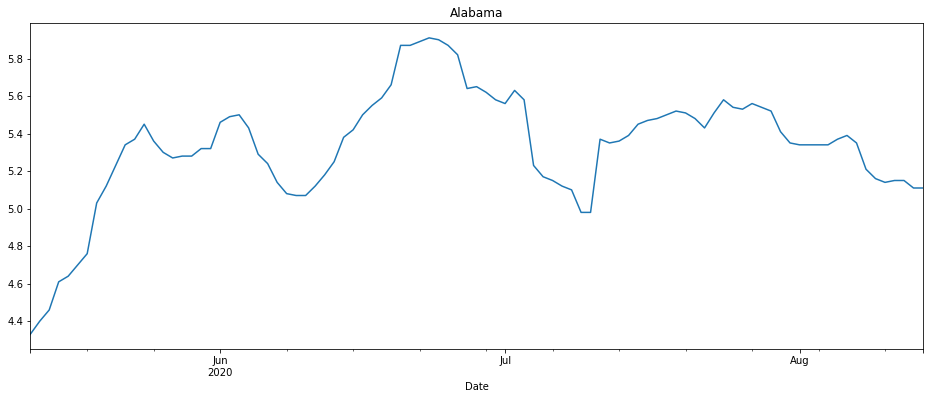

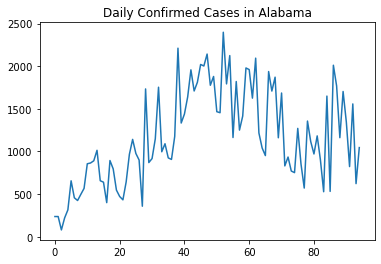

Alabama 0.49828266968921286 2.7708549748818545e-07
Alabama 0.5587342319247345 1.2694171992318384e-08
Alabama 0.42716388817159173 2.982678020637617e-05


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


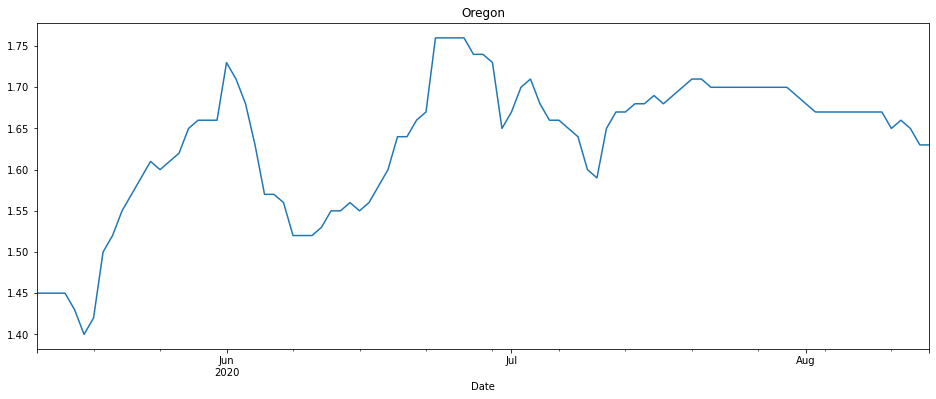

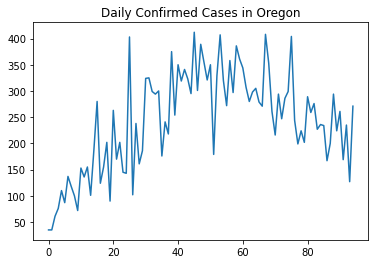

Oregon 0.5686418688599562 1.8383000546234367e-09
Oregon 0.6748663455752518 4.110460839143814e-13
Oregon 0.5985001002873405 5.852420235836581e-10


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


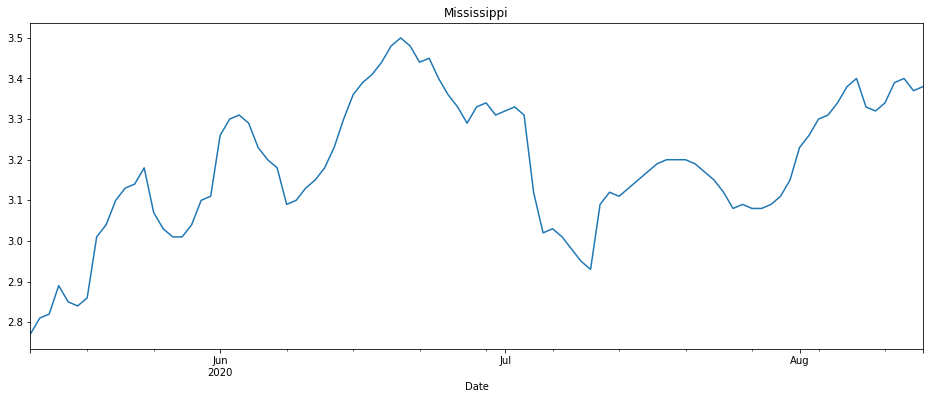

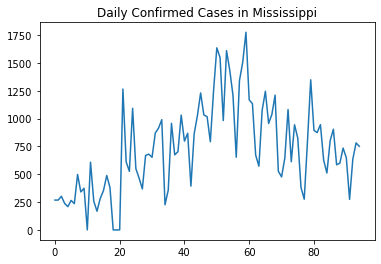

Mississippi 0.20307838422440516 0.04840692823303511
Mississippi 0.23121657081299724 0.029250779184637532
Mississippi 0.2099430113357938 0.0483060888513412


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


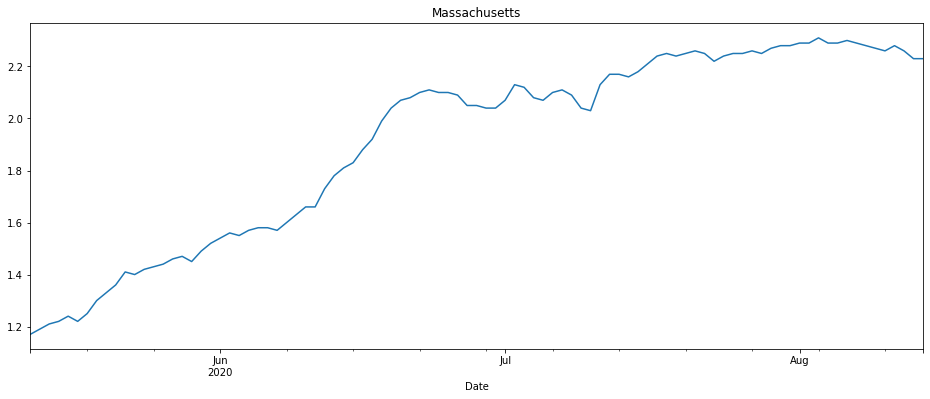

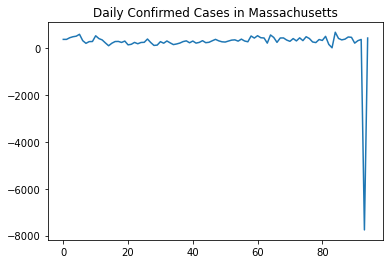

Massachusetts -0.069549354813674 0.5030357155667278
Massachusetts 0.0011633750156619035 0.9913669720217194
Massachusetts 0.36461219573773224 0.00044329974804629654


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


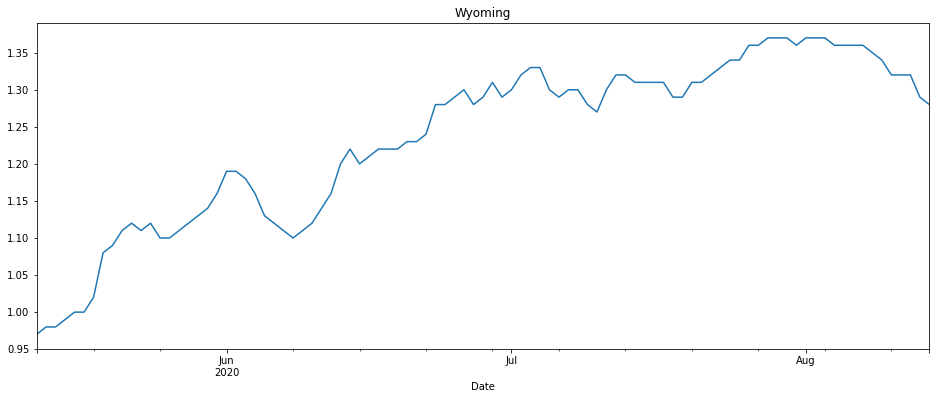

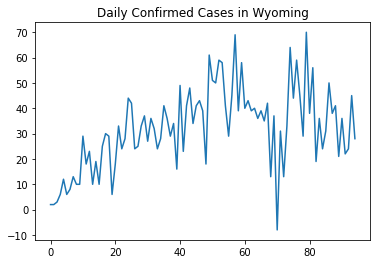

Wyoming 0.6048177553533836 8.524771058985979e-11
Wyoming 0.7883599614390776 4.7487548392928186e-20
Wyoming 0.6850090035292479 1.3275287583429206e-13


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


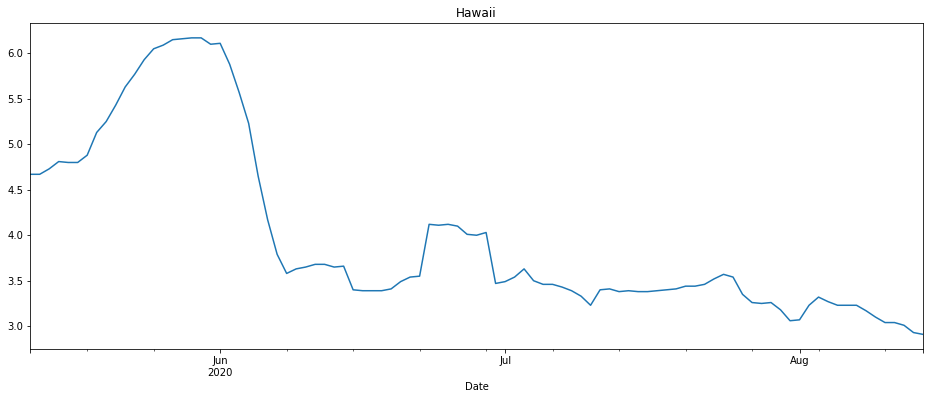

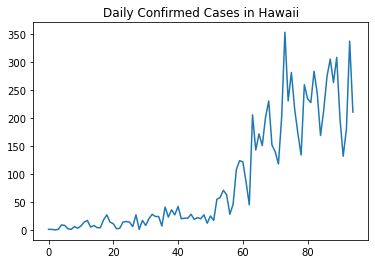

Hawaii -0.5888471893508864 3.4655213301102287e-10
Hawaii -0.62434754496198 6.250374394854986e-11
Hawaii -0.921267684897804 1.924909503251605e-37


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


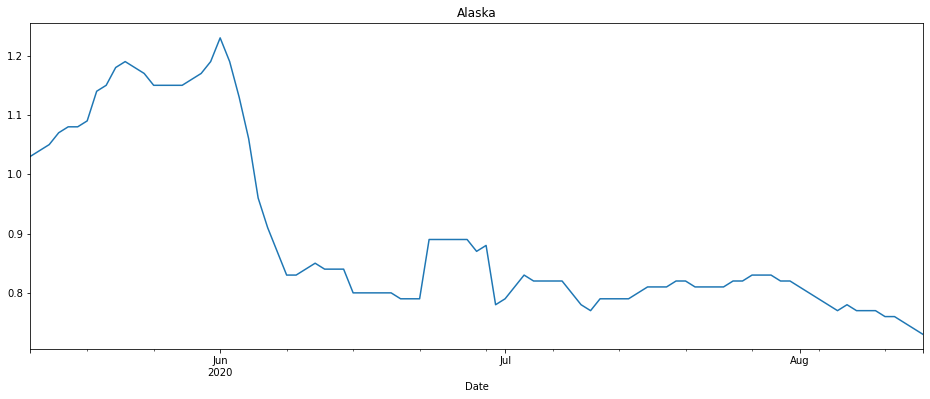

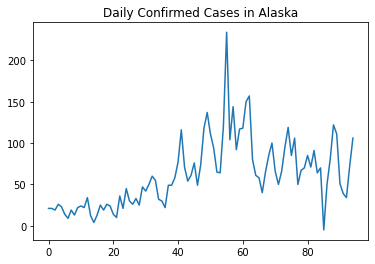

Alaska -0.5989776420034496 1.4365000043365279e-10
Alaska -0.7569735327421017 9.364927186747798e-18
Alaska -0.6411642519925964 1.3010831040004634e-11


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


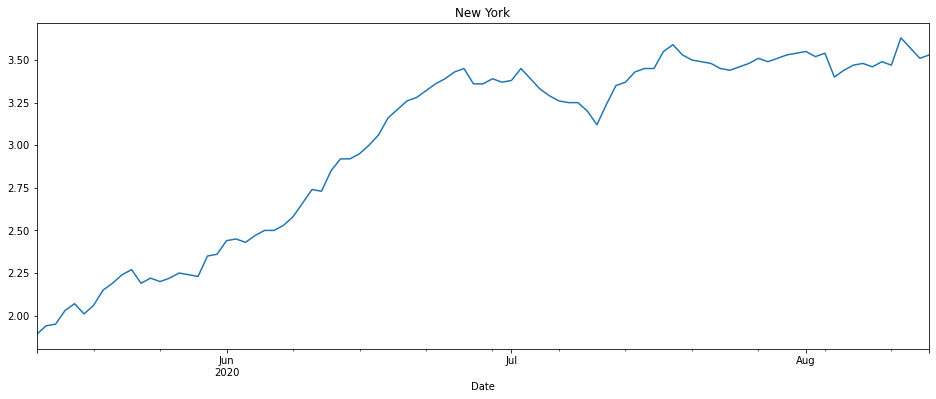

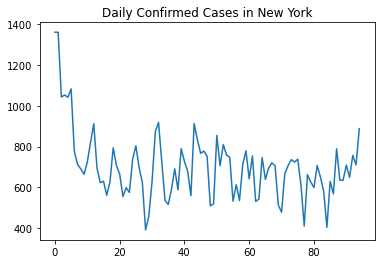

New York -0.39276388567522286 8.252577387668044e-05
New York -0.4924026193216329 9.519780072954649e-07
New York -0.4451140876545545 1.2391908219326938e-05


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


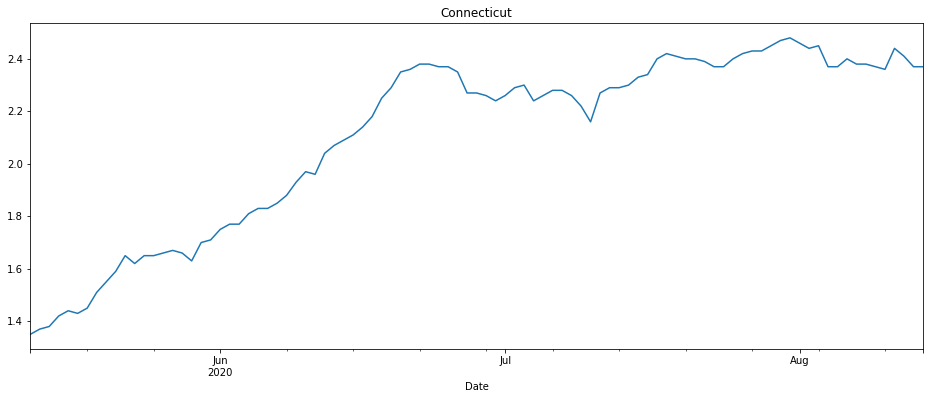

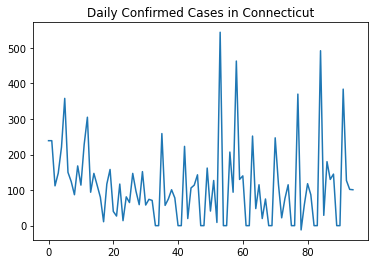

Connecticut -0.17919621322826074 0.08228819434701373
Connecticut -0.3872099579627384 0.00017780043700007438
Connecticut -0.24948599445714345 0.01838421409034078


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


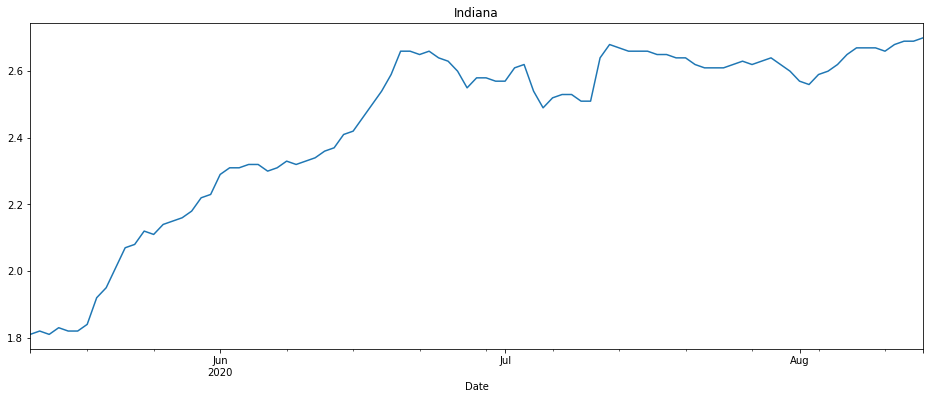

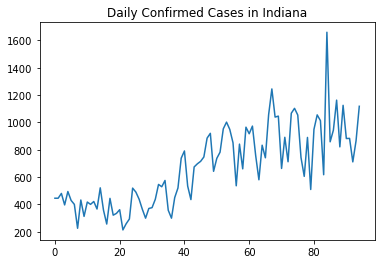

Indiana 0.6591326636731185 3.814931344423504e-13
Indiana 0.803877070287982 2.4722720837125744e-21
Indiana 0.8180460088176069 1.308926399382867e-22


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


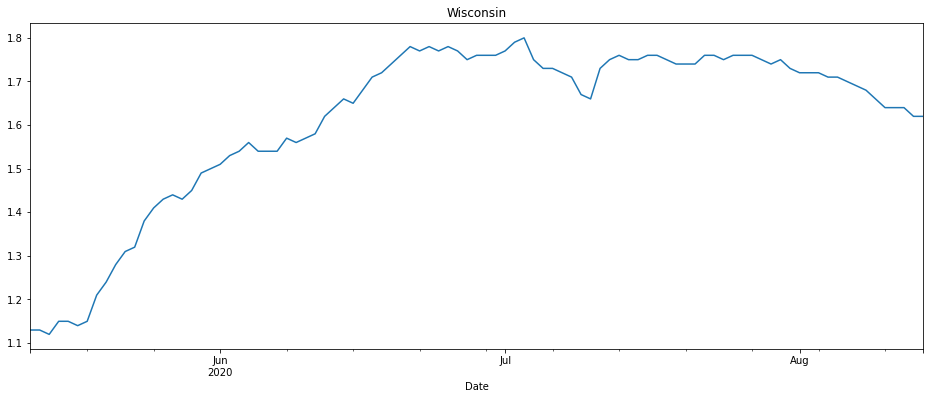

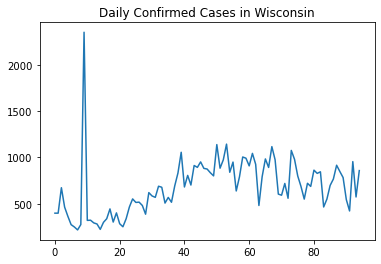

Wisconsin 0.47383247247475097 1.2343174326830818e-06
Wisconsin 0.7648611130658314 2.6821022411381463e-18
Wisconsin 0.8479209347674062 1.0506000224557839e-25


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


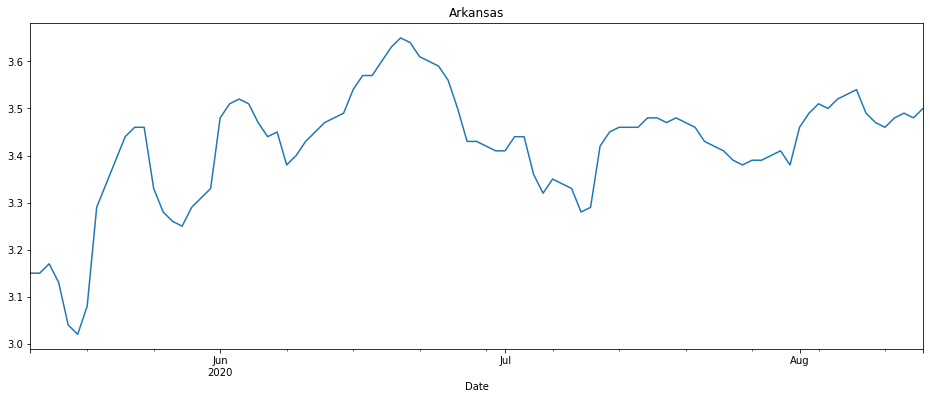

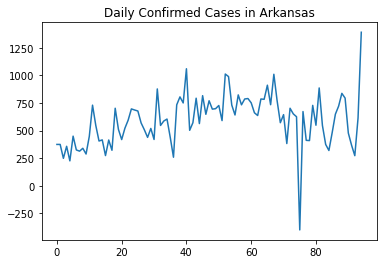

<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


Arkansas 0.3624723018638464 0.00030649870815711606
Arkansas 0.5083404992881664 3.6632064386088153e-07
Arkansas 0.3627688824721094 0.0004762189962092038


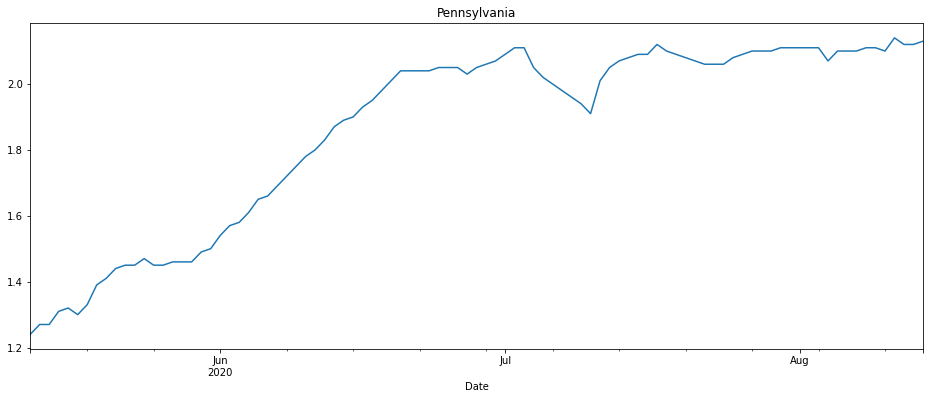

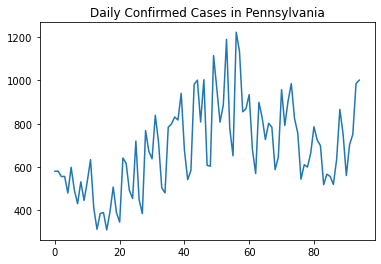

Pennsylvania 0.5881480826741535 3.678553238688855e-10
Pennsylvania 0.7956034643358962 1.2336799989374497e-20
Pennsylvania 0.5071462017787888 3.9416291059007375e-07


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


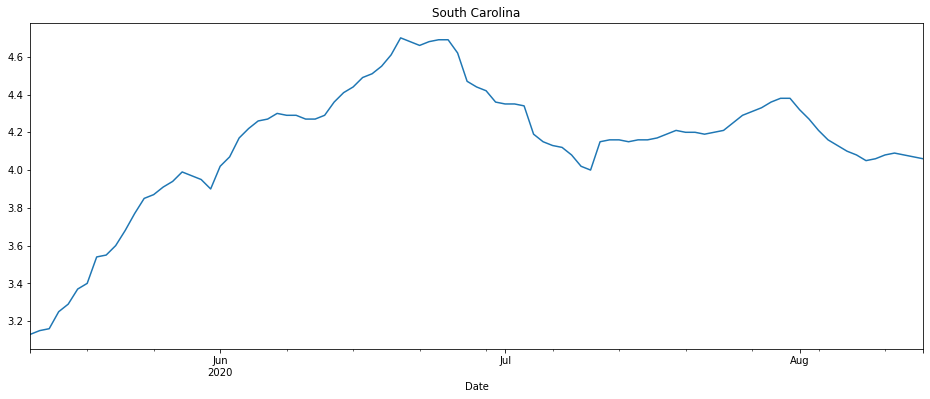

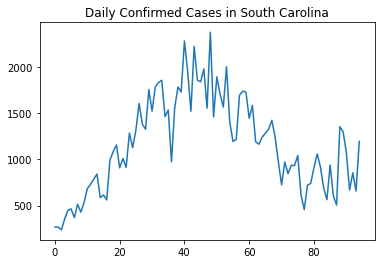

South Carolina 0.7139818747536695 4.593472574626115e-16
South Carolina 0.7759727252639766 4.2314157400533867e-19
South Carolina 0.7192179027741127 2.0445314471119706e-15


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


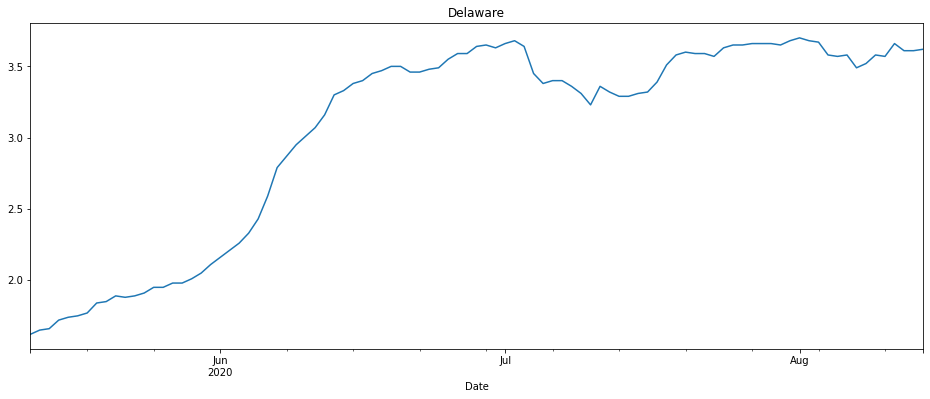

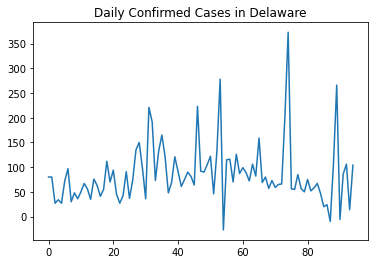

Delaware 0.24974389071435715 0.014655258755937709
Delaware 0.5513037122597355 2.1589294272690025e-08
Delaware 0.3483875362791766 0.0008207895720567904


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


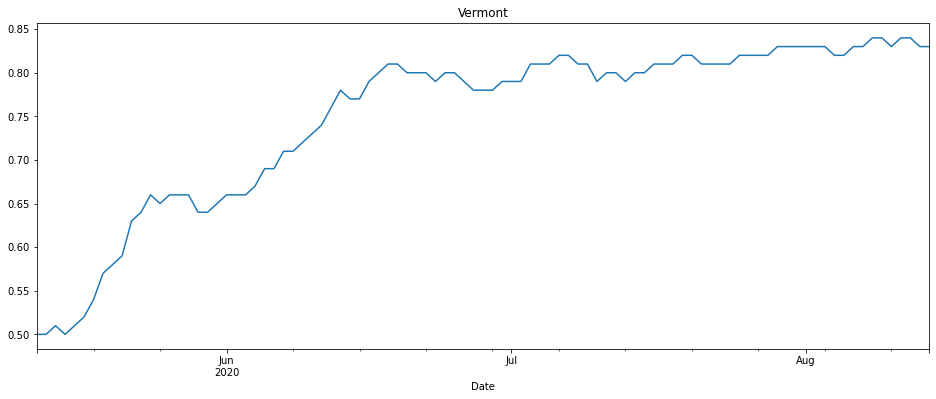

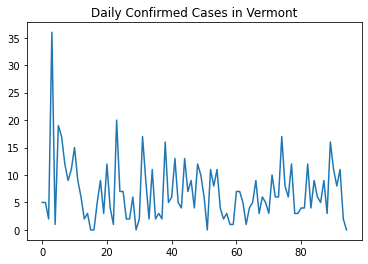

Vermont -0.2053158346760299 0.04593416262376039
Vermont -0.44772992509852294 1.0857436244438461e-05
Vermont -0.06981398993130745 0.5156230365733658


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


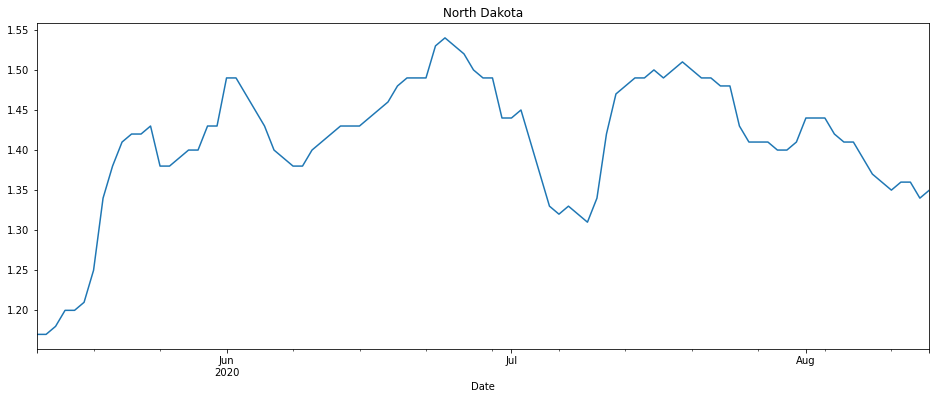

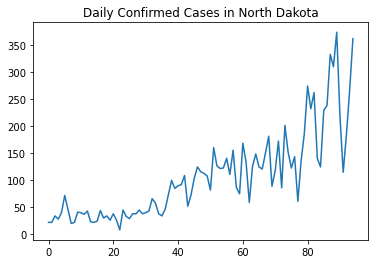

North Dakota 0.07506934084199277 0.4696674118336406
North Dakota 0.06341177250241281 0.5549471486722768
North Dakota 0.06589341961798095 0.5395346791309821


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


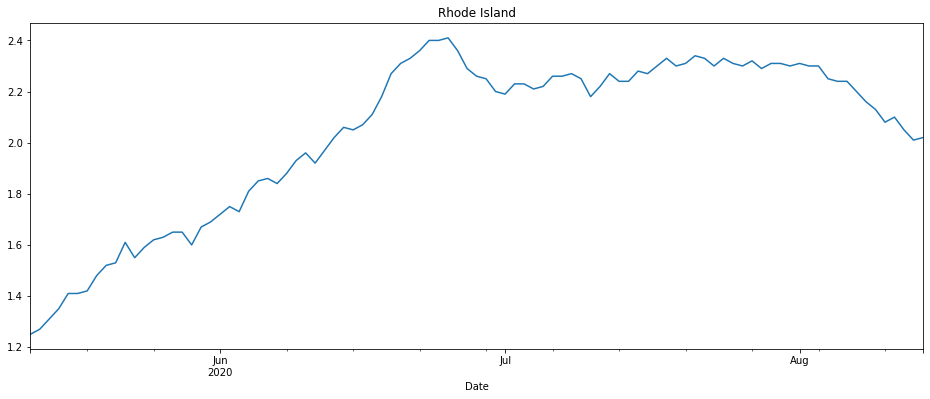

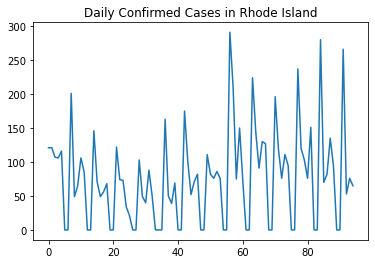

Rhode Island 0.08172802315199477 0.43107159965873854
Rhode Island 0.40781421985311267 7.283667255917711e-05
Rhode Island 0.44459960354117467 1.271669658896096e-05


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


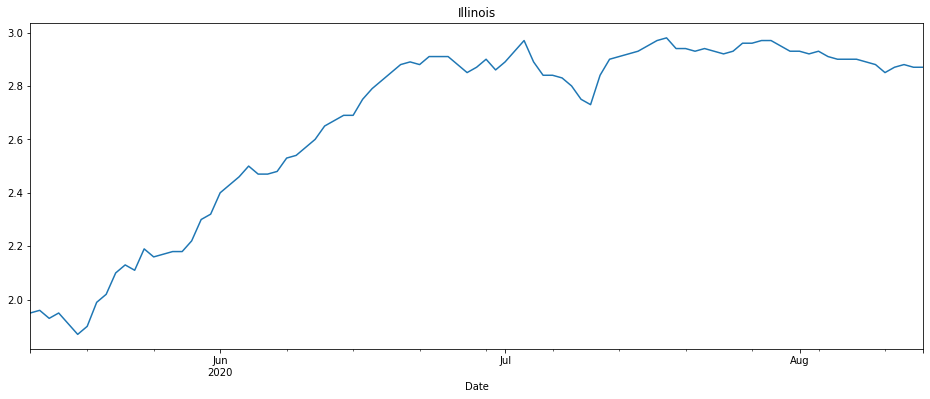

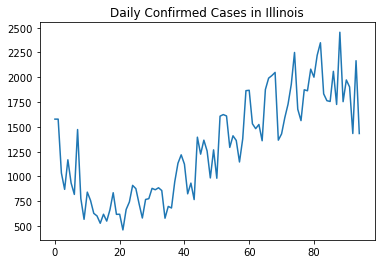

Illinois 0.5861895700999067 4.344412365995095e-10
Illinois 0.7055092495546254 1.1692424101213471e-14
Illinois 0.8123377344596551 4.405702976778136e-22


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


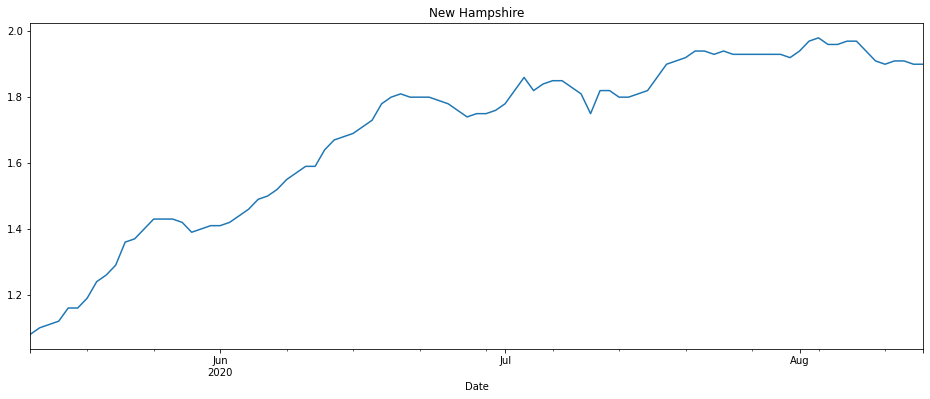

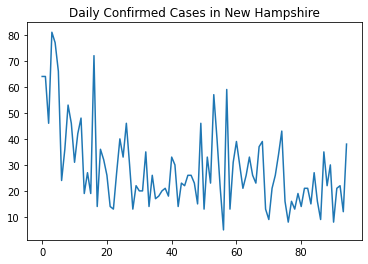

New Hampshire -0.5528568946675727 6.272712721340861e-09
New Hampshire -0.7784743688481588 2.7515962448427434e-19
New Hampshire -0.6572208228358289 2.649685056222543e-12


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


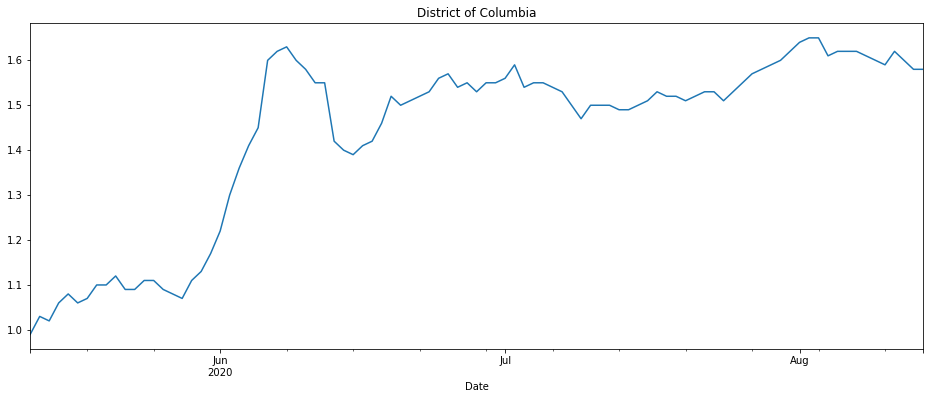

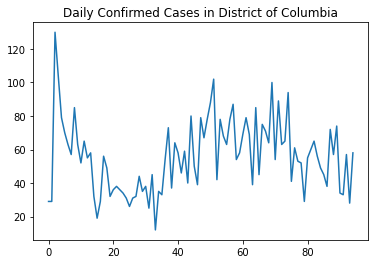

District of Columbia -0.012674826798800706 0.9029715852629817
District of Columbia 0.039378087643313416 0.7140795442322745
District of Columbia 0.022878473805480685 0.8314737888655325


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


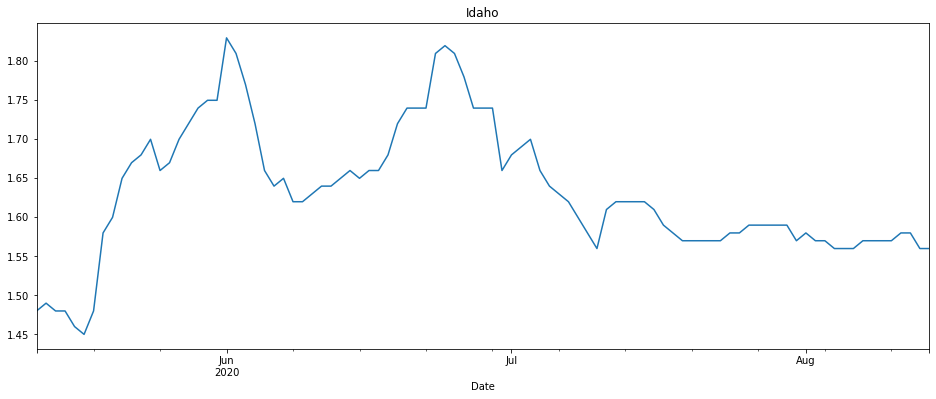

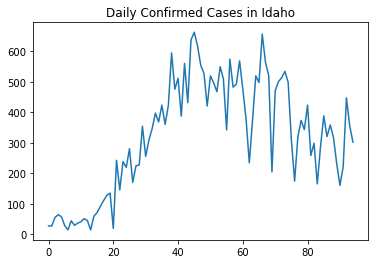

Idaho 0.21443539516938448 0.03691266709392104
Idaho 0.16234715856246895 0.1285029335846957
Idaho 0.23784936678871643 0.024802798505505527


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


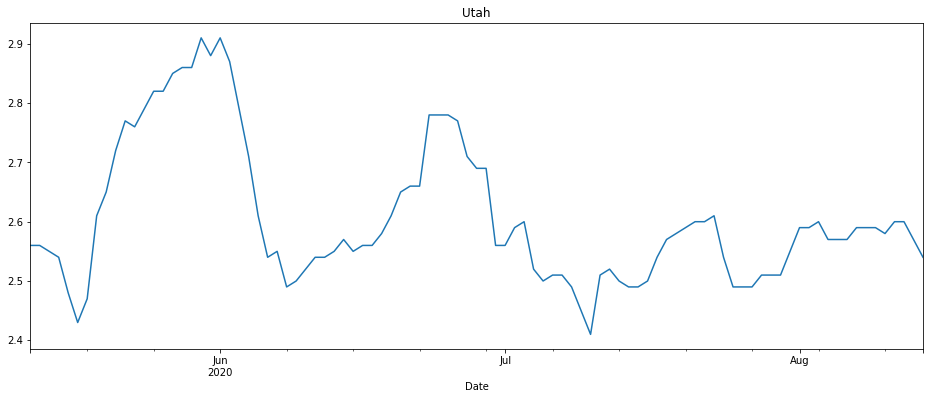

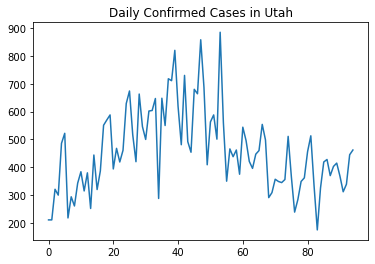

Utah 0.08222250563465544 0.42827951938324516
Utah 0.12343944745099932 0.2491251613532058
Utah 0.16123265561920488 0.131181830465489


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


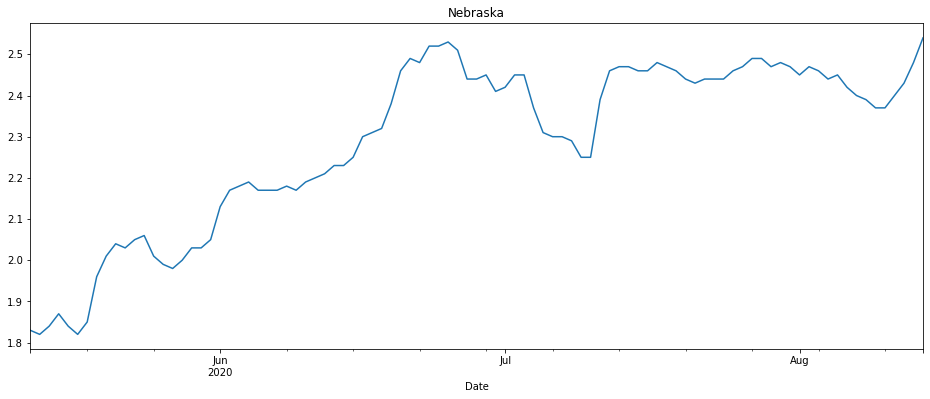

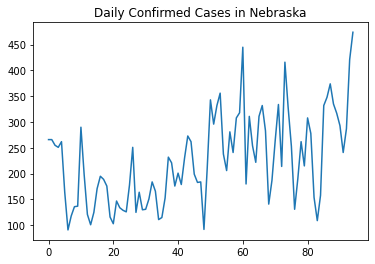

Nebraska 0.3781358266307582 0.00015802260230623173
Nebraska 0.6424570933121212 1.1485849303824186e-11
Nebraska 0.5277888914255586 1.0673495442848947e-07


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


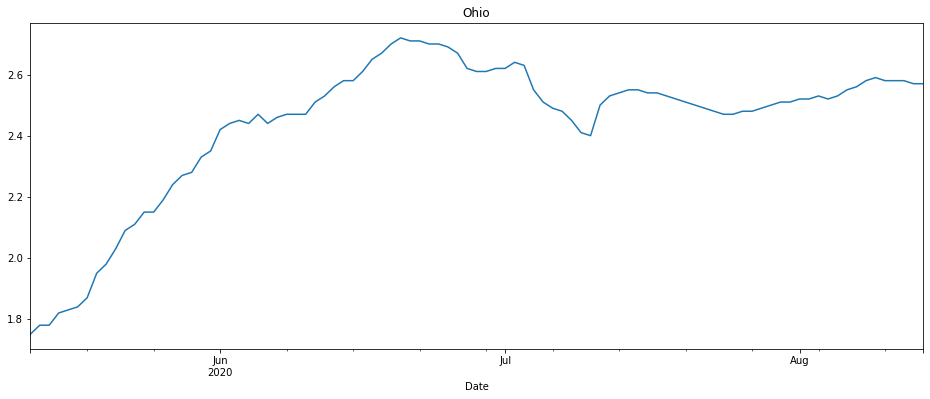

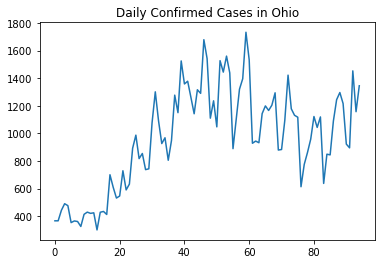

<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


Ohio 0.7518870179384689 1.626166956971104e-18
Ohio 0.8658083864768713 6.771199098387812e-28
Ohio 0.7754794555810974 4.603146996800188e-19


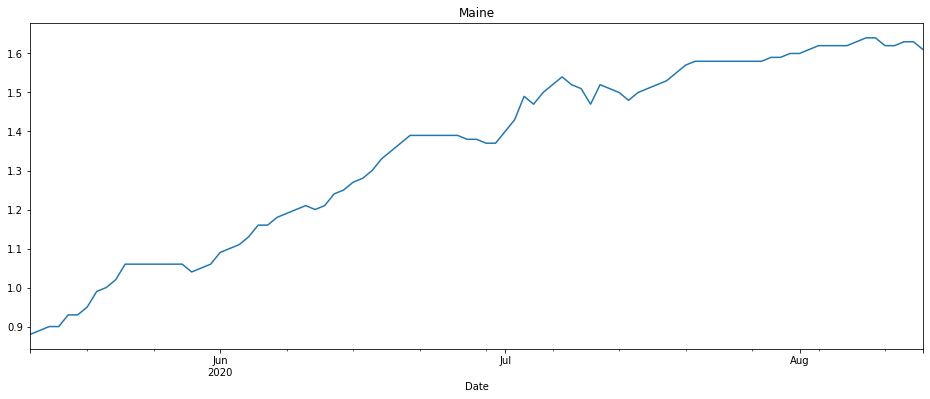

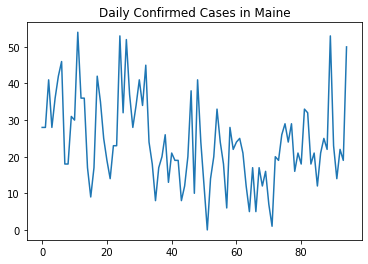

Maine -0.35720384404818917 0.00038015249624078607
Maine -0.6540306851616571 3.662769638888175e-12
Maine -0.516480432502752 2.2068054135477418e-07


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


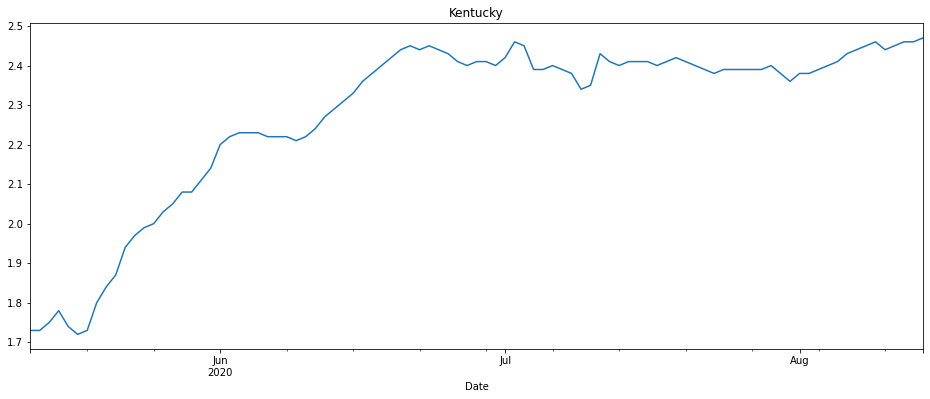

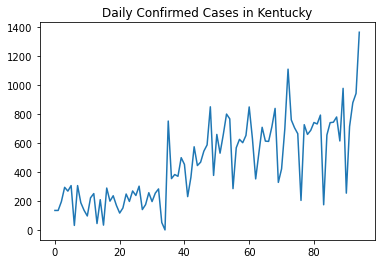

Kentucky 0.6138633057986465 3.719292535461441e-11
Kentucky 0.7719042111112993 8.421122732046612e-19
Kentucky 0.6971644557202438 3.221568857067452e-14


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


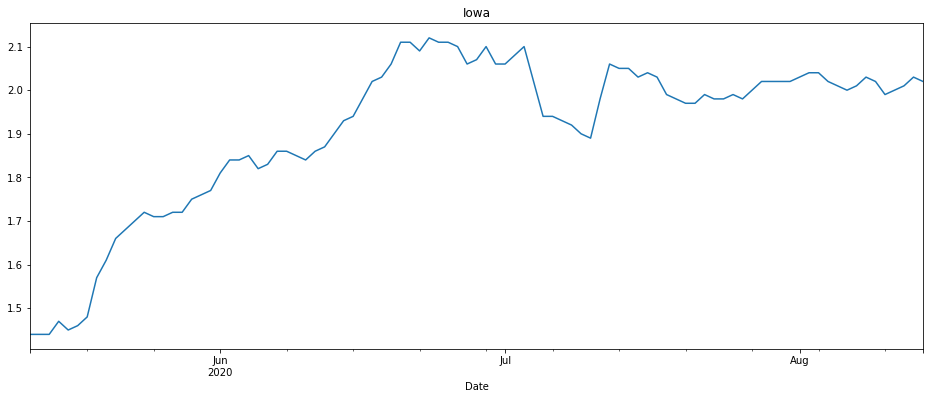

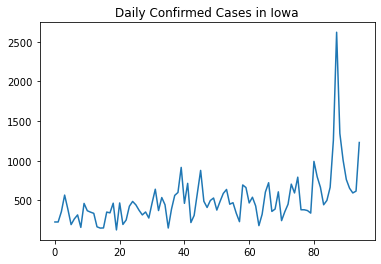

<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


Iowa 0.3533623443851375 0.0004437591701491071
Iowa 0.5308903871601662 8.70489343516926e-08
Iowa 0.8125694297310179 4.197314525236741e-22


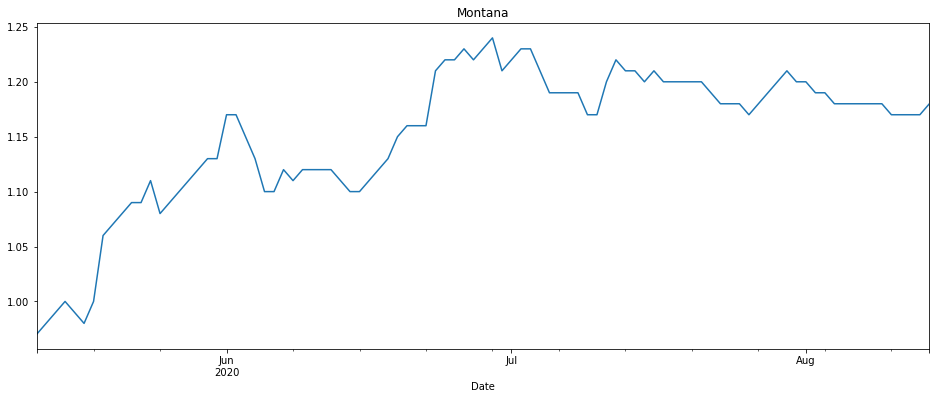

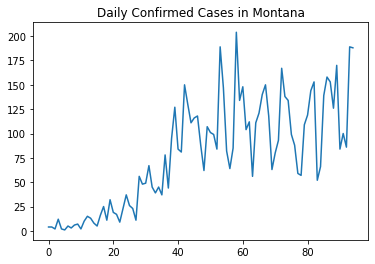

Montana 0.7022995781483039 2.1844777642604575e-15
Montana 0.8699341281166961 1.9074003052268202e-28
Montana 0.6860796263004006 1.1751011052130174e-13


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


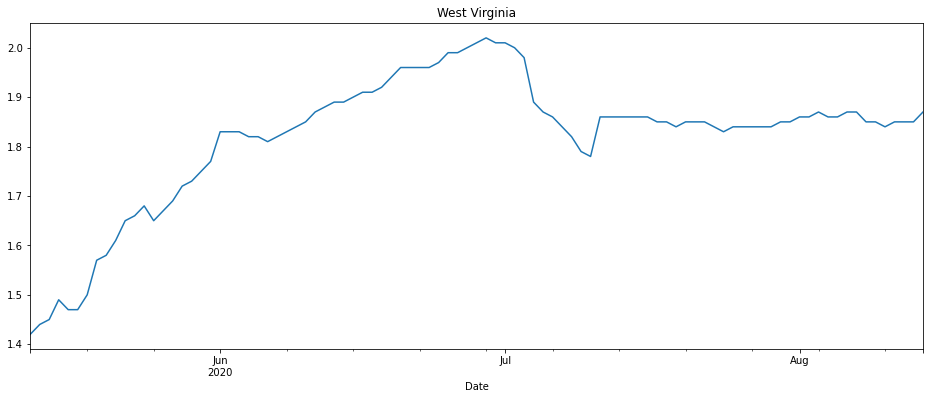

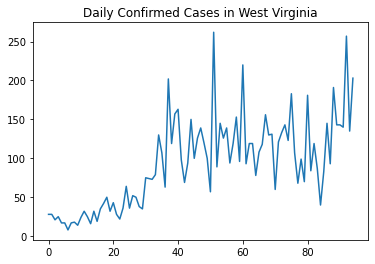

West Virginia 0.5880267065923559 3.716797414710911e-10
West Virginia 0.7516869747768071 2.1088764816414853e-17
West Virginia 0.5908673005659016 1.0912851467294403e-09


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


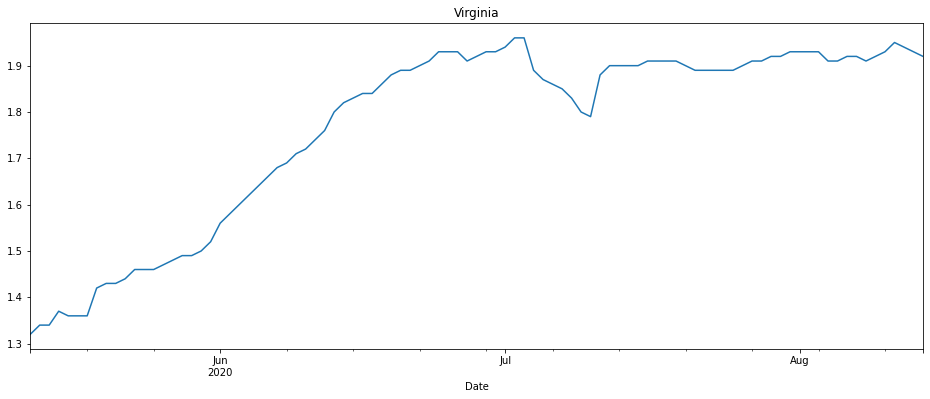

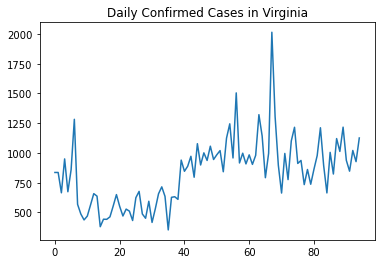

Virginia 0.4999595948179739 2.490238614035766e-07
Virginia 0.7009040873168284 2.0543985912307882e-14
Virginia 0.6462937114305216 7.906262422627443e-12


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


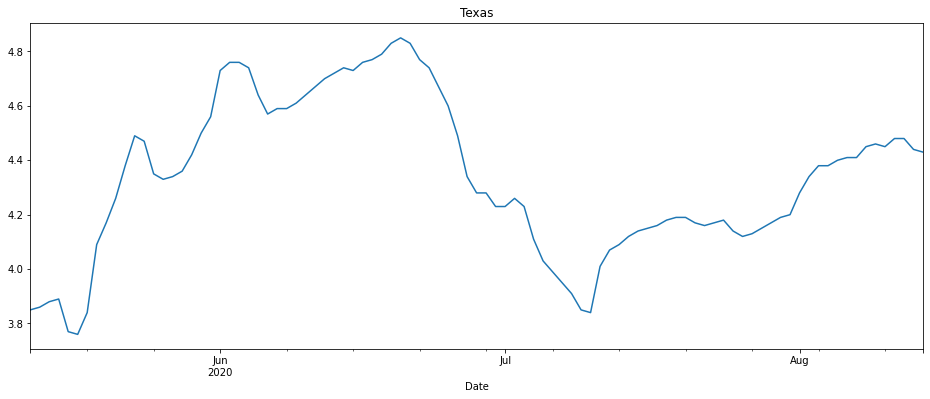

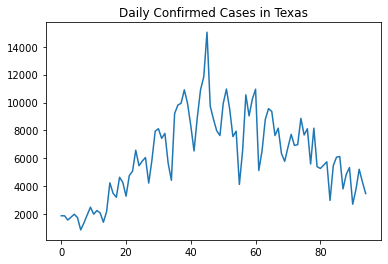

Texas 0.1884125672434887 0.06747137754700053
Texas 0.14457205481957447 0.17646408316652895
Texas 0.07171525003031841 0.5042250172556912


<ipython-input-20-71731df53502>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.astype(np.float)


In [20]:


#def moving_average(x, w):
#    return np.convolve(x, np.ones(w), 'valid') / w

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

pearson_list = list()
spearman_list = list()

## Cuebiq Contact Index data
path="./data"
CCI_df=pd.read_csv(path+'/state_cuebiq_CCI.txt',dtype=object,sep = ",")
states=CCI_df['state'].unique()
print(CCI_df.head())
print(states)

# Hospitialization Data
path="./data"
hospitial_data = pd.read_csv(path+'/nyt_us-states.csv')
print(hospitial_data.head())

for state in states:
    df = CCI_df [(CCI_df['state'] == state)]
    df = df.drop(['state'],axis=1)
    # convert dataframe to series
    df = df.T.squeeze()
    distance_df = df.to_frame()
    distance_df.index.names = ['Date']
    distance_df.index = pd.to_datetime(df.index) # convert to datetime
    distance_df.columns=['Distance']
    distance_df['Distance'] = pd.to_numeric(distance_df['Distance'])
    distance_df=distance_df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
    start = distance_df.index.searchsorted(dt.datetime(2020, 5, 12))
    end = distance_df.index.searchsorted(dt.datetime(2020, 8, 15))
    distance_df = distance_df.iloc[start:end]
    distance_df['Distance'].plot(figsize = (16,6))
    plt.title(state)
    plt.show()

    df = hospitial_data[hospitial_data['state'] == state]
    #df['date'] = pd.to_datetime(df['date'])
    start_date = '2020-06-01'
    end_date = '2020-09-04'
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    df = df.loc[mask]
    df.set_index('date',inplace=True)
    df=df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
    start = df.index.searchsorted(start_date)
    end = df.index.searchsorted(end_date)
    state_hospitial_data = df.iloc[start:end]
    #state_hospitial_data['cases'].plot(figsize = (16,6))
    y=state_hospitial_data['cases']
    daily_hospitial_data = [None] * len(y)
    for i in range(1,len(y)):
        daily_hospitial_data[i] = y[i] - y[i-1]
    daily_hospitial_data[0] = daily_hospitial_data[1] ###why set the 0th =1st
    #print(daily_hospitial_data)
    plt.plot(daily_hospitial_data)
    plt.title("Daily Confirmed Cases in "+state)
    plt.show()
    ## Correlation
    x = np.array(distance_df['Distance'])
    x = x.astype(float)
    y = np.array(state_hospitial_data['cases'])
    r, p = scipy.stats.pearsonr(x, daily_hospitial_data)
    print(state,r,p)
    #r, p = scipy.stats.spearmanr(x, daily_hospitial_data)
    #print(state,r,p)
    daily_cases_moving_average = moving_average(daily_hospitial_data,7)
    x_moving_average = moving_average(x,7)
    r, p = scipy.stats.pearsonr(x_moving_average, daily_cases_moving_average)
    print(state,r,p)
    pearson_list.append(r)
    r, p = scipy.stats.spearmanr(x_moving_average, daily_cases_moving_average)
    print(state,r,p)
    spearman_list.append(r)

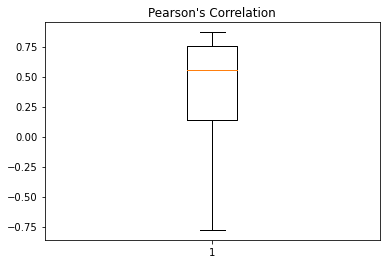

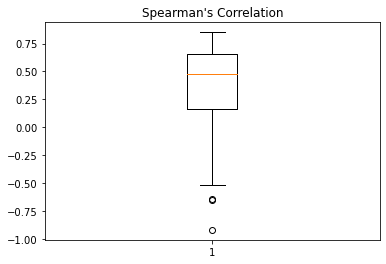

In [21]:
plt.boxplot(pearson_list)
plt.title("Pearson's Correlation")
plt.show()

plt.boxplot(spearman_list)
plt.title("Spearman's Correlation")
plt.show()

## Test the temporal lags

            state 2020-01-01 2020-01-02 2020-01-03 2020-01-04 2020-01-05  \
0  North Carolina       3.92       3.88       3.85       3.88       3.87   
1            Utah        4.0        4.0       4.04       4.12       4.07   
2         Wyoming       1.43       1.48       1.53       1.59       1.57   
3       Tennessee       6.07       5.99        5.8       5.67       5.49   
4      California       6.45       6.48       6.37       6.31       6.26   

  2020-01-06 2020-01-07 2020-01-08 2020-01-09    ...     2020-08-31  \
0       3.91        3.9        4.2       4.34    ...           2.96   
1       4.02       4.02       4.21       4.23    ...           2.79   
2       1.56       1.54       1.53        1.5    ...           1.29   
3       5.16       5.05        5.2       5.28    ...           3.94   
4       6.24       6.33       6.63       6.75    ...           2.72   

  2020-09-01 2020-09-02 2020-09-03 2020-09-04 2020-09-05 2020-09-06  \
0       2.97        3.0       3.03       3.11

/Users/temporaryname/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


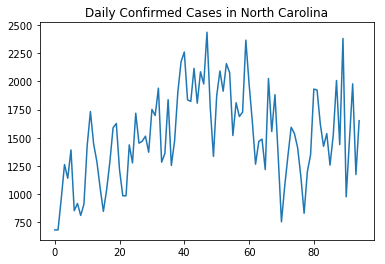

North Carolina 0.514408092555917 20
95 days


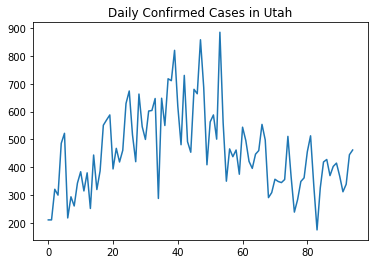

Utah 0.09677295976934432 20
95 days


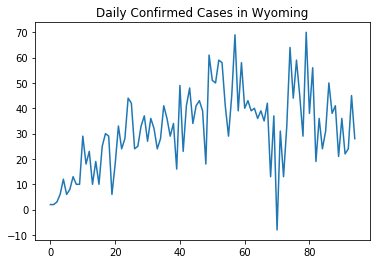

Wyoming 0.6094901508429007 20
95 days


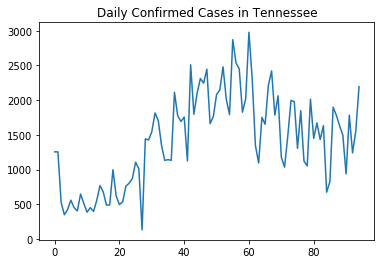

Tennessee 0.656370146648837 20
95 days


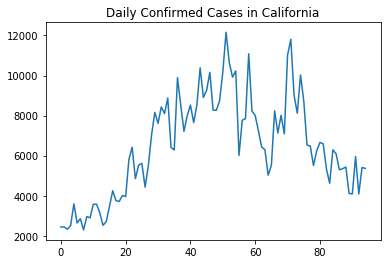

California 0.34263790420298973 20
95 days


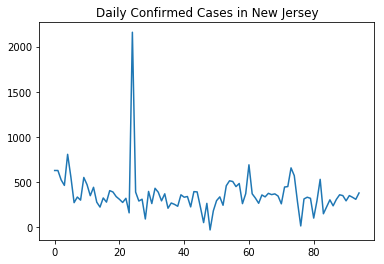

New Jersey -0.19623949004966182 11
95 days


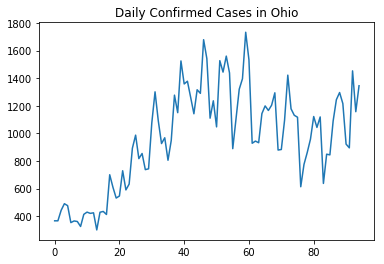

Ohio 0.7726871376292289 20
95 days


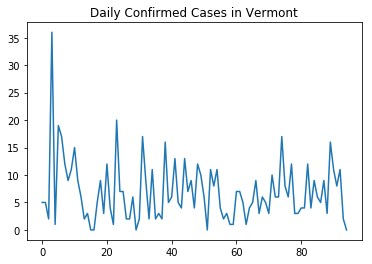

Vermont -0.14213041258998657 12
95 days


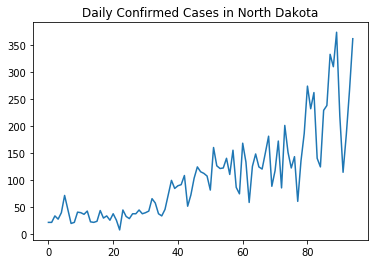

North Dakota 0.10916246369370107 20
95 days


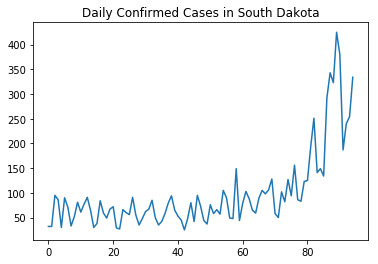

South Dakota 0.7878937128772746 15
95 days


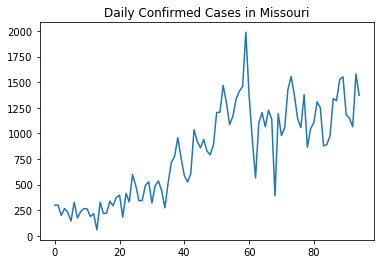

Missouri 0.5457771820906987 20
95 days


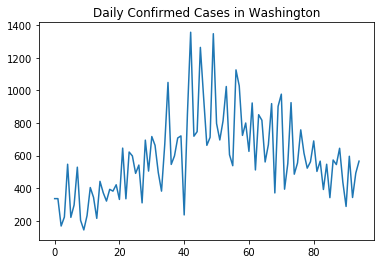

Washington 0.4851874210519632 20
95 days


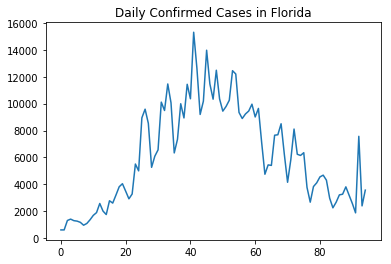

Florida 0.775314596647472 20
95 days


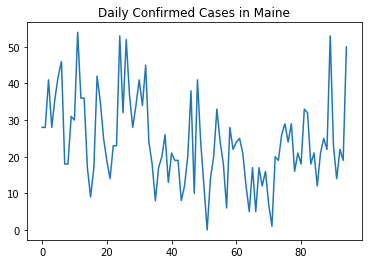

Maine -0.3445507594169019 11
95 days


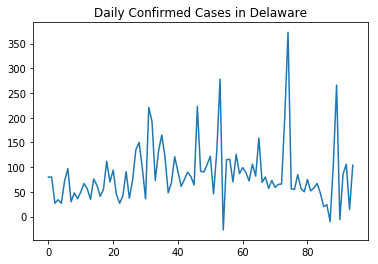

Delaware 0.26137125184715987 17
95 days


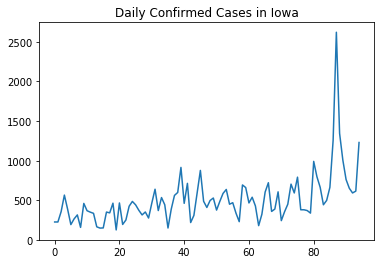

Iowa 0.4109865669688929 7
95 days


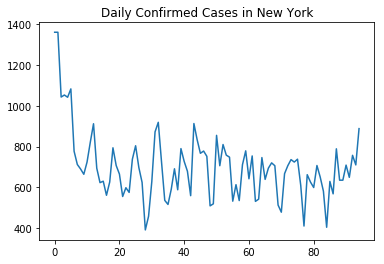

New York -0.3857901727940195 20
95 days


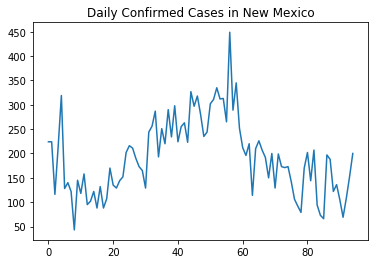

New Mexico 0.4322482734423683 20
95 days


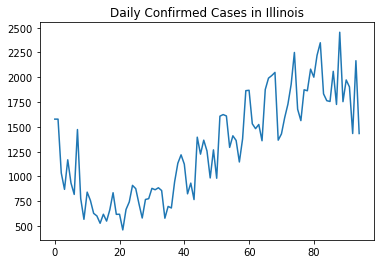

Illinois 0.605881139713 20
95 days


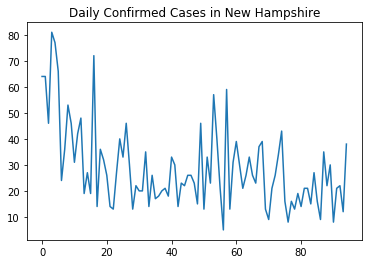

New Hampshire -0.5212155665031927 8
95 days


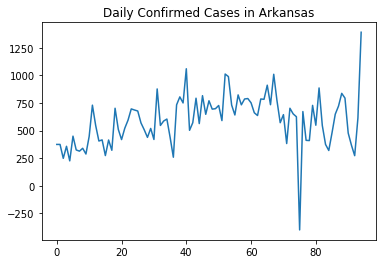

Arkansas 0.377674275599925 20
95 days


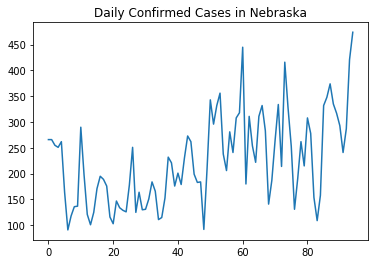

Nebraska 0.45932234773398956 11
95 days


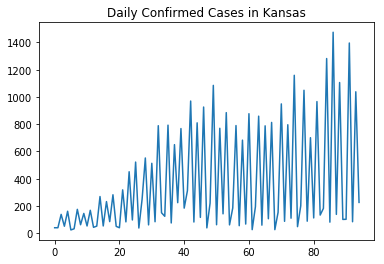

Kansas 0.2620771026262833 20
95 days


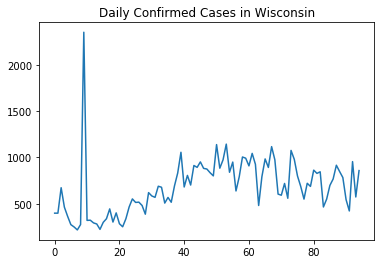

Wisconsin 0.47720427188846815 20
95 days


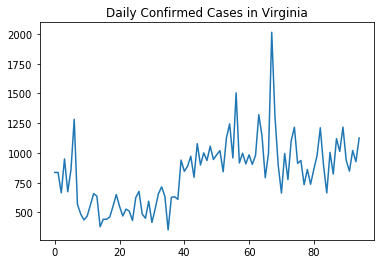

Virginia 0.520500056512002 20
95 days


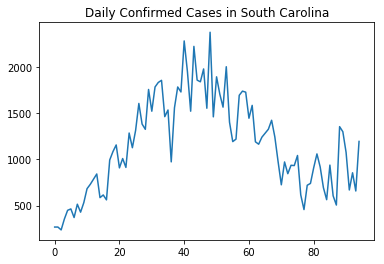

South Carolina 0.7252707201100237 20
95 days


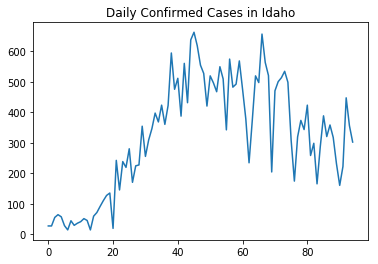

Idaho 0.26714075058410564 20
95 days


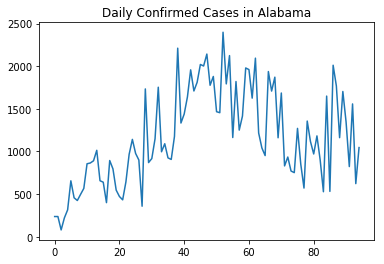

Alabama 0.5318770482198453 20
95 days


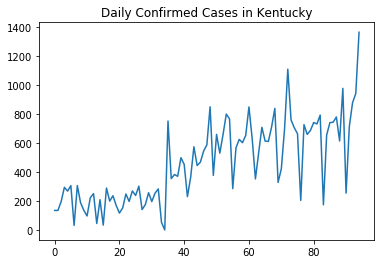

Kentucky 0.6188716127099626 20
95 days


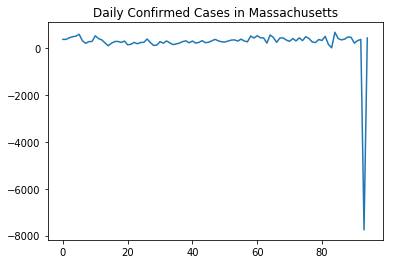

Massachusetts -0.06335146135534013 15
95 days


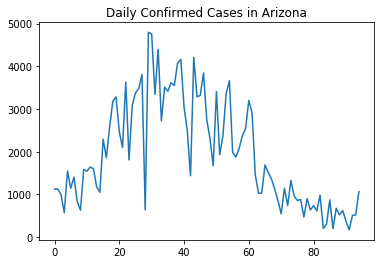

Arizona 0.4141372263482039 20
95 days


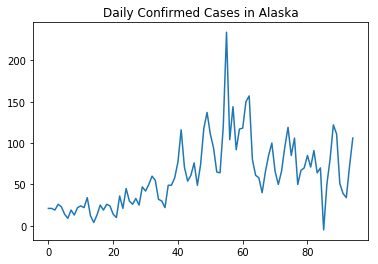

Alaska -0.44317275121350685 7
95 days


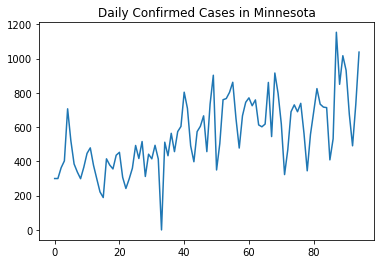

Minnesota 0.5564551775602656 20
95 days


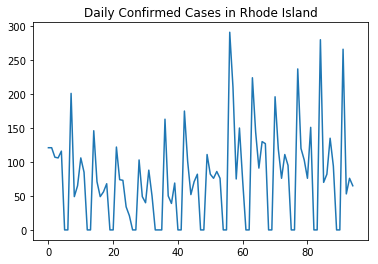

Rhode Island 0.0826849206712639 20
95 days


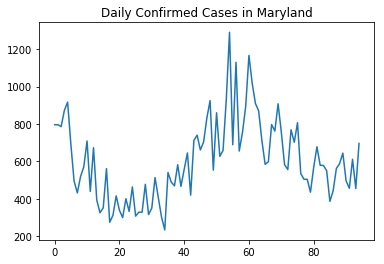

Maryland 0.23588702923985502 20
95 days


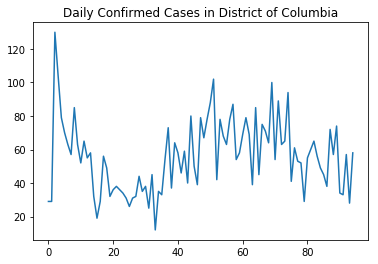

District of Columbia 0.0013116451588967284 20
95 days


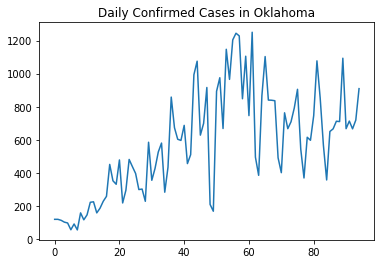

Oklahoma 0.0621388853190843 20
95 days


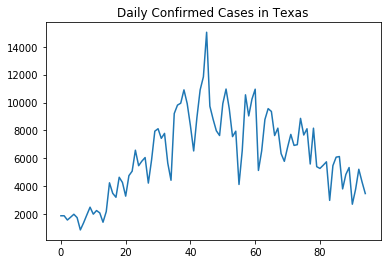

Texas 0.24108217526290263 20
95 days


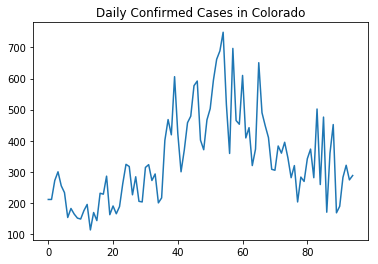

Colorado 0.5662845355557657 11
95 days


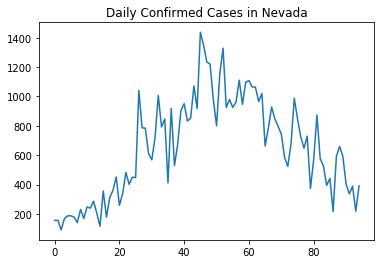

Nevada 0.6368321317606357 20
95 days


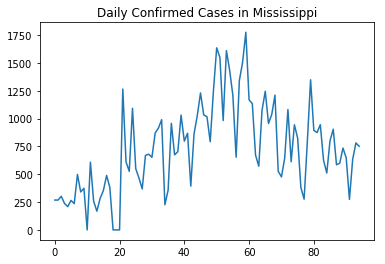

Mississippi 0.2591904270679746 20
95 days


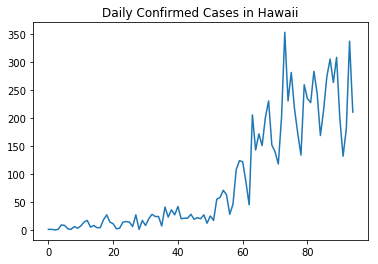

Hawaii -0.5504320797701835 9
95 days


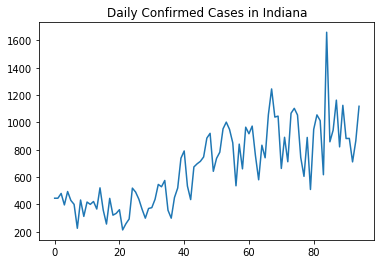

Indiana 0.6705549409469794 20
95 days


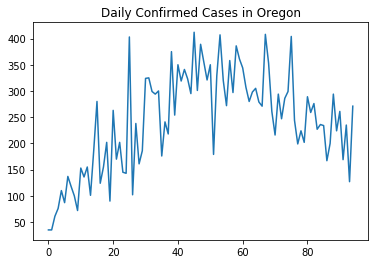

Oregon 0.568641868859956 19
95 days


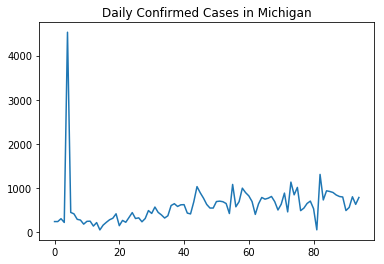

Michigan 0.18840111093423226 20
95 days


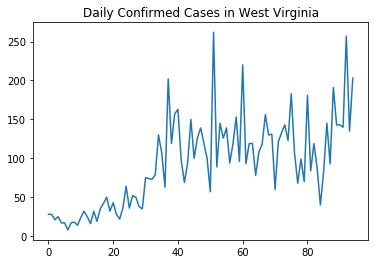

West Virginia 0.5939297987003802 20
95 days


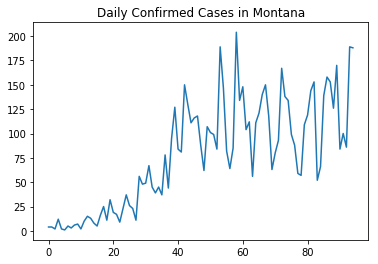

Montana 0.7202600795043906 16
95 days


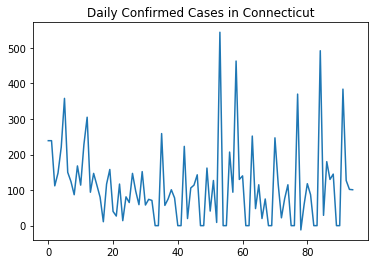

Connecticut -0.1548365554295244 20
95 days


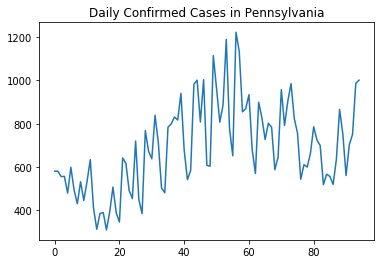

Pennsylvania 0.5946076953143055 20
95 days


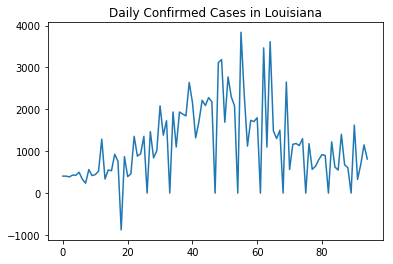

Louisiana 0.40211195383052467 20
95 days


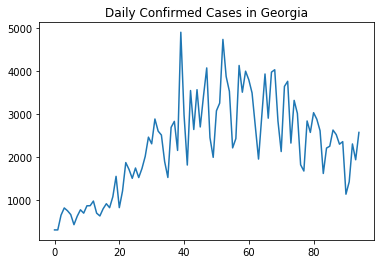

Georgia 0.6797249381394834 20


In [67]:


def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

pearson_list = list()
lag_days = list()
spearman_list = list()

## Cuebiq Contact Index data
path="./data"
CCI_df=pd.read_csv(path+'/state_cuebiq_CCI.txt',dtype=object)
states=CCI_df['state'].unique()
print(CCI_df.head())
print(states)

# Hospitialization Data
path="./data"
hospitial_data = pd.read_csv(path+'/nyt_us-states.csv')
print(hospitial_data.head())

for state in states:
    df = hospitial_data[hospitial_data['state'] == state]
    df['date'] = pd.to_datetime(df['date'])
    start_date = '2020-06-01'
    end_date = '2020-09-04'
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    df = df.loc[mask]
    df.set_index('date',inplace=True)
    df=df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
    start = df.index.searchsorted(start_date)
    end = df.index.searchsorted(end_date)
    state_hospitial_data = df.iloc[start:end]
    y=state_hospitial_data['cases']
    daily_hospitial_data = [None] * len(y)
    for i in range(1,len(y)):
        daily_hospitial_data[i] = y[i] - y[i-1]
    daily_hospitial_data[0] = daily_hospitial_data[1]
    print(str(len(daily_hospitial_data))+' days')
    plt.plot(daily_hospitial_data)
    plt.title("Daily Confirmed Cases in "+state)
    plt.show()
    
    df = CCI_df [(CCI_df['state'] == state)]
    df = df.drop(['state'],axis=1)
    # convert dataframe to series
    df = df.T.squeeze()
    distance_df = df.to_frame()
    distance_df.index.names = ['Date']
    distance_df.index = pd.to_datetime(df.index) # convert to datetime
    distance_df.columns=['Distance']
    distance_df['Distance'] = pd.to_numeric(distance_df['Distance'])
    distance_df=distance_df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
    
    temp_pearson_list = list()
    temp_spearman_list = list()
    for d in range(7,21):
        start = distance_df.index.searchsorted(dt.datetime(2020, 5, 31-d))
        end = distance_df.index.searchsorted(dt.datetime(2020, 8, 31-d+3))
        #print(start,end)
        state_distance_df = distance_df.iloc[start:end]
        #print(len(state_distance_df))
        ## Correlation
        x = np.array(state_distance_df['Distance'])
        x = x.astype(np.float)
        y = np.array(state_hospitial_data['cases'])
        #r, p = scipy.stats.pearsonr(x, daily_hospitial_data)
        #print(state,r,p)
        #r, p = scipy.stats.spearmanr(x, daily_hospitial_data)
        #print(state,r,p)
        move_days = 1
        daily_cases_moving_average = moving_average(daily_hospitial_data,move_days)
        x_moving_average = moving_average(x,move_days)
        r, p = scipy.stats.pearsonr(x_moving_average, daily_cases_moving_average)
        temp_pearson_list.append(r)
        r, p = scipy.stats.spearmanr(x_moving_average, daily_cases_moving_average)
        temp_spearman_list.append(r)
    max_pearson=np.max(temp_pearson_list)
    pearson_list.append(max_pearson)
    position = np.argmax(temp_pearson_list) + 7
    lag_days.append(position)
    print(state,max_pearson,position)
    #max_spearman=np.max(temp_spearman_list)
    #spearman_list.append(max_spearman)
    #position = np.argmax(temp_spearman_list) + 7
    #print(state,max_spearman,position)
    

0.3199734211180223 0.4141372263482039


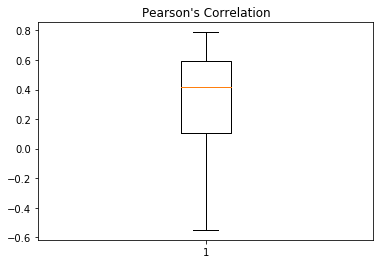

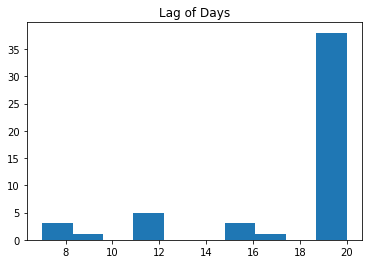

In [68]:
print(np.mean(pearson_list),np.median(pearson_list))
plt.boxplot(pearson_list)
plt.title("Pearson's Correlation")
plt.show()

plt.hist(lag_days)
plt.title("Lag of Days")
plt.show()

## County Level Analysis in Wisconsin

In [36]:
## Cuebiq Contact Index data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

path="./wisconsin_county_csv/"
df=pd.read_csv(path+'county_cuebiq_CCI.txt')
df.sort_values(by='county',inplace = True) 
print(df.shape)
counties=df['county'].unique()
print(counties)
df.head()

(72, 285)
['Adams County' 'Ashland County' 'Barron County' 'Bayfield County'
 'Brown County' 'Buffalo County' 'Burnett County' 'Calumet County'
 'Chippewa County' 'Clark County' 'Columbia County' 'Crawford County'
 'Dane County' 'Dodge County' 'Door County' 'Douglas County' 'Dunn County'
 'Eau Claire County' 'Florence County' 'Fond du Lac County'
 'Forest County' 'Grant County' 'Green County' 'Green Lake County'
 'Iowa County' 'Iron County' 'Jackson County' 'Jefferson County'
 'Juneau County' 'Kenosha County' 'Kewaunee County' 'La Crosse County'
 'Lafayette County' 'Langlade County' 'Lincoln County' 'Manitowoc County'
 'Marathon County' 'Marinette County' 'Marquette County'
 'Menominee County' 'Milwaukee County' 'Monroe County' 'Oconto County'
 'Oneida County' 'Outagamie County' 'Ozaukee County' 'Pepin County'
 'Pierce County' 'Polk County' 'Portage County' 'Price County'
 'Racine County' 'Richland County' 'Rock County' 'Rusk County'
 'Sauk County' 'Sawyer County' 'Shawano County' 'She

county  2020-01-01  2020-01-02  2020-01-03  2020-01-04  \
26     Adams County        1.00        0.99        0.93        0.74   
20   Ashland County        0.46        0.46        0.50        0.50   
34    Barron County        1.04        1.00        0.98        1.01   
64  Bayfield County        0.42        0.42        0.42        0.40   
28     Brown County        3.45        3.32        3.39        3.70   

    2020-01-05  2020-01-06  2020-01-07  2020-01-08  2020-01-09  ...  \
26        0.59        0.59        0.56        0.54        0.53  ...   
20        0.50        0.53        0.52        0.56        0.55  ...   
34        0.98        1.02        0.98        1.01        1.06  ...   
64        0.39        0.40        0.39        0.40        0.40  ...   
28        3.91        3.95        3.88        4.06        4.12  ...   

    2020-10-01  2020-10-02  2020-10-03  2020-10-04  2020-10-05  2020-10-06  \
26        0.61        0.61        1.00        1.39        1.41        1.40   
20        0.52        0.51        0.52        0.52        0.52        0.53   
34        1.20        1.19        1.20        1.18        1.17        1.16   
64        0.45        0.44        0.44        0.44        0.45        0.45   
28        2.36        2.32        2.32        2.33        2.31        2.28   

    2020-10-07  2020-10-08  2020-10-09  2020-10-10  
26        1.38        1.40        1.42        1.07  
20        0.52        0.54        0.51        0.51  
34        1.11        1.15        1.03        1.02  
64        0.45        0.46        0.44        0.44  
28        2.17        2.28        2.11        2.11  

[5 rows x 285 columns]

<class 'pandas.core.series.Series'>
(214, 1)


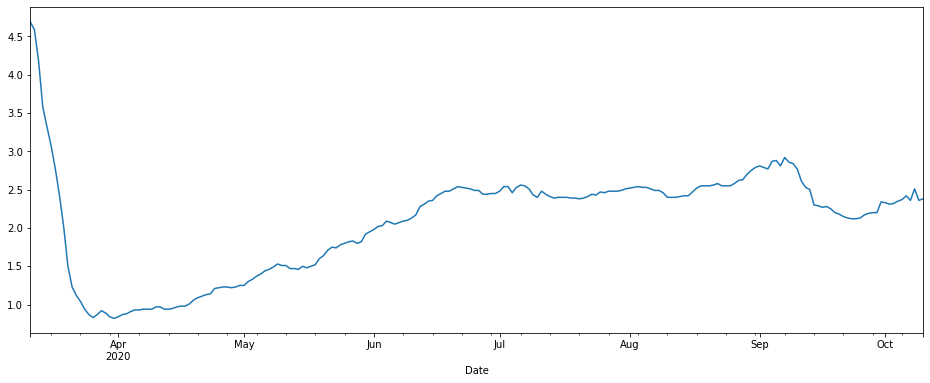

In [37]:
df = df [(df['county'] == 'Dane County')]
df=df.drop(['county'],axis=1)
# convert dataframe to series
df = df.T.squeeze()
print(type(df))
distance_df = df.to_frame()
distance_df.index.names = ['Date']
distance_df.index = pd.to_datetime(df.index) # convert to datetime
distance_df.columns=['Distance']
distance_df['Distance'] = pd.to_numeric(distance_df['Distance'])
distance_df=distance_df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
start = distance_df.index.searchsorted(dt.datetime(2020, 3, 11))
end = distance_df.index.searchsorted(dt.datetime(2020, 10, 11))
distance_df = distance_df.iloc[start:end]
print(distance_df.shape)
#distance_df
distance_df['Distance'].plot(figsize = (16,6))
plt.show()

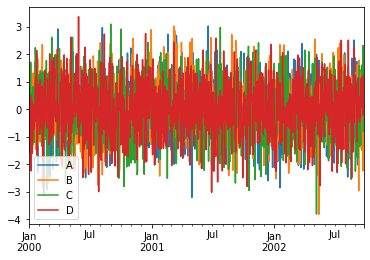

In [44]:
## time series plot testing
ts = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4),index=ts.index, columns=list('ABCD'))
df.plot()

## County-Level Close Contact Index (7-day rolling average) in Wisconsin

(72, 285)
['Adams County' 'Ashland County' 'Barron County' 'Bayfield County'
 'Brown County' 'Buffalo County' 'Burnett County' 'Calumet County'
 'Chippewa County' 'Clark County' 'Columbia County' 'Crawford County'
 'Dane County' 'Dodge County' 'Door County' 'Douglas County' 'Dunn County'
 'Eau Claire County' 'Florence County' 'Fond du Lac County'
 'Forest County' 'Grant County' 'Green County' 'Green Lake County'
 'Iowa County' 'Iron County' 'Jackson County' 'Jefferson County'
 'Juneau County' 'Kenosha County' 'Kewaunee County' 'La Crosse County'
 'Lafayette County' 'Langlade County' 'Lincoln County' 'Manitowoc County'
 'Marathon County' 'Marinette County' 'Marquette County'
 'Menominee County' 'Milwaukee County' 'Monroe County' 'Oconto County'
 'Oneida County' 'Outagamie County' 'Ozaukee County' 'Pepin County'
 'Pierce County' 'Polk County' 'Portage County' 'Price County'
 'Racine County' 'Richland County' 'Rock County' 'Rusk County'
 'Sauk County' 'Sawyer County' 'Shawano County' 'She

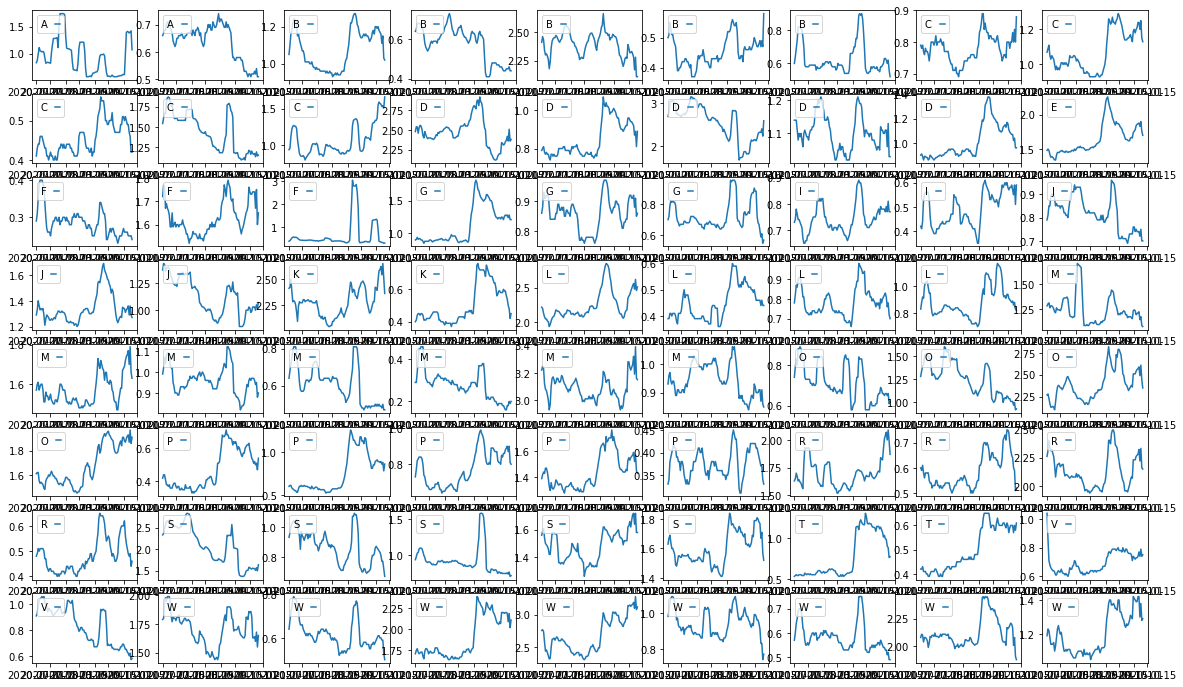

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

path="./wisconsin_county_csv/"
df=pd.read_csv(path+'county_cuebiq_CCI.txt')
df.sort_values(by='county',inplace = True) 
print(df.shape)
counties=df['county'].unique()
print(counties)

fig, ax = plt.subplots(nrows=8, ncols=9,figsize=(20,12))
index=0
for row in ax:
    for col in row:
        county_df = df [(df['county'] == counties[index])]
        county_df=county_df.drop(['county'],axis=1)
        # convert dataframe to series
        county_df = county_df.T.squeeze()
        distance_df = county_df.to_frame()
        distance_df.index.names = ['Date']
        distance_df.index = pd.to_datetime(county_df.index) # convert to datetime
        distance_df.columns=['Distance']
        distance_df['Distance'] = pd.to_numeric(distance_df['Distance'])
        distance_df=distance_df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
        start = distance_df.index.searchsorted(dt.datetime(2020, 7, 1))
        end = distance_df.index.searchsorted(dt.datetime(2020, 10, 11))
        distance_df = distance_df.iloc[start:end]
        col.plot(distance_df['Distance'])
        col.legend(counties[index], loc='upper left', handlelength=0.5, markerfirst=False, shadow=False)
        index+=1
plt.show()

In [22]:
## Join FIPS Code
fips=pd.read_csv('state_and_county_fips_master.csv')
fips=fips[fips['state']=='WI']
df=df.merge(fips, how='left',left_on='county', right_on='name')
df

county  2020-01-01  2020-01-02  2020-01-03  2020-01-04  \
0       Adams County        1.00        0.99        0.93        0.74   
1     Ashland County        0.46        0.46        0.50        0.50   
2      Barron County        1.04        1.00        0.98        1.01   
3    Bayfield County        0.42        0.42        0.42        0.40   
4       Brown County        3.45        3.32        3.39        3.70   
..               ...         ...         ...         ...         ...   
67   Waukesha County        2.97        2.96        3.08        3.25   
68    Waupaca County        0.85        0.86        0.89        0.91   
69   Waushara County        0.63        0.63        0.65        0.73   
70  Winnebago County        2.85        2.90        2.66        2.81   
71       Wood County        1.15        1.19        1.27        1.32   

    2020-01-05  2020-01-06  2020-01-07  2020-01-08  2020-01-09  ...  \
0         0.59        0.59        0.56        0.54        0.53  ...   
1         0.50        0.53        0.52        0.56        0.55  ...   
2         0.98        1.02        0.98        1.01        1.06  ...   
3         0.39        0.40        0.39        0.40        0.40  ...   
4         3.91        3.95        3.88        4.06        4.12  ...   
..         ...         ...         ...         ...         ...  ...   
67        3.39        3.42        3.49        3.67        3.73  ...   
68        0.99        1.04        1.06        1.10        1.13  ...   
69        0.77        0.79        0.75        0.74        0.72  ...   
70        2.90        3.02        3.14        3.28        3.31  ...   
71        1.42        1.52        1.60        1.69        1.75  ...   

    2020-10-04  2020-10-05  2020-10-06  2020-10-07  2020-10-08  2020-10-09  \
0         1.39        1.41        1.40        1.38        1.40        1.42   
1         0.52        0.52        0.53        0.52        0.54        0.51   
2         1.18        1.17        1.16        1.11        1.15        1.03   
3         0.44        0.45        0.45        0.45        0.46        0.44   
4         2.33        2.31        2.28        2.17        2.28        2.11   
..         ...         ...         ...         ...         ...         ...   
67        3.15        3.16        3.19        3.10        3.28        3.08   
68        0.96        0.94        0.91        0.83        0.83        0.74   
69        0.54        0.53        0.53        0.51        0.52        0.49   
70        2.21        2.20        2.17        2.01        2.08        1.91   
71        1.39        1.42        1.42        1.30        1.38        1.28   

    2020-10-10   fips              name  state  
0         1.07  55001      Adams County     WI  
1         0.51  55003    Ashland County     WI  
2         1.02  55005     Barron County     WI  
3         0.44  55007   Bayfield County     WI  
4         2.11  55009      Brown County     WI  
..         ...    ...               ...    ...  
67        3.12  55133   Waukesha County     WI  
68        0.77  55135    Waupaca County     WI  
69        0.49  55137   Waushara County     WI  
70        1.88  55139  Winnebago County     WI  
71        1.29  55141       Wood County     WI  

[72 rows x 288 columns]

In [26]:
## county level confirmed cases time series NYT
# Hospitialization Data
path="/Users/Song/COVID19/Cuebiq/"
hospitial_data = pd.read_csv(path+'/nyt_us-counties.csv', sep=',',dtype=object)
print(hospitial_data.head())

         date     county       state   fips cases deaths
0  2020-01-21  Snohomish  Washington  53061     1      0
1  2020-01-22  Snohomish  Washington  53061     1      0
2  2020-01-23  Snohomish  Washington  53061     1      0
3  2020-01-24       Cook    Illinois  17031     1      0
4  2020-01-24  Snohomish  Washington  53061     1      0


## Looping County-Level Correlation Analysis

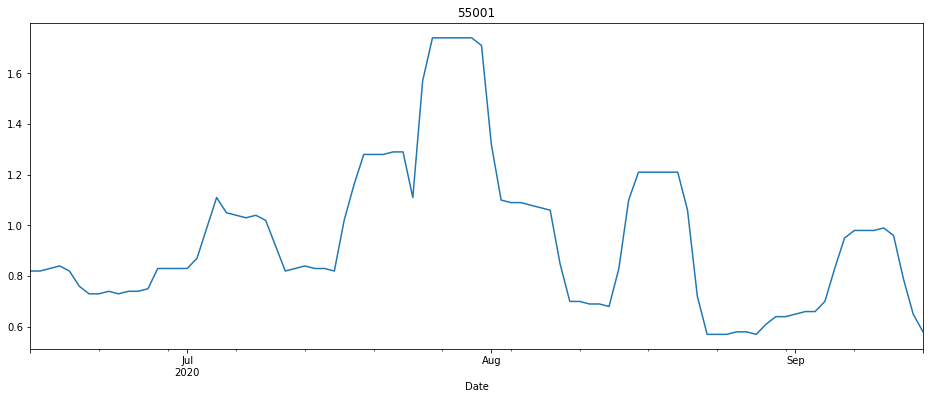

55001 Adams County -0.060141145447335086 0.5690288466678461


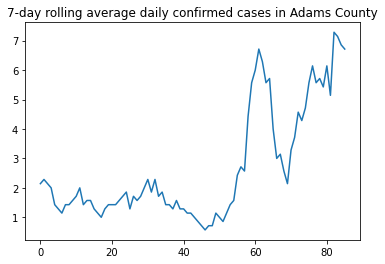

86 86
55001 Adams County -0.2665964190152123 0.013093425026501295


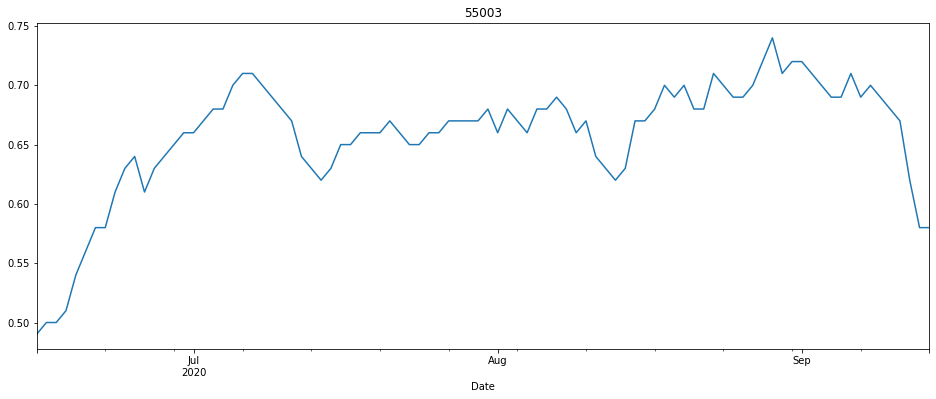

55003 Ashland County 0.12169725533683422 0.24783644971367425


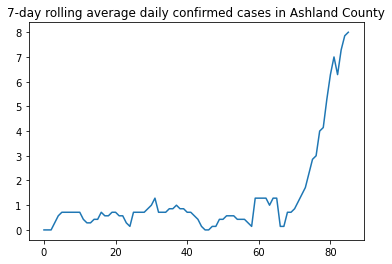

86 86
55003 Ashland County -0.09936876972054985 0.3626752752882651


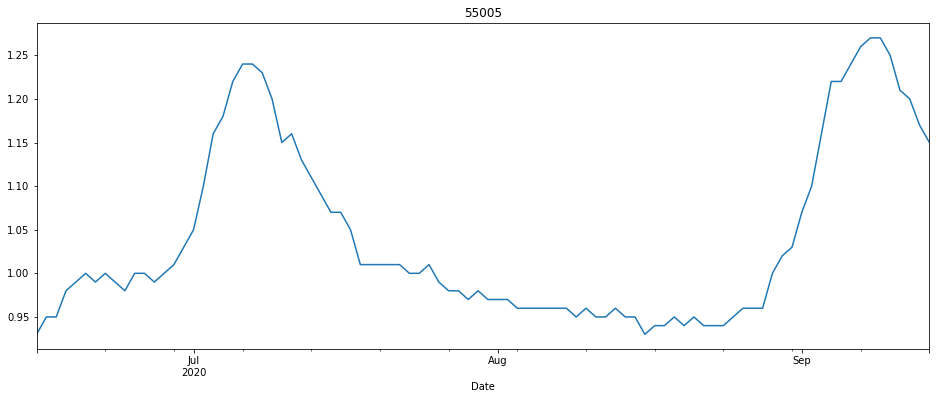

55005 Barron County 0.24606018337911437 0.018062648036022165


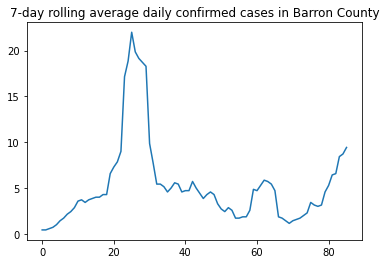

86 86
55005 Barron County 0.11886487482465026 0.2756923138883246


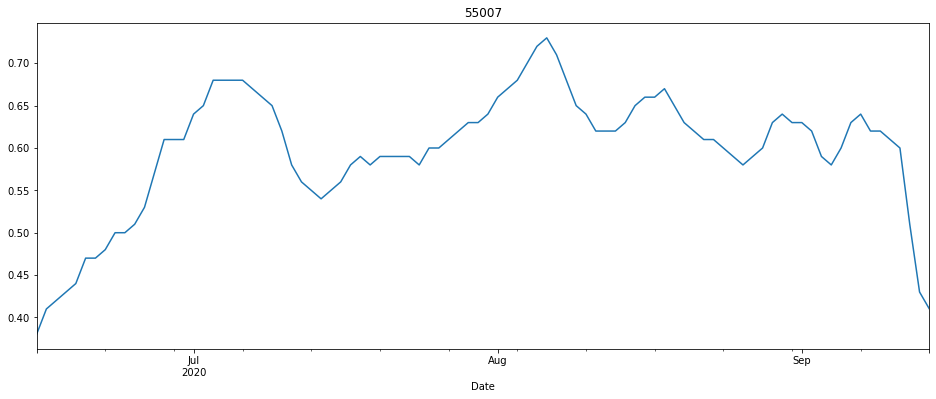

55007 Bayfield County 0.023553380664497442 0.8236459332391624


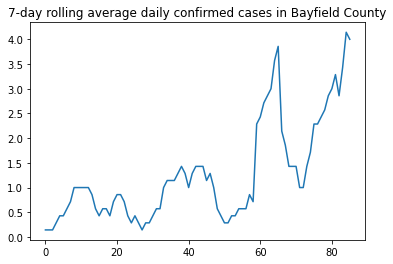

86 86
55007 Bayfield County -0.14761318163453288 0.17499733688604885


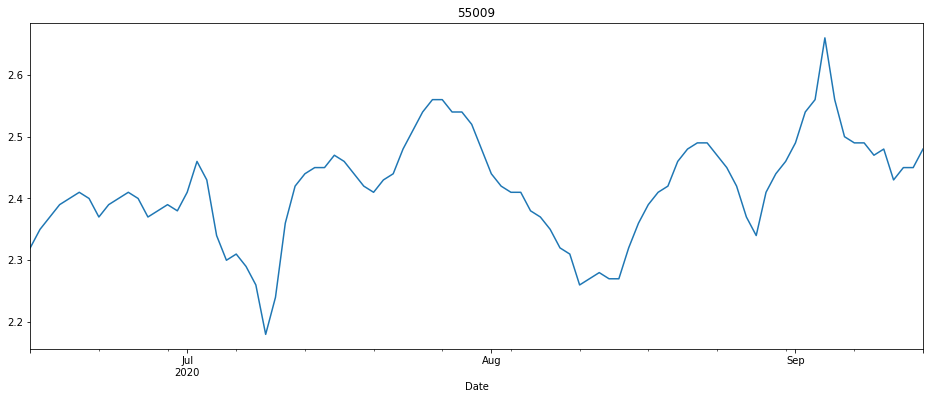

55009 Brown County 0.2662670585020585 0.010302195275249894


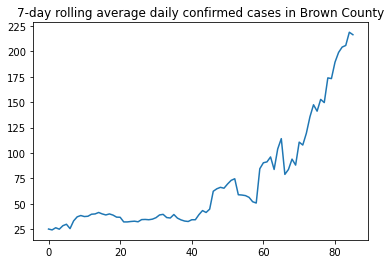

86 86
55009 Brown County 0.324446420146903 0.002306297566140274


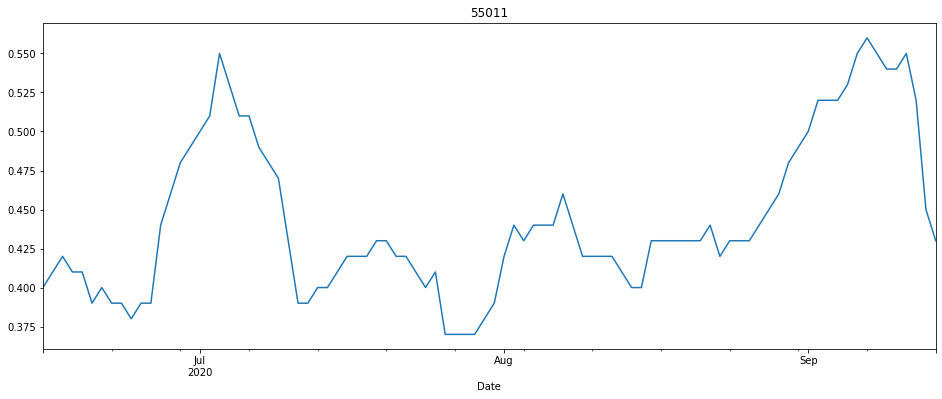

55011 Buffalo County 0.26303135324960053 0.011303039124279192


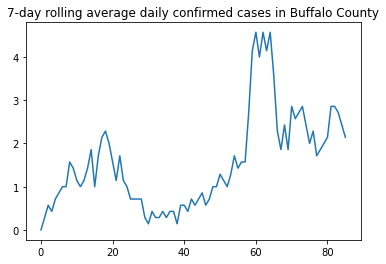

86 86
55011 Buffalo County 0.3735294180143085 0.00039648304743138254


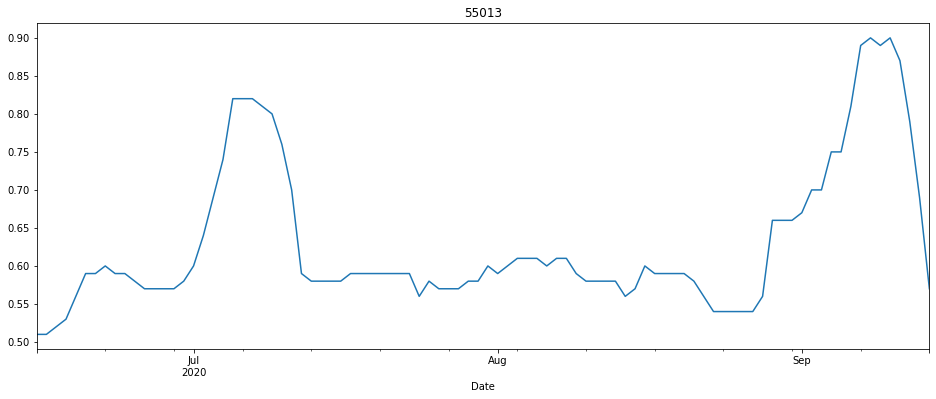

55013 Burnett County 0.5455404705626197 1.8714169982329367e-08


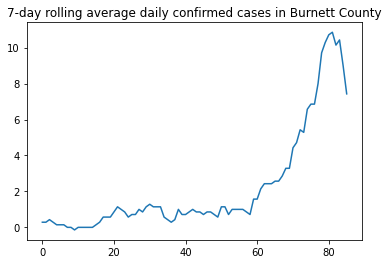

86 86
55013 Burnett County 0.629724805131609 8.294918094011071e-11


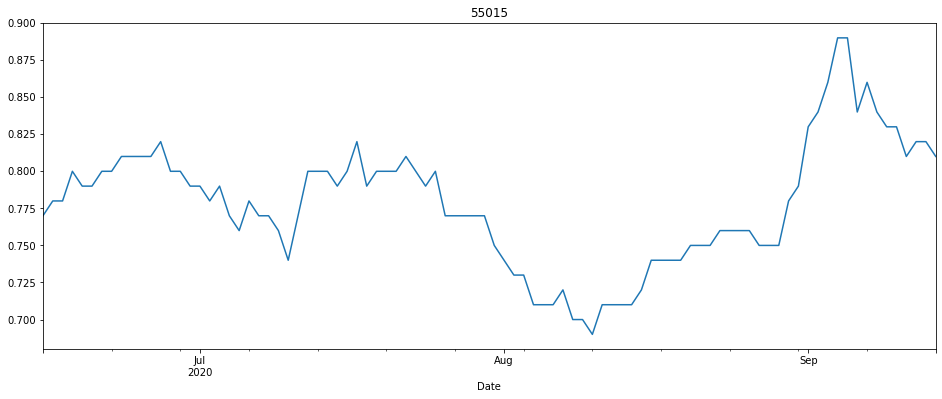

55015 Calumet County 0.36817609600537465 0.00030520192768107595


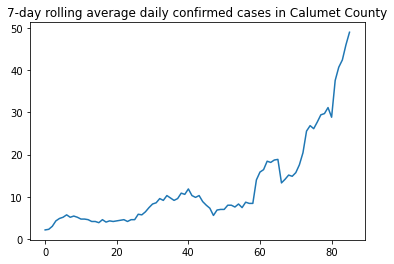

86 86
55015 Calumet County 0.43815170385899727 2.4519507186023967e-05


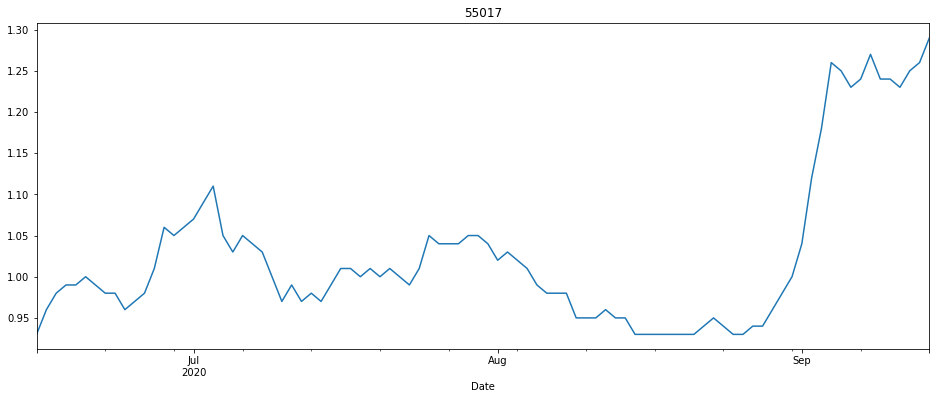

55017 Chippewa County 0.3363984591013122 0.0010431979718315187


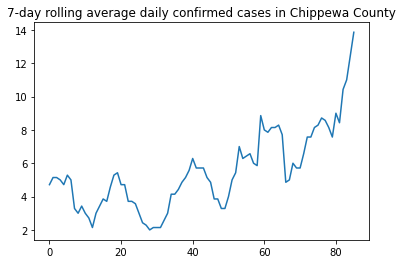

86 86
55017 Chippewa County 0.48976081037831776 1.702741428554878e-06


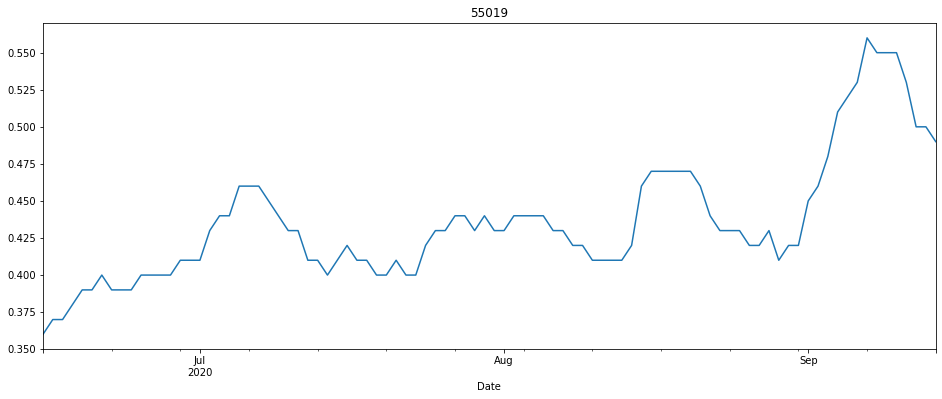

55019 Clark County 0.5014654183944522 3.546220645748157e-07


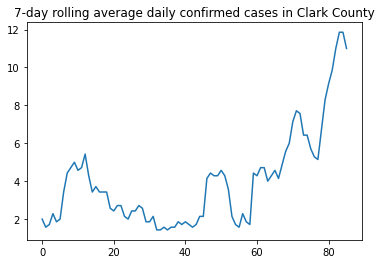

86 86
55019 Clark County 0.6288541683888134 8.963384309194335e-11


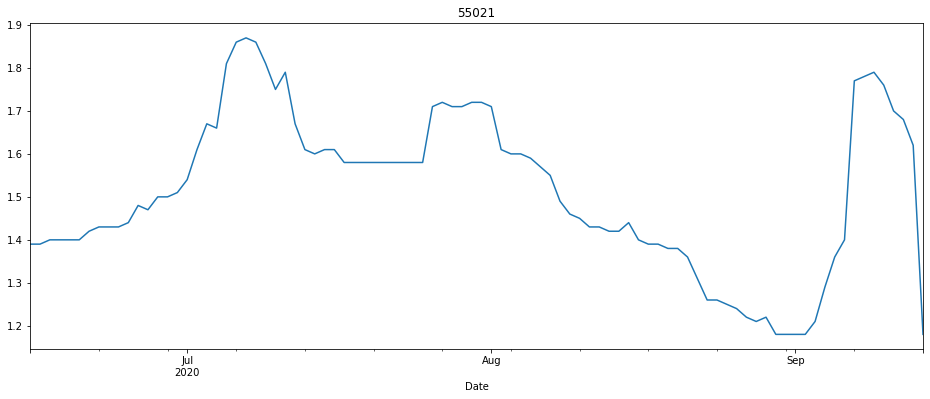

55021 Columbia County -0.05264355137140619 0.6182154196091596


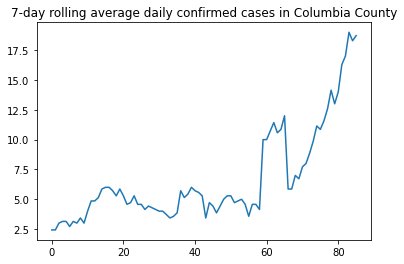

86 86
55021 Columbia County -0.11070563575090472 0.31022876543281425


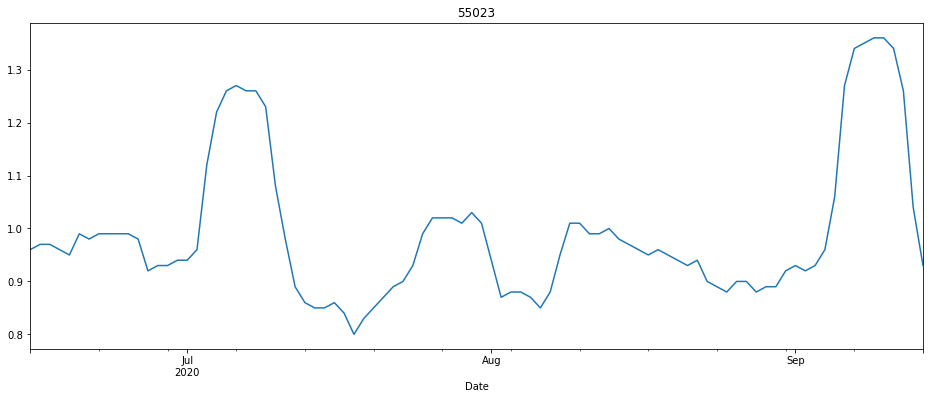

55023 Crawford County 0.19138229147745964 0.06762345852033896


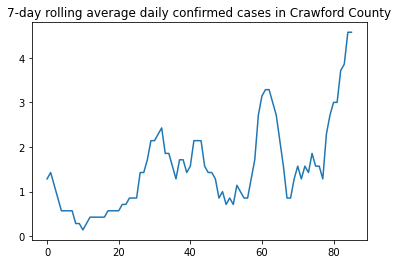

86 86
55023 Crawford County 0.0984685807501402 0.3670609041872582


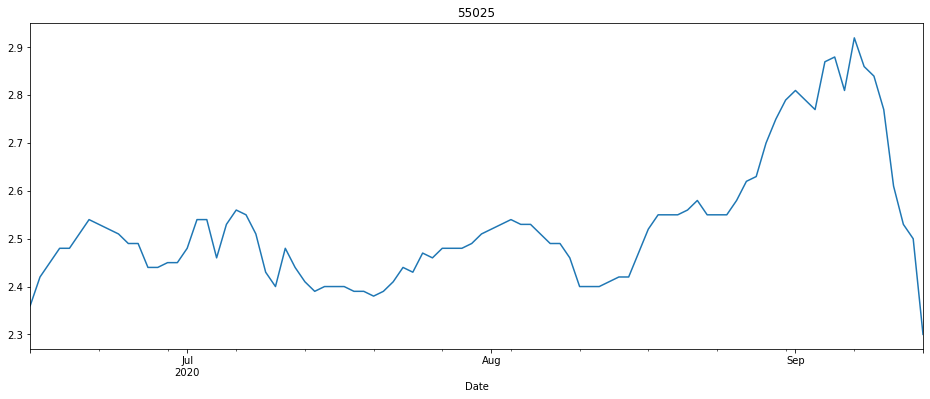

55025 Dane County 0.31305789208093876 0.002377950447194644


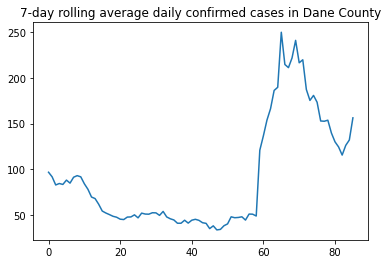

86 86
55025 Dane County 0.6575286516564408 6.1062560612444315e-12


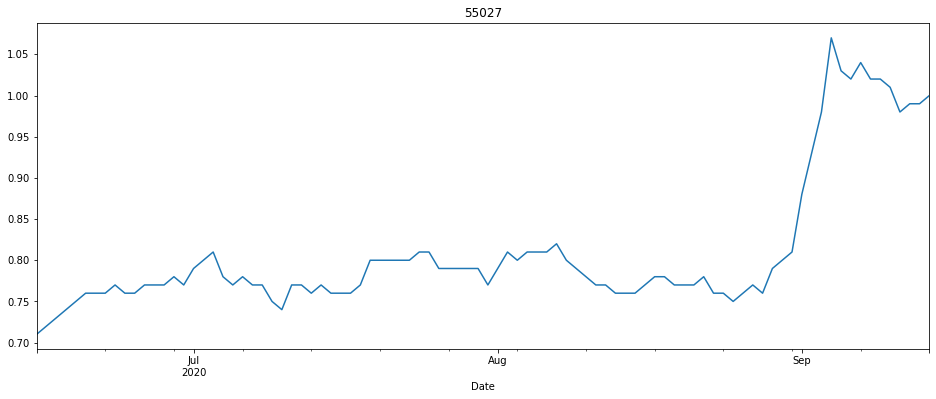

55027 Dodge County 0.6001557391819836 2.568716200025817e-10


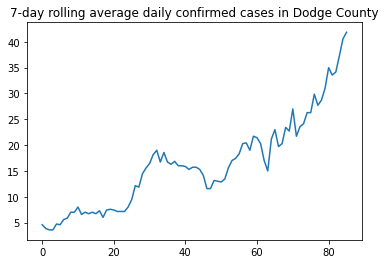

86 86
55027 Dodge County 0.7562691376885593 3.794861233374724e-17


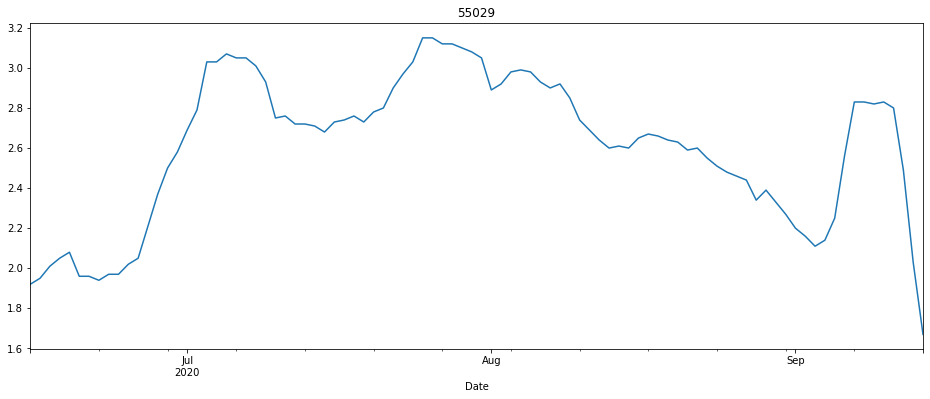

55029 Door County -0.12597779841455123 0.23146663665422473


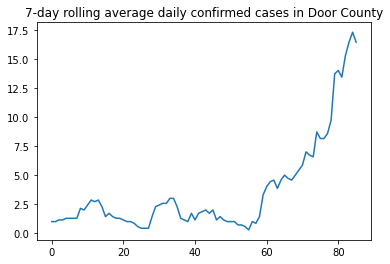

86 86
55029 Door County -0.30293501286922253 0.004580589907970517


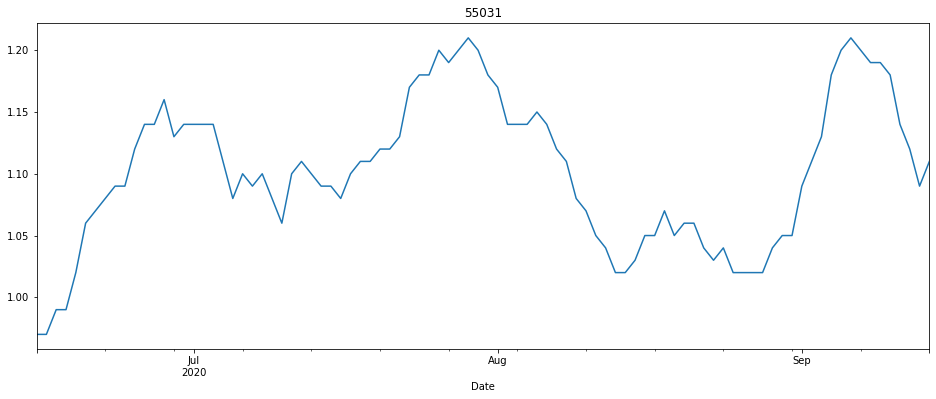

55031 Douglas County 0.18449627794523724 0.07830986755725812


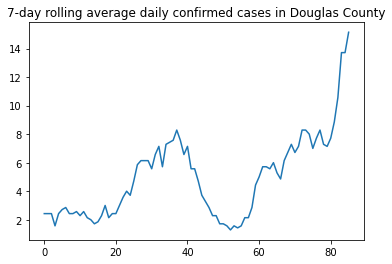

86 86
55031 Douglas County 0.3325282529156336 0.0017591360051222103


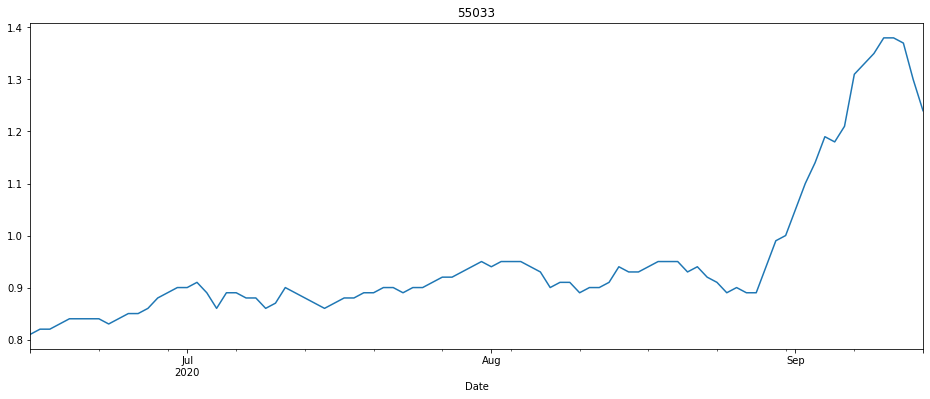

55033 Dunn County 0.8481070538402694 1.4630225772701164e-26


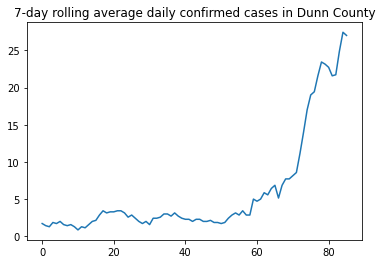

86 86
55033 Dunn County 0.9511163917442103 1.2488019115467451e-44


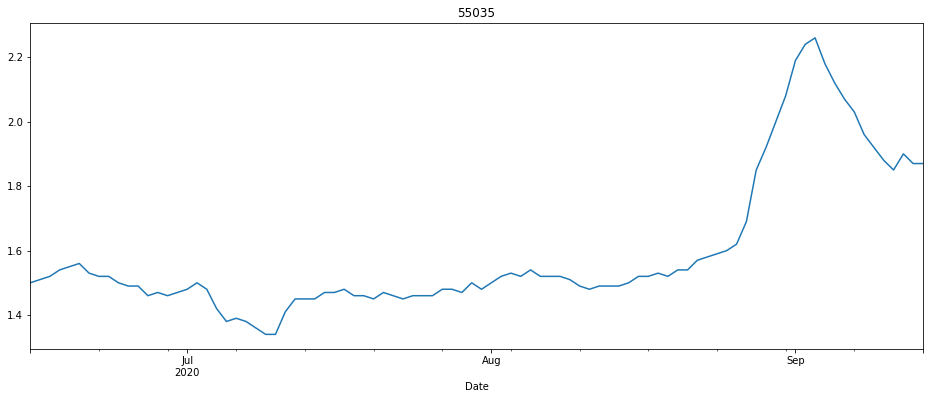

55035 Eau Claire County 0.8081931414606751 2.0822258168465167e-22


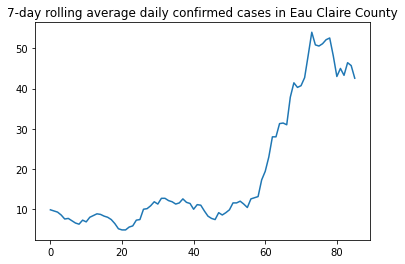

86 86
55035 Eau Claire County 0.942045624063688 1.319215074325071e-41


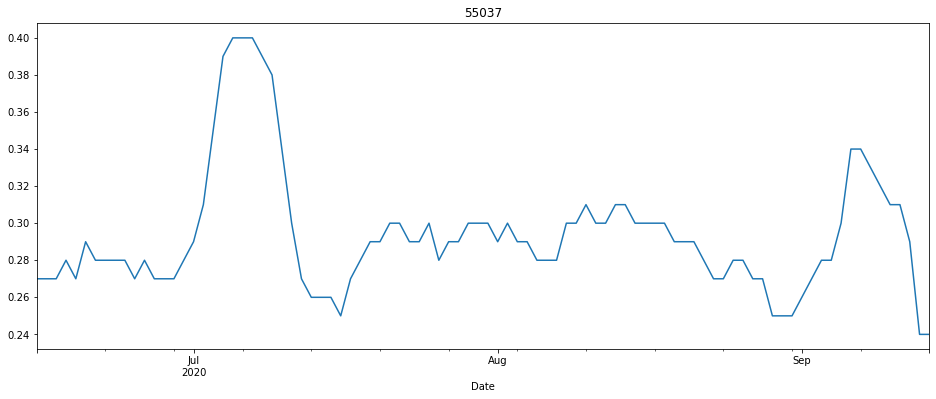

55037 Florence County -0.06183260078796862 0.5581919217780632


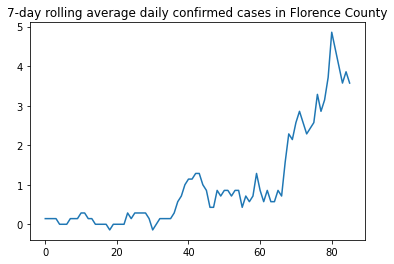

86 86
55037 Florence County -0.14204820077725777 0.19201157608302288


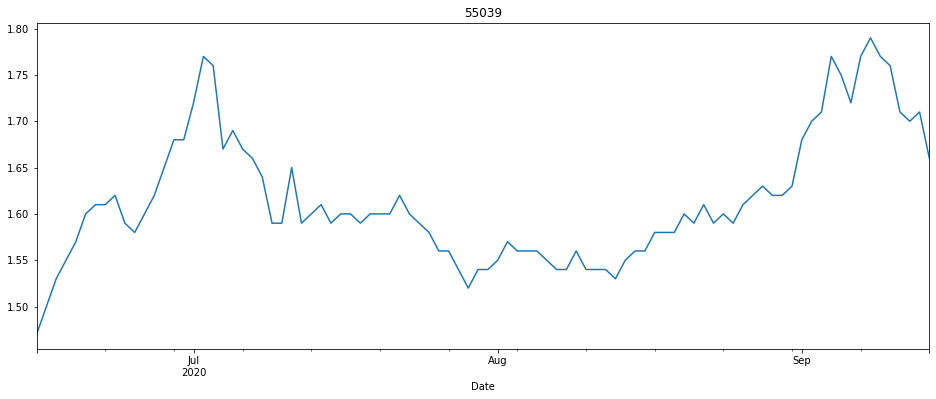

55039 Fond du Lac County 0.35176139022150926 0.0005851034823441326


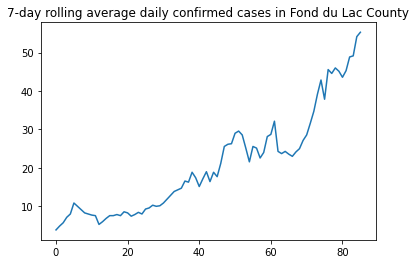

86 86
55039 Fond du Lac County 0.36728287435210305 0.0005040091602084158


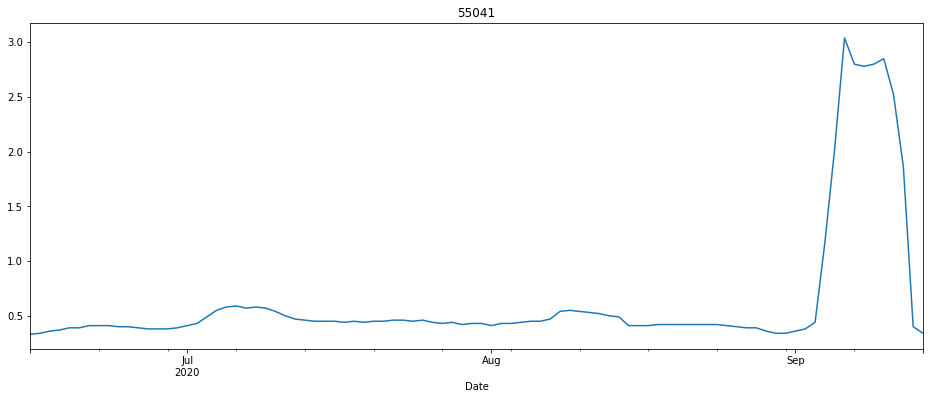

55041 Forest County 0.3765516258263505 0.0002160094190115962


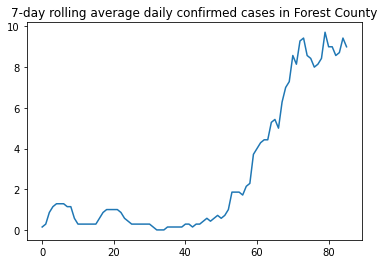

86 86
55041 Forest County 0.5506034494009736 3.9647456509195746e-08


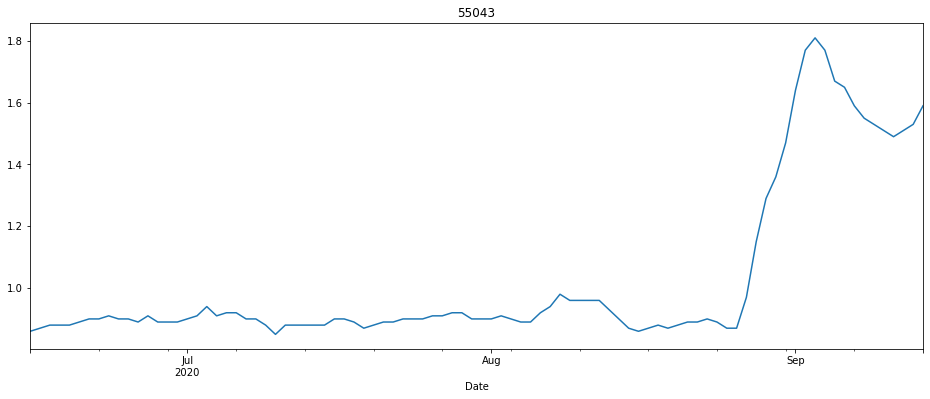

55043 Grant County 0.7011746768941002 7.087875751187614e-15


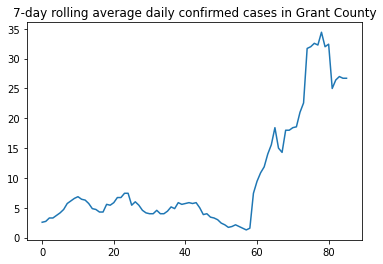

86 86
55043 Grant County 0.9088893442312153 1.1847776493920733e-33


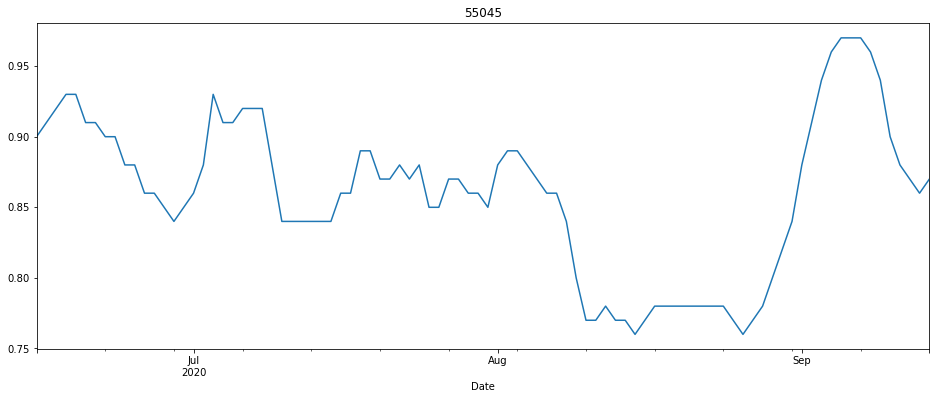

55045 Green County 0.02048919845175702 0.8462864496527104


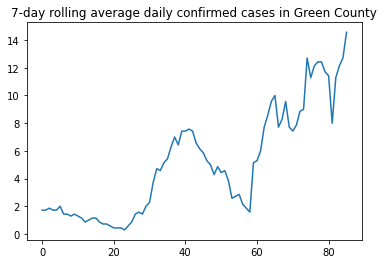

86 86
55045 Green County 0.16170676956186214 0.13689025544168798


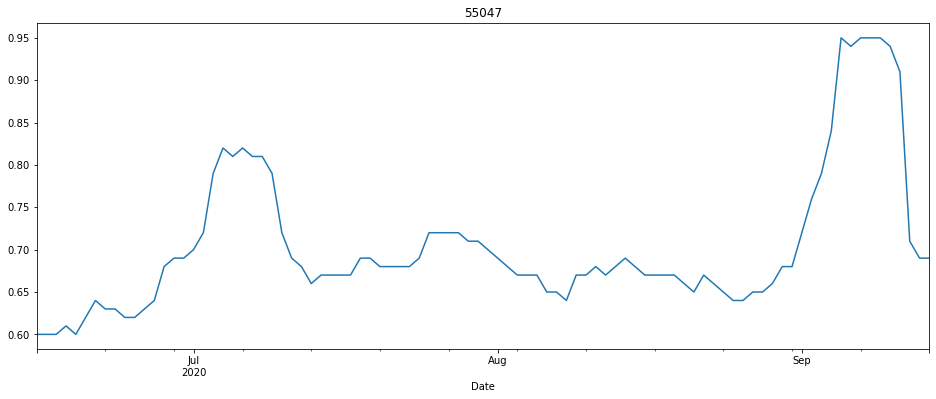

55047 Green Lake County 0.4376698667007074 1.2843108973258354e-05


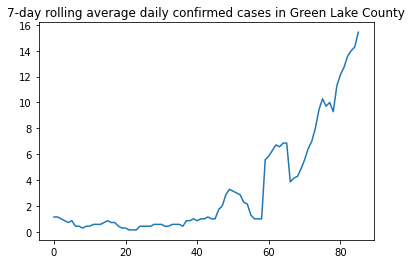

86 86
55047 Green Lake County 0.4948467589922287 1.2778168953695302e-06


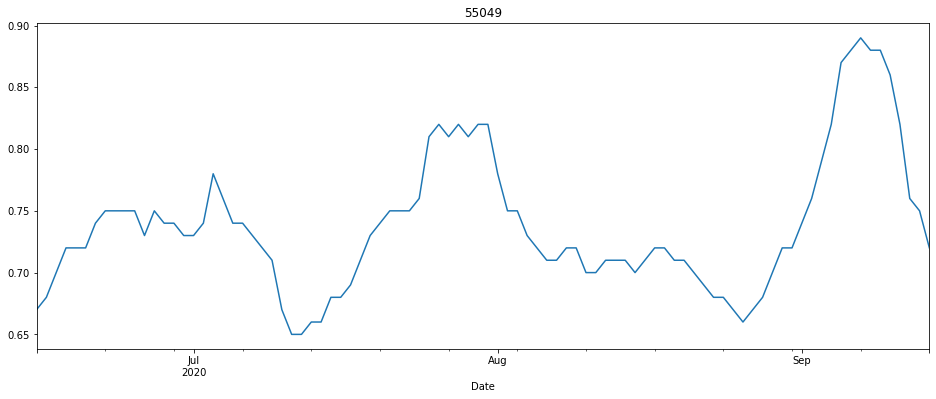

55049 Iowa County 0.26036042354005134 0.012192119909579573


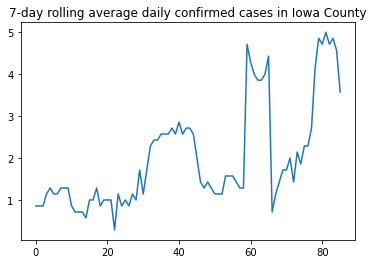

86 86
55049 Iowa County 0.4354594224870474 2.7857271489842137e-05


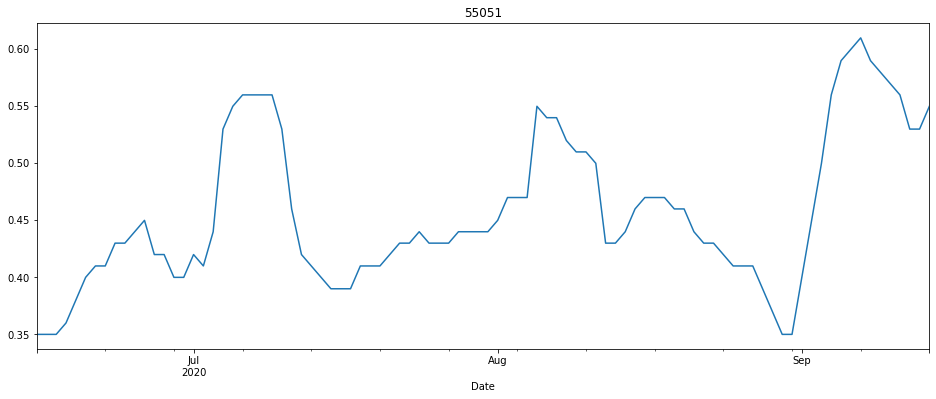

55051 Iron County 0.27253688310221463 0.008581459388640751


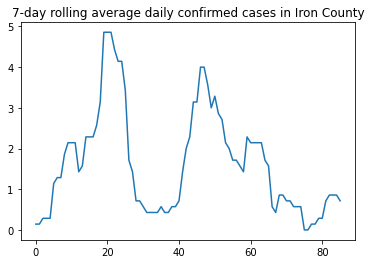

86 86
55051 Iron County 0.04006700471779021 0.7141590508207207


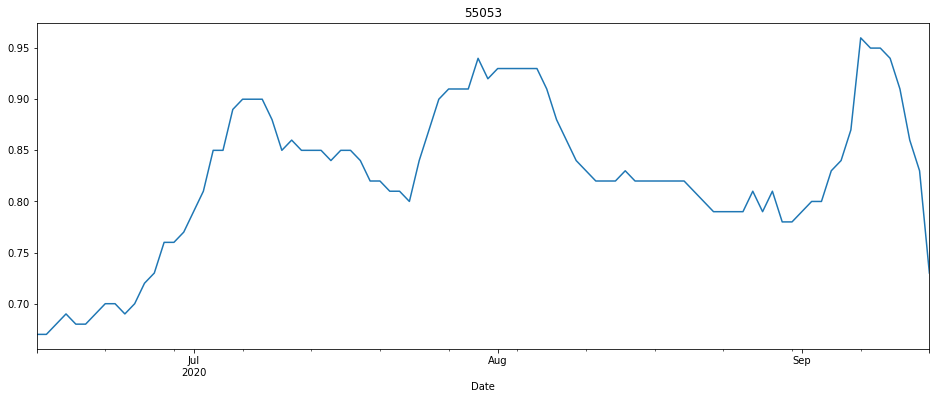

55053 Jackson County 0.2505603810754806 0.015996614793796965


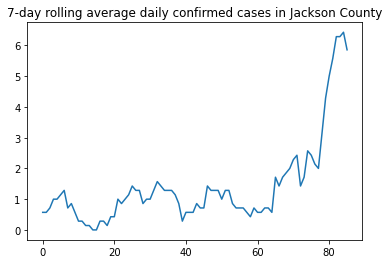

86 86
55053 Jackson County 0.1328175681384674 0.22281180717479715


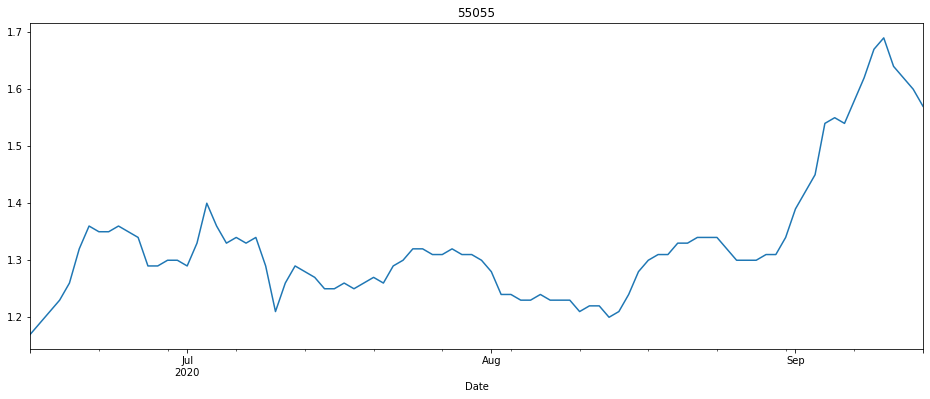

55055 Jefferson County 0.4607210407525008 3.812863467837984e-06


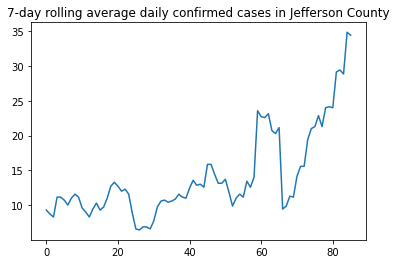

86 86
55055 Jefferson County 0.7534118110470913 5.803217136496297e-17


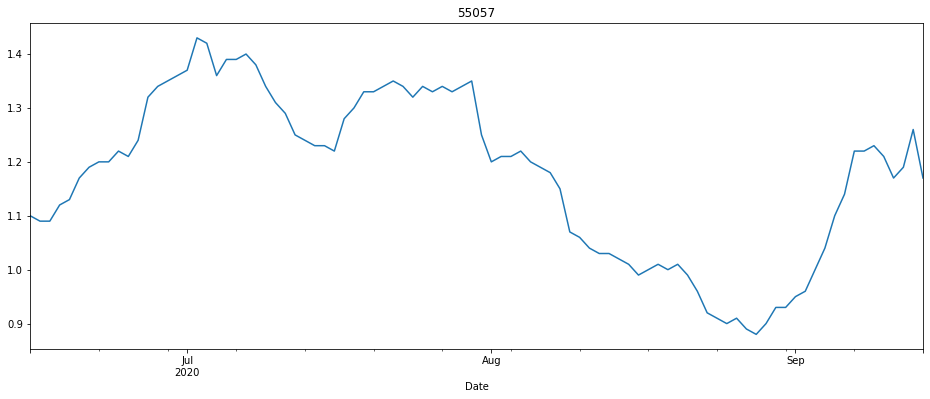

55057 Juneau County -0.176199131302658 0.09293639295366246


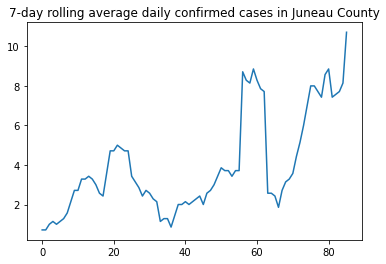

86 86
55057 Juneau County -0.35103673860898515 0.0009201374887062993


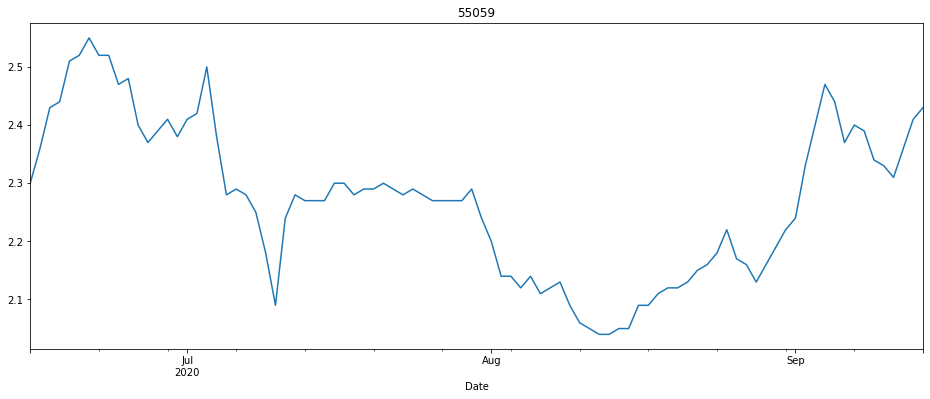

55059 Kenosha County 0.03314985055579095 0.75374811021183


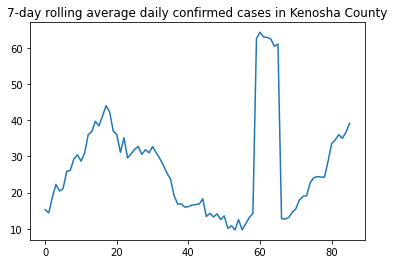

86 86
55059 Kenosha County 0.10431192051367008 0.33917105365703004


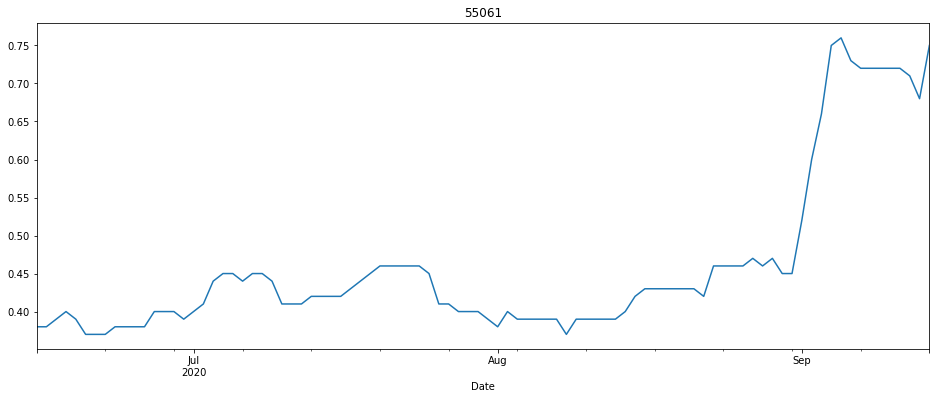

55061 Kewaunee County 0.7396776605835961 3.714110955341491e-17


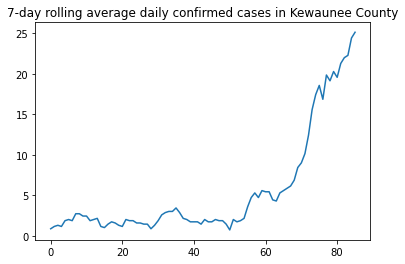

86 86
55061 Kewaunee County 0.949510340749488 4.69714368110259e-44


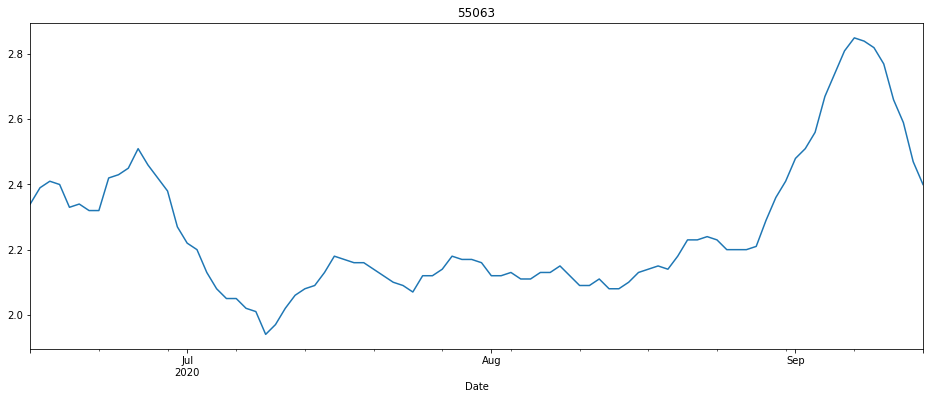

55063 La Crosse County 0.4596230711191647 4.048104187048151e-06


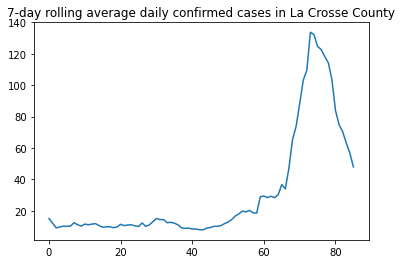

86 86
55063 La Crosse County 0.7749148666880067 2.0416318273557553e-18


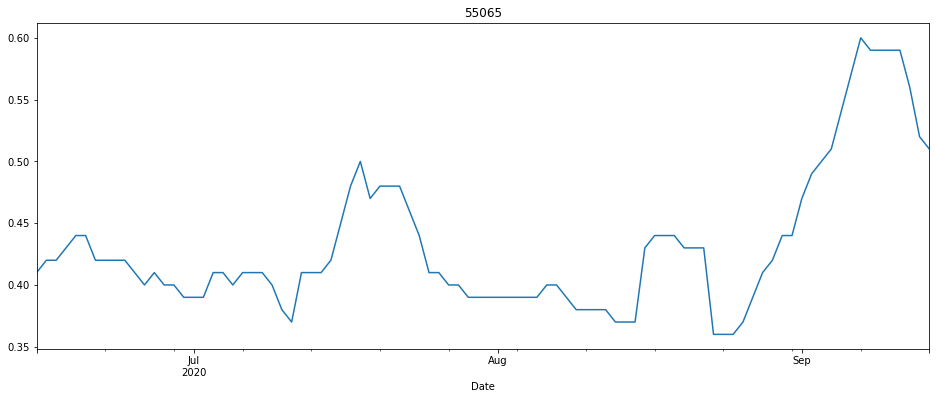

55065 Lafayette County 0.6954049920950034 1.4497720058569544e-14


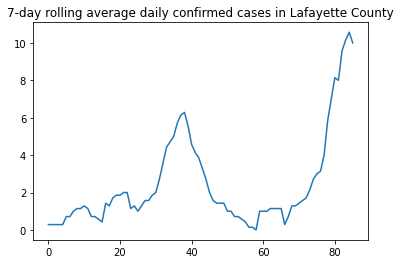

86 86
55065 Lafayette County 0.610020020771746 4.5259237034379864e-10


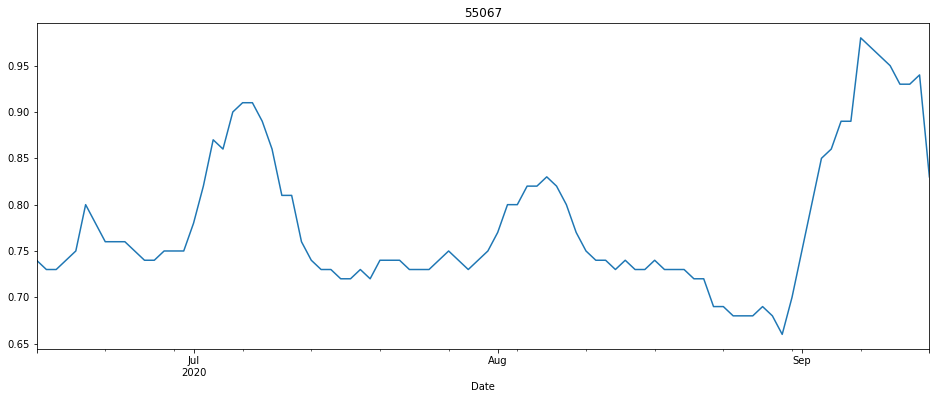

55067 Langlade County 0.36588046232946336 0.00033498689787775284


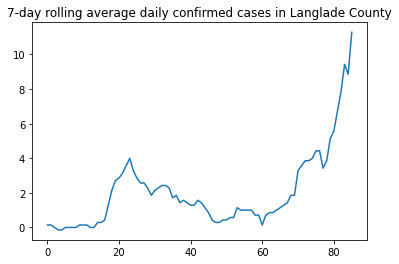

86 86
55067 Langlade County 0.4457341068096998 1.7016442706101183e-05


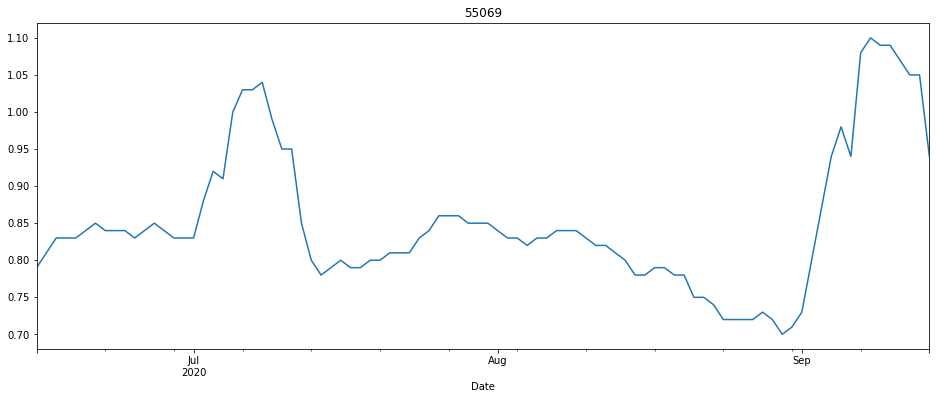

55069 Lincoln County 0.4955250245867722 5.111740153226617e-07


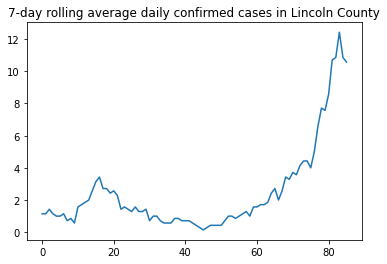

86 86
55069 Lincoln County 0.6373642170368393 4.158073222120456e-11


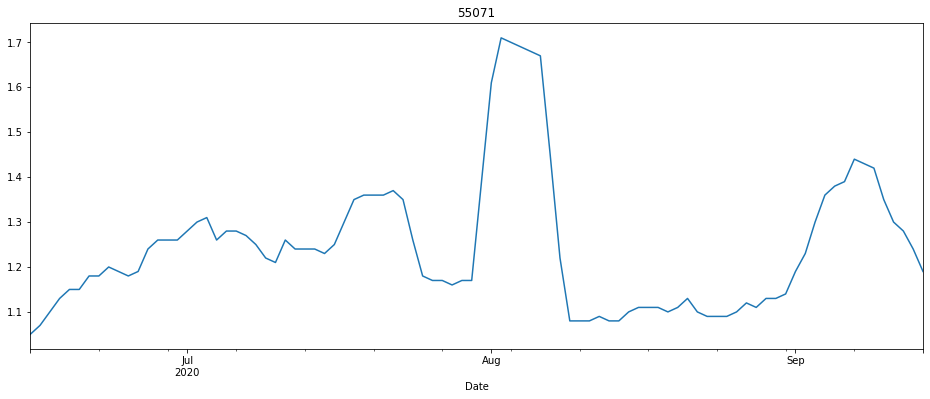

55071 Manitowoc County 0.05591992541063435 0.5964960176142604


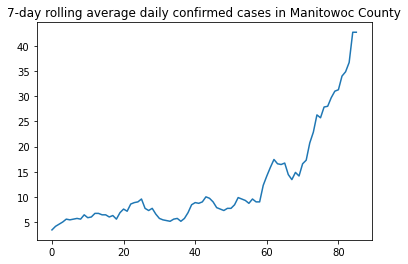

86 86
55071 Manitowoc County 0.06989206709071918 0.5225298396141582


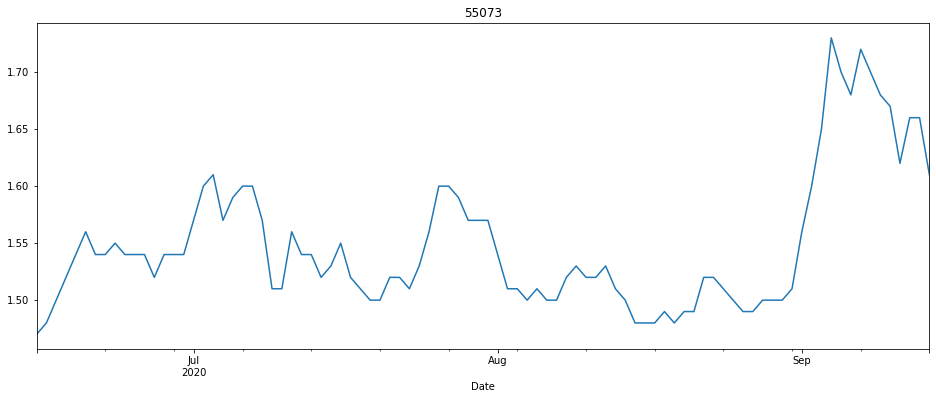

55073 Marathon County 0.5523373867644943 1.1439340585263926e-08


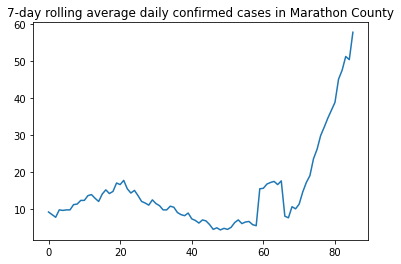

86 86
55073 Marathon County 0.7114986530437947 1.620176767599084e-14


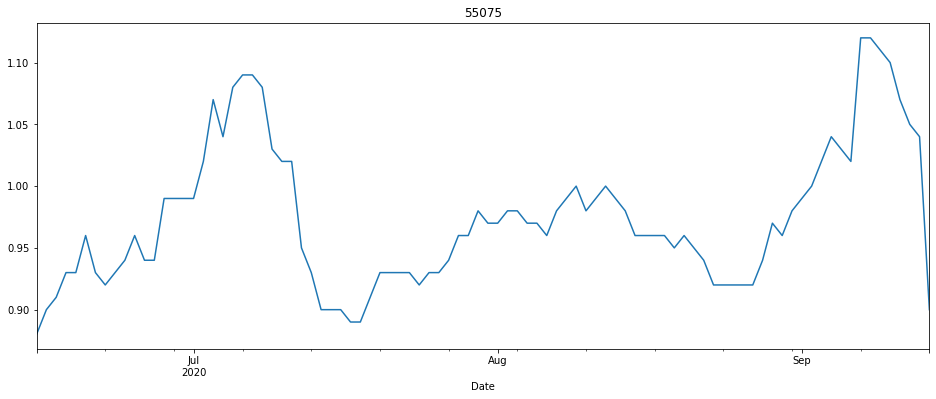

55075 Marinette County 0.3559431861847136 0.0004973399977767945


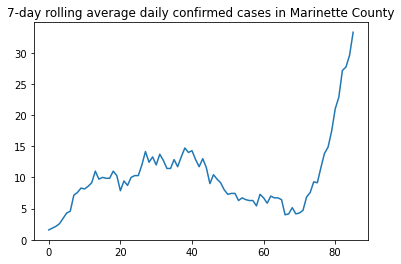

86 86
55075 Marinette County 0.32757753144954627 0.0020783636567709364


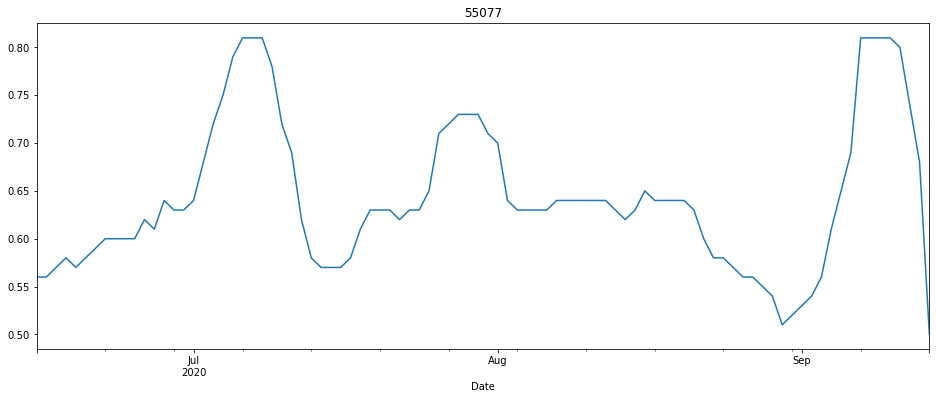

55077 Marquette County 0.041146630053886246 0.6969555005073814


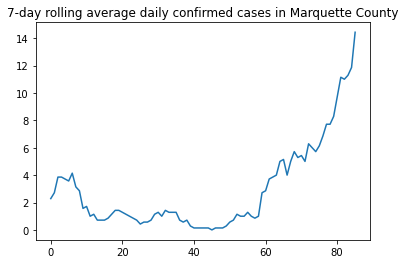

86 86
55077 Marquette County 0.009366864852006135 0.9317879777977878


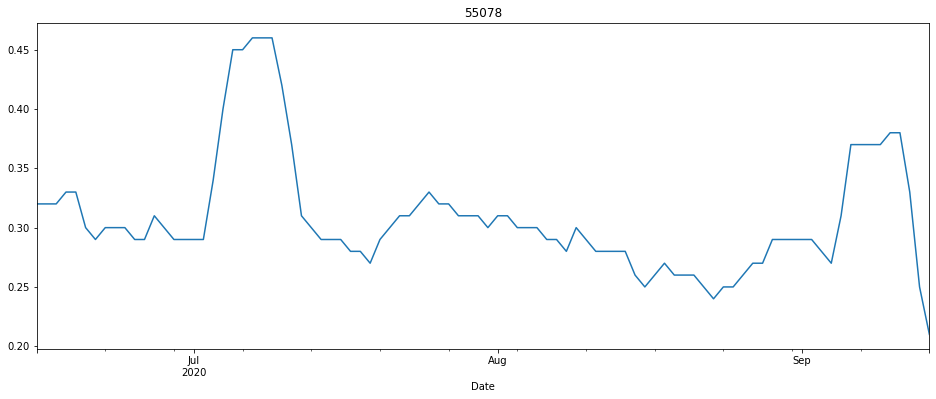

55078 Menominee County 0.11227237679244831 0.28663699400705356


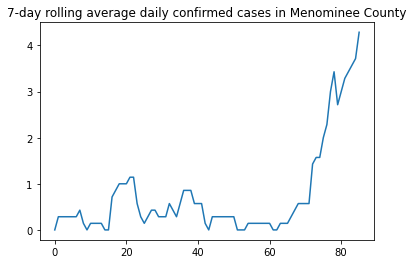

86 86
55078 Menominee County 0.19891891031580788 0.06634291491020722


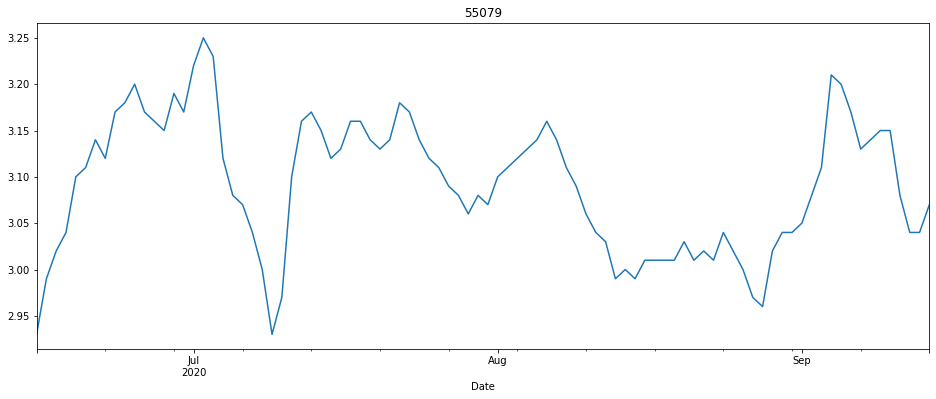

55079 Milwaukee County 0.07589035744684558 0.4721409026361258


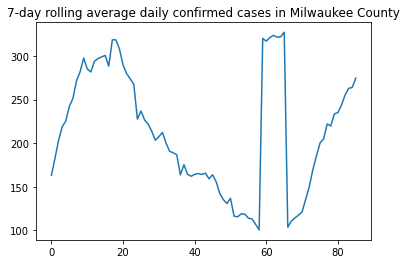

86 86
55079 Milwaukee County 0.16961125831561477 0.11846981183342456


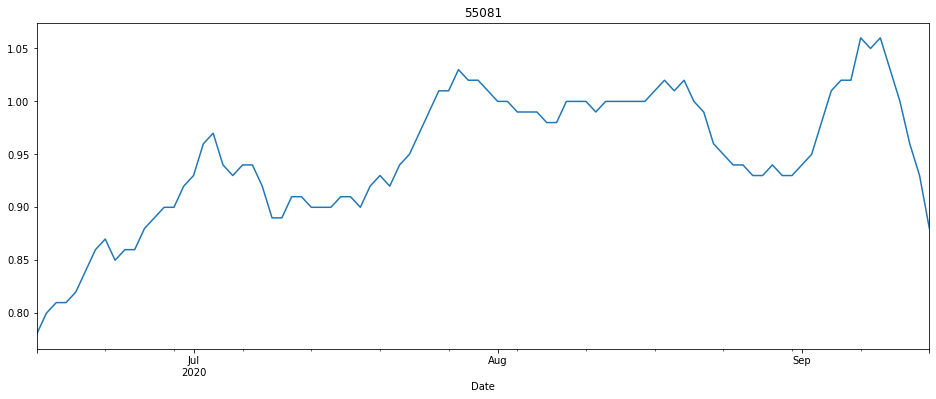

55081 Monroe County 0.12467293569373517 0.23637464156244475


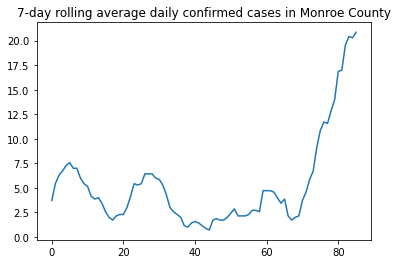

86 86
55081 Monroe County 0.017684412100380298 0.8716119503014594


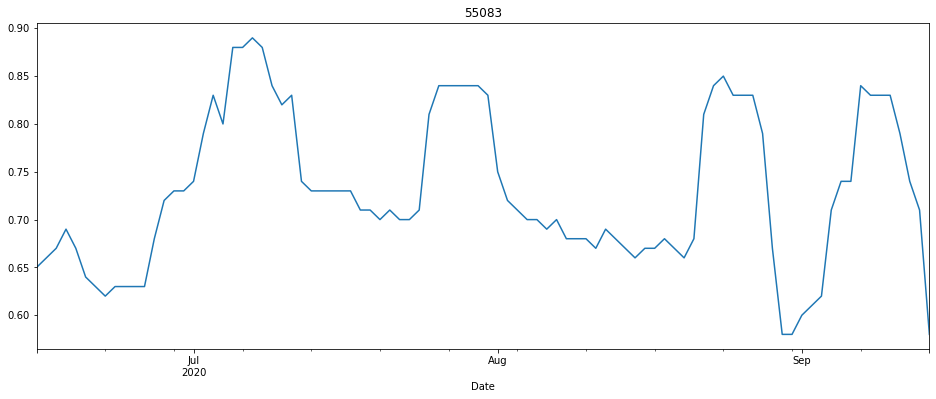

55083 Oconto County -0.018564867526259993 0.8605701684135451


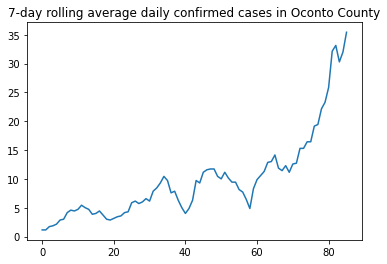

86 86
55083 Oconto County -0.0002981356279935371 0.9978262953078267


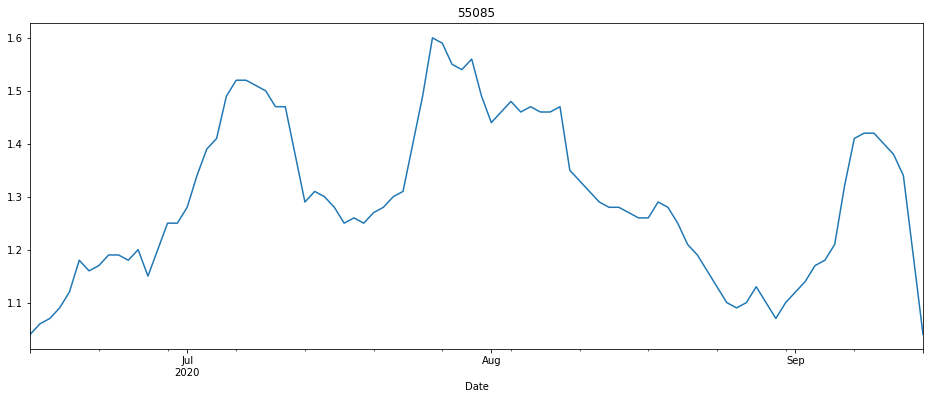

55085 Oneida County -0.010903901722085413 0.917836283239648


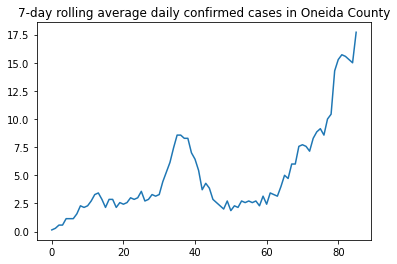

86 86
55085 Oneida County 0.03365073416438075 0.7583983250277301


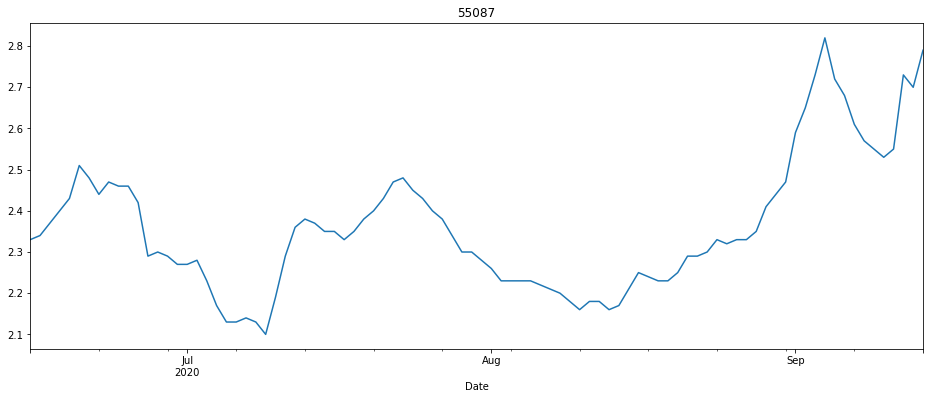

55087 Outagamie County 0.5168069202352724 1.3349228766183467e-07


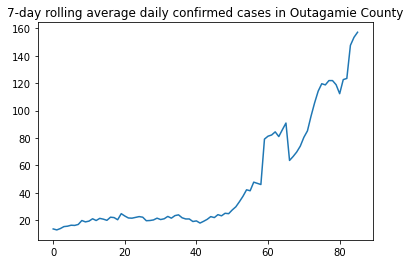

86 86
55087 Outagamie County 0.691439912360714 1.707839482322827e-13


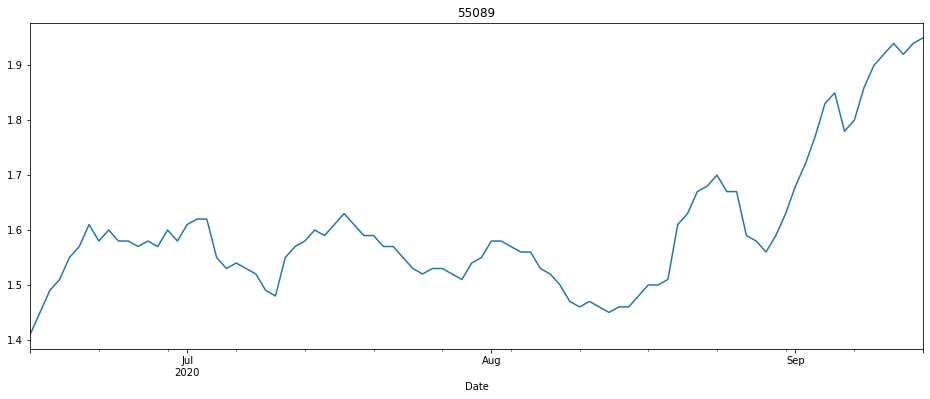

55089 Ozaukee County 0.18264414087407804 0.08140376285498502


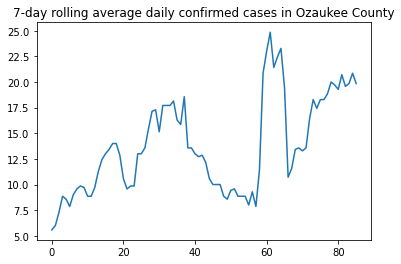

86 86
55089 Ozaukee County 0.5907503054805772 2.1327112211954772e-09


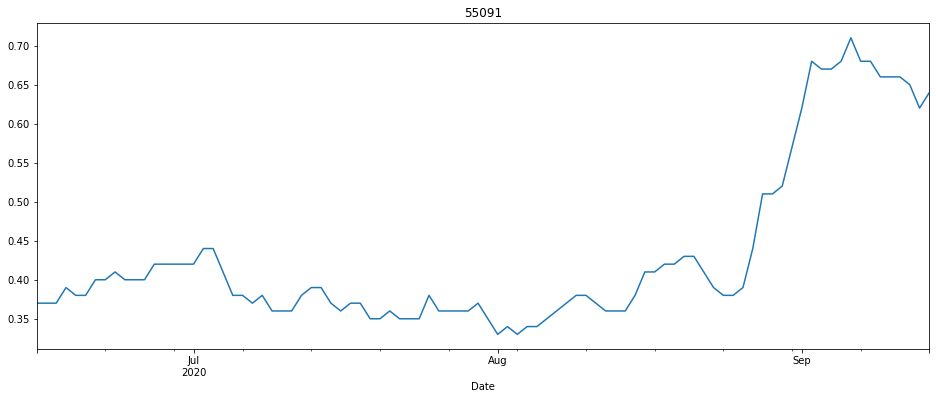

55091 Pepin County 0.1277697305010909 0.22484325030532948


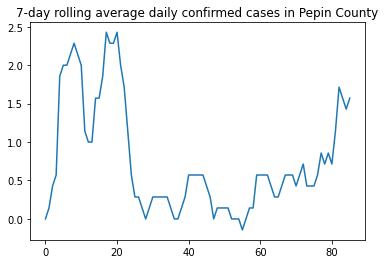

86 86
55091 Pepin County 0.13953103718477583 0.200087880452938


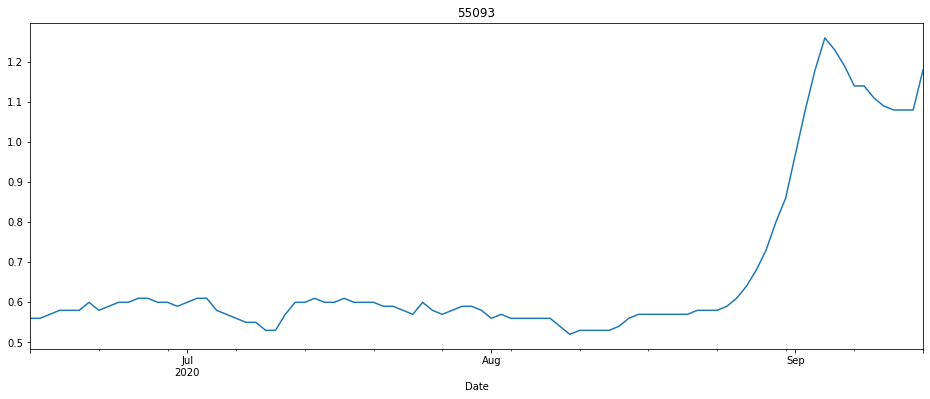

55093 Pierce County 0.44386993663790364 9.344488898498651e-06


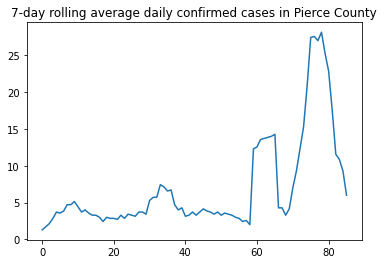

86 86
55093 Pierce County 0.799483593998113 2.750422858415696e-20


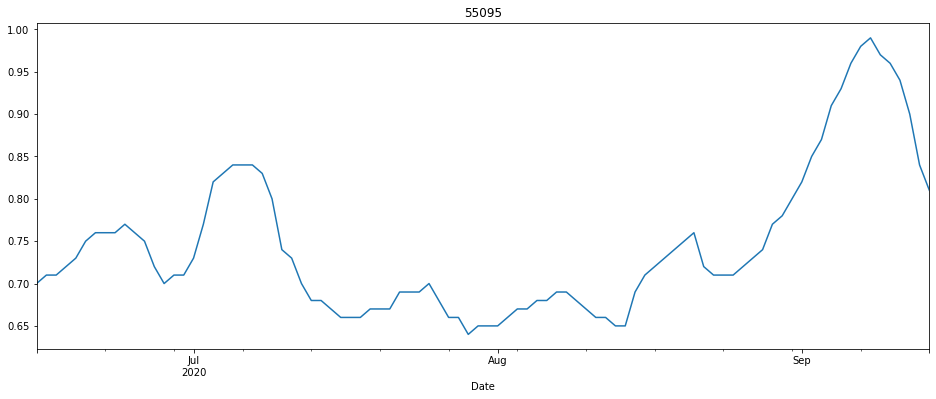

55095 Polk County 0.19196420838173808 0.06677728494659649


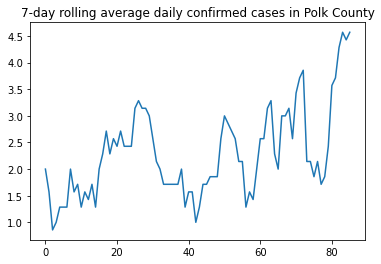

86 86
55095 Polk County 0.25116458870970026 0.019666692142861878


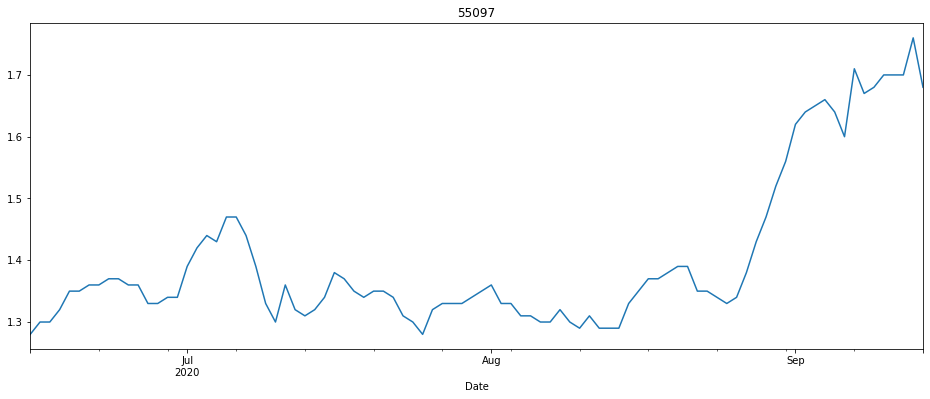

55097 Portage County 0.6859836007326823 4.5018697882142005e-14


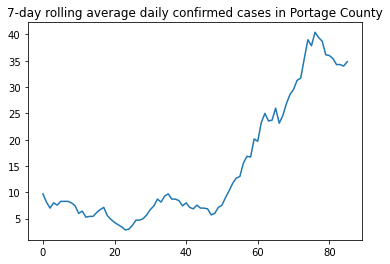

86 86
55097 Portage County 0.829815664497495 5.457601916566242e-23


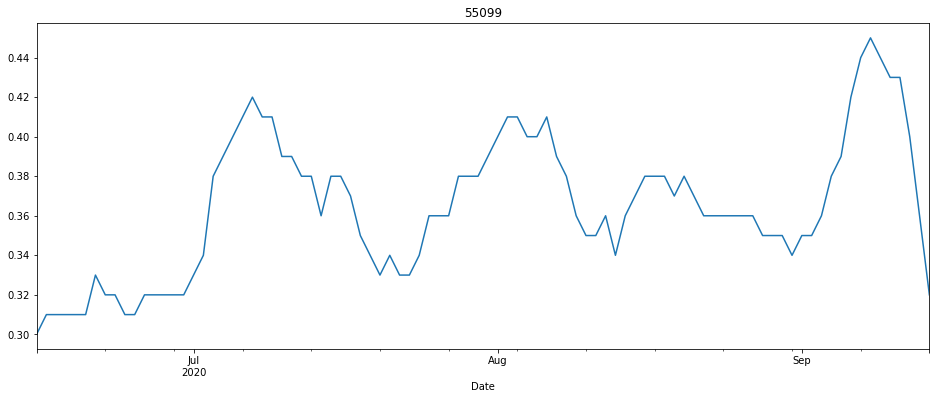

55099 Price County 0.3466889775876935 0.000710489139908256


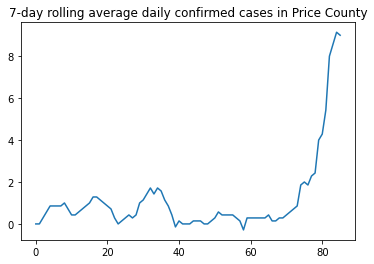

86 86
55099 Price County 0.21694612846922562 0.04481360696830017


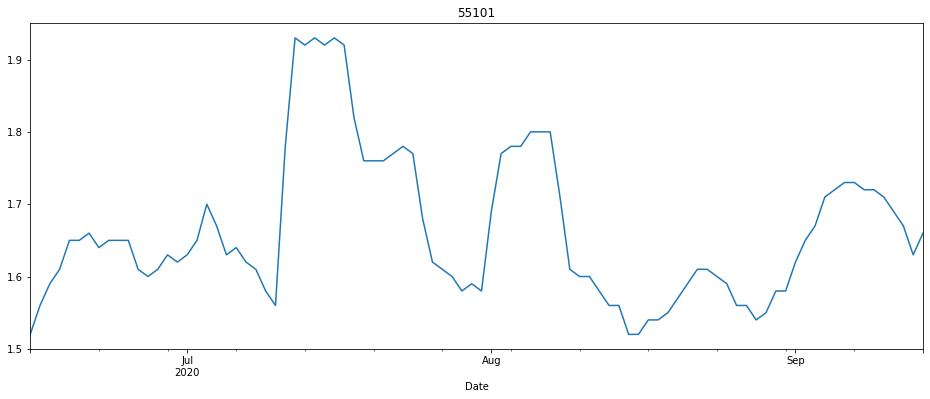

55101 Racine County 0.3304446450208941 0.0012951361647875492


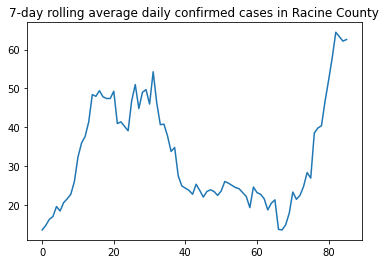

86 86
55101 Racine County 0.42897254904080495 3.7720396308183534e-05


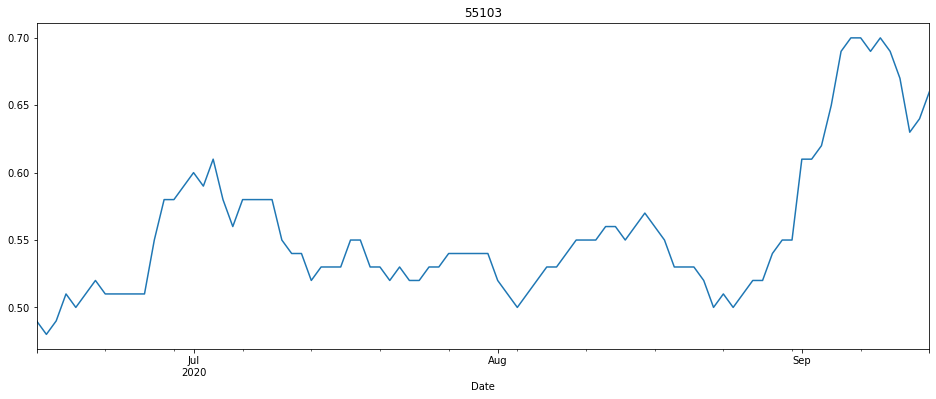

55103 Richland County 0.49791585450910547 4.4158653463679693e-07


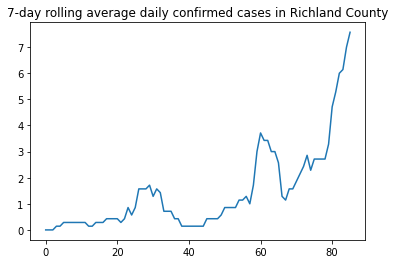

86 86
55103 Richland County 0.5727113779660027 8.323809177713118e-09


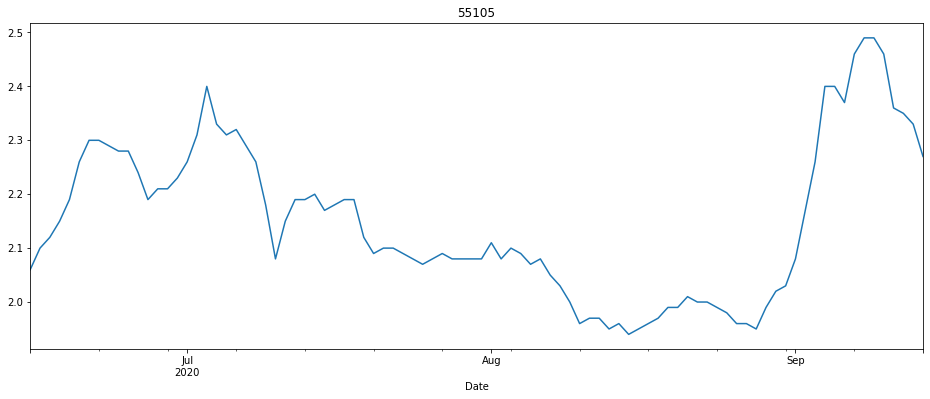

55105 Rock County 0.3153094330183303 0.00220239213388896


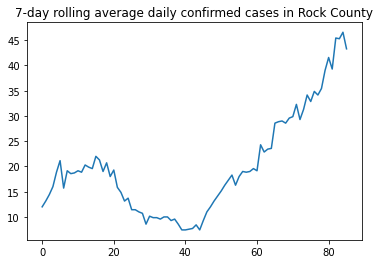

86 86
55105 Rock County 0.42763948488167136 4.011411671859188e-05


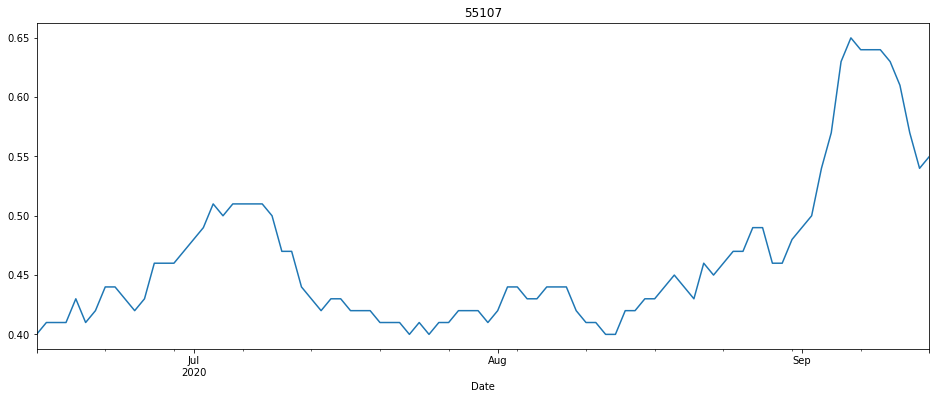

55107 Rusk County 0.333470989564961 0.0011608957696200065


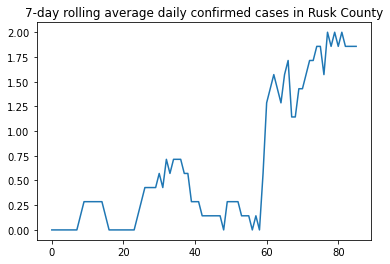

86 86
55107 Rusk County 0.6694047064051581 1.8401422157541026e-12


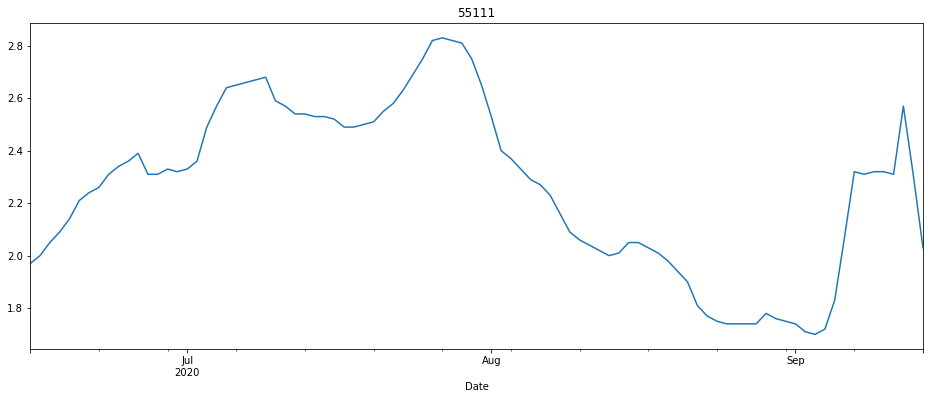

55111 Sauk County 0.038313820124303184 0.716902344941073


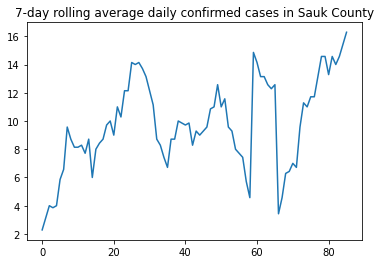

86 86
55111 Sauk County -0.012132950810313103 0.911716293542716


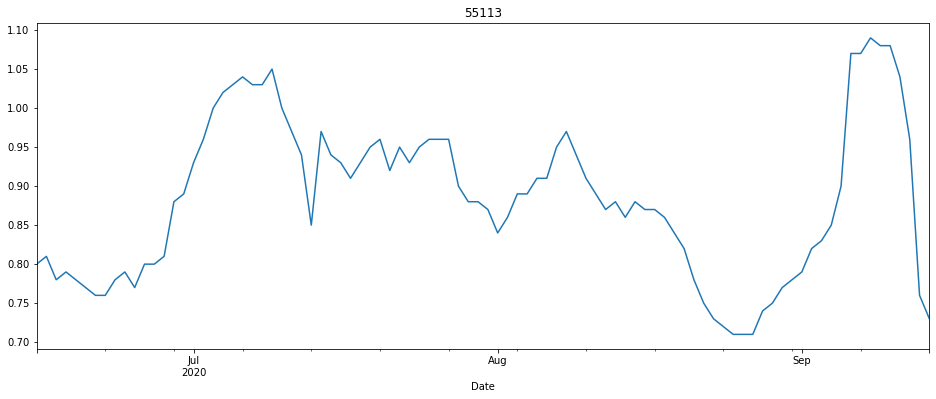

55113 Sawyer County 0.10484965623805036 0.31989331633079754


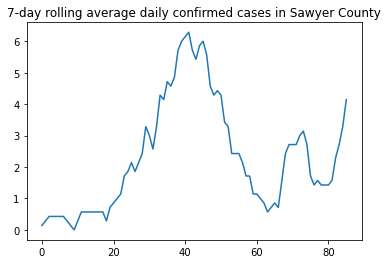

86 86
55113 Sawyer County 0.03182019170927247 0.7711706817655926


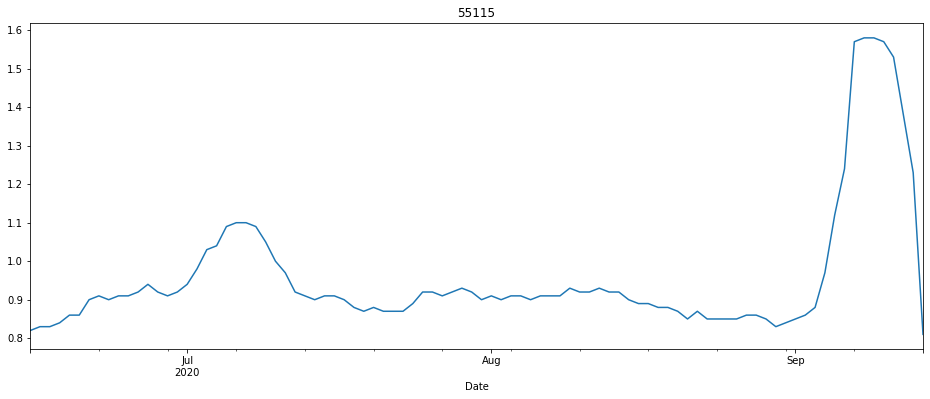

55115 Shawano County 0.6600186639367547 8.292770742063742e-13


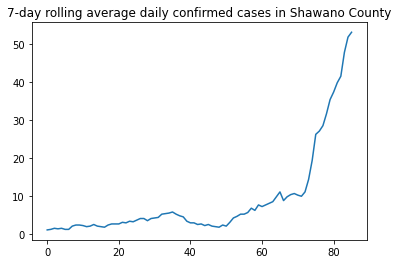

86 86
55115 Shawano County 0.6662464600307645 2.5450214045539427e-12


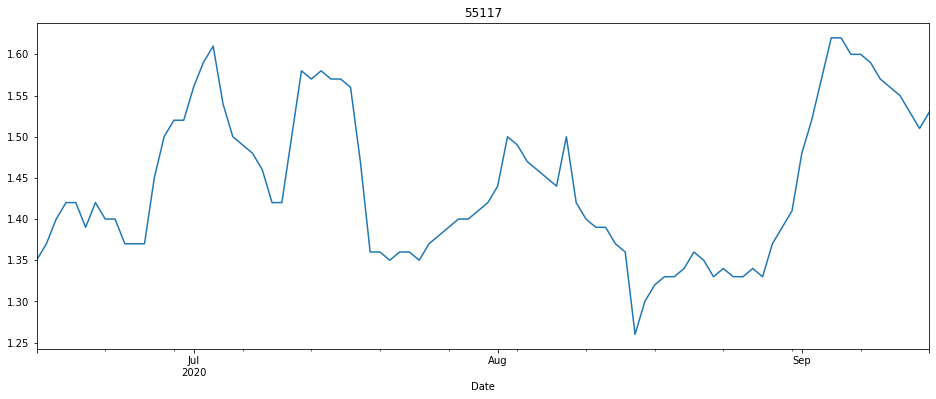

55117 Sheboygan County 0.1795543019078068 0.08678148413592449


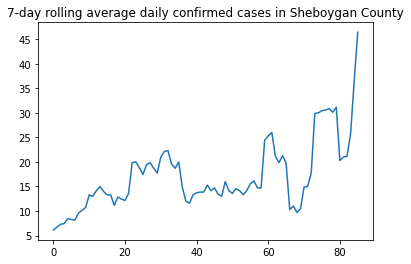

86 86
55117 Sheboygan County 0.33707543675679924 0.0015056667692125811


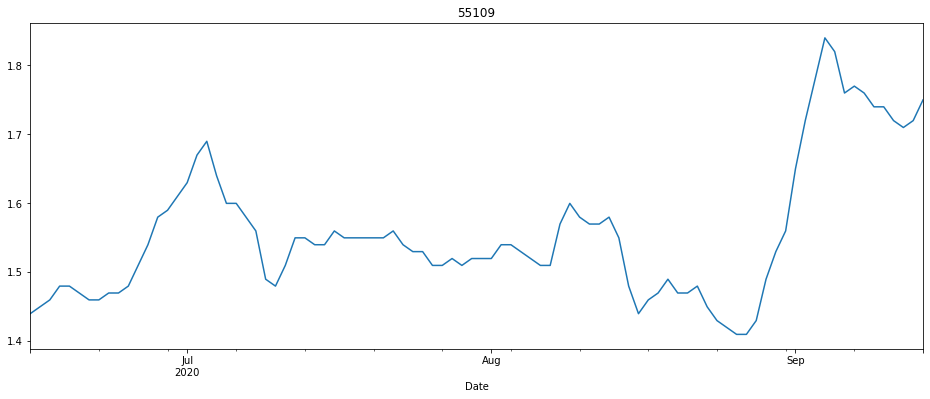

55109 St. Croix County 0.3036701782097972 0.003253601655316278


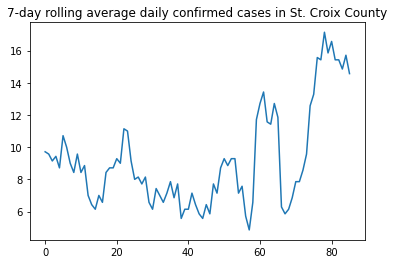

86 86
55109 St. Croix County 0.5940513502528246 1.6471949362016607e-09


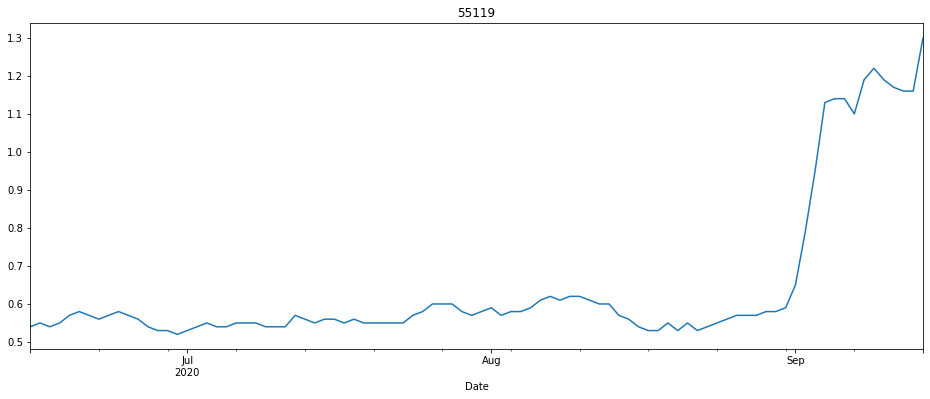

55119 Taylor County 0.49446033483705704 5.454002338055146e-07


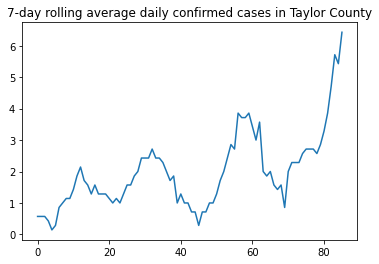

86 86
55119 Taylor County 0.6079569607407866 5.369654523811966e-10


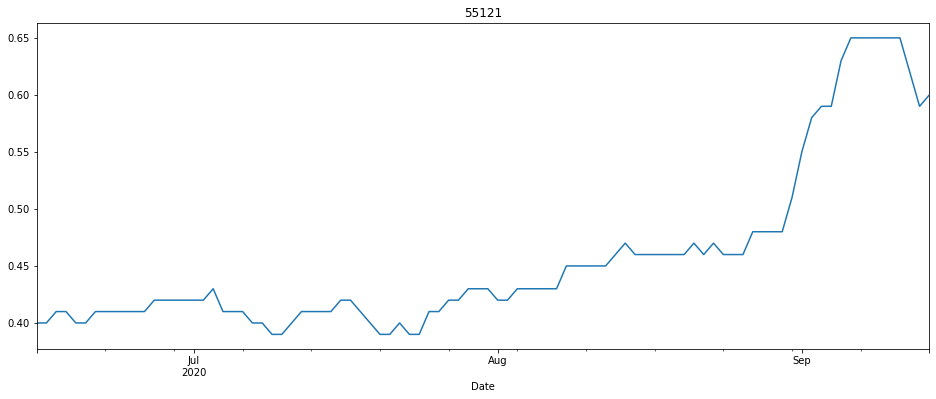

55121 Trempealeau County 0.4409312607610541 1.0873137940680485e-05


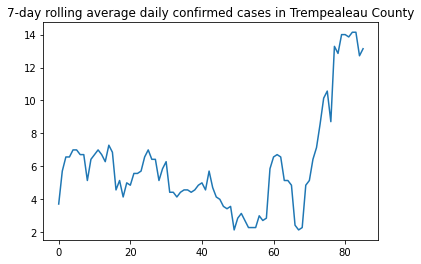

86 86
55121 Trempealeau County 0.7622509700978126 1.5299365962334836e-17


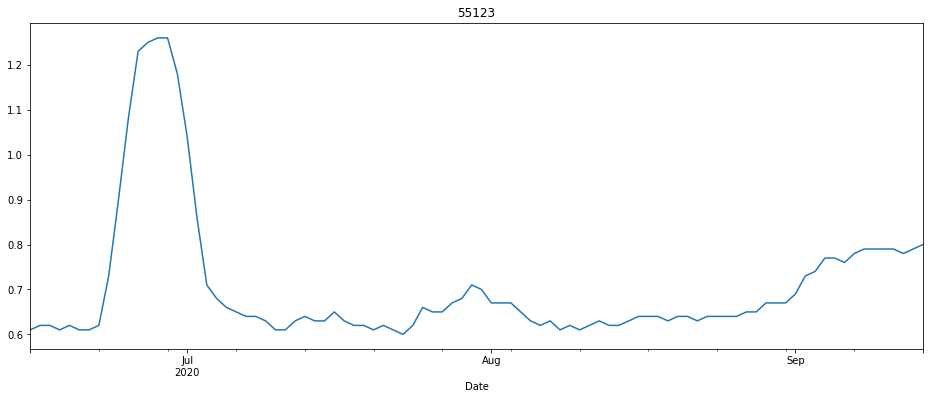

55123 Vernon County 0.013736743901133396 0.8965958212789318


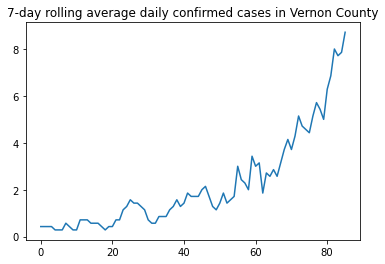

86 86
55123 Vernon County -0.014942863744689346 0.8913831370450677


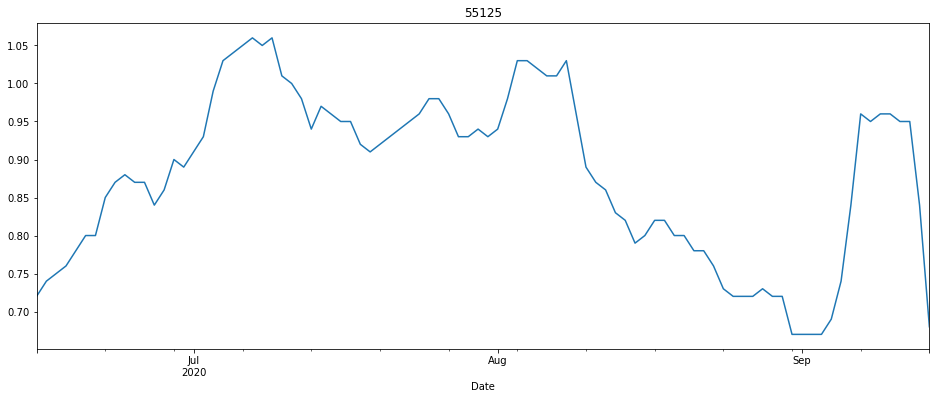

55125 Vilas County -0.08785967380327392 0.4049517128304956


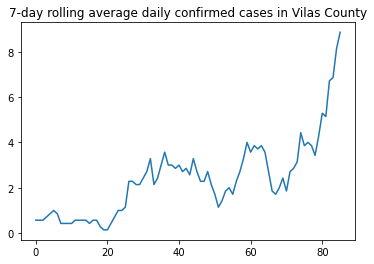

86 86
55125 Vilas County -0.2880235710209854 0.007162850104941477


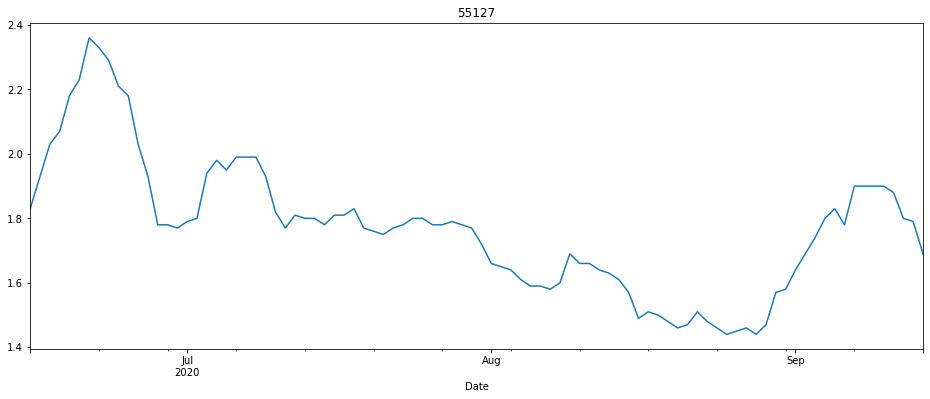

55127 Walworth County -0.30620014777551535 0.002992935172409042


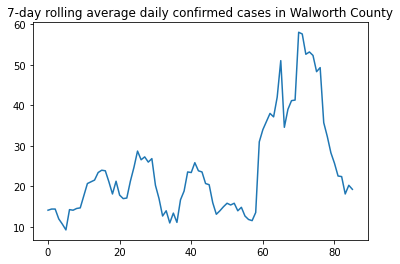

86 86
55127 Walworth County -0.37470412765267197 0.000378784344011583


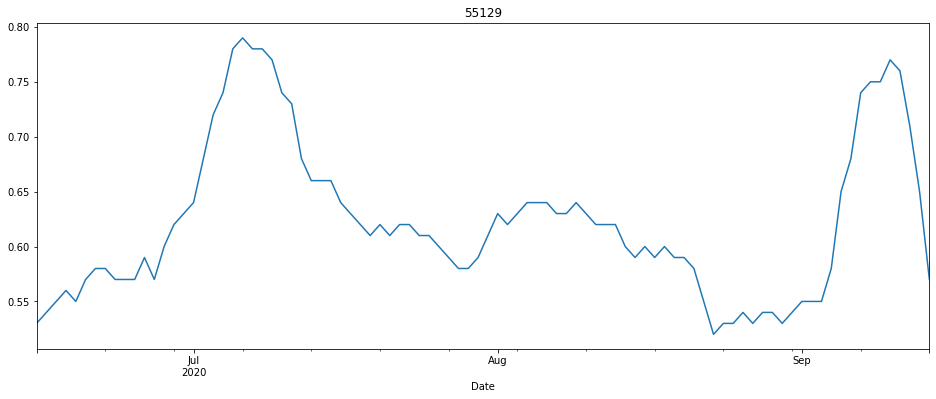

55129 Washburn County 0.13513404429363068 0.1990235608828551


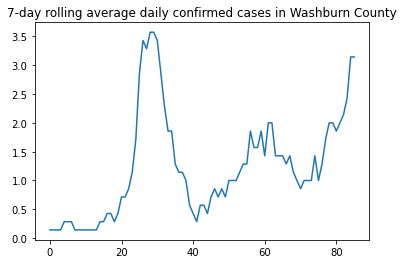

86 86
55129 Washburn County -0.07708749854418896 0.48051781595877124


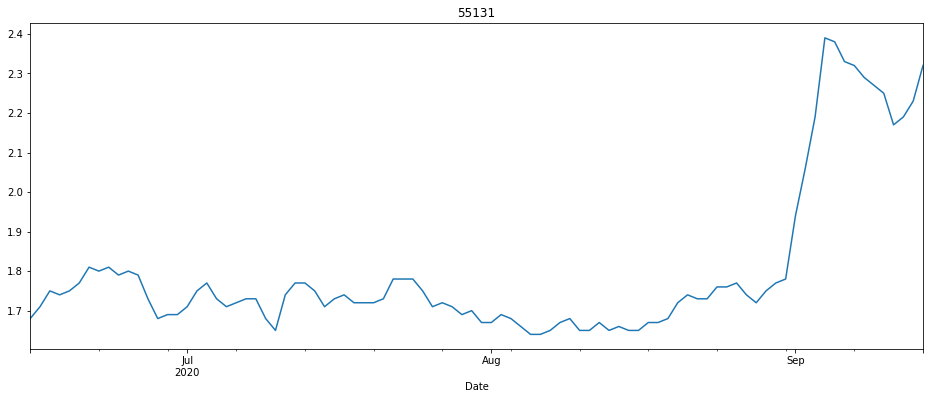

55131 Washington County 0.39996317917045465 7.813057840300656e-05


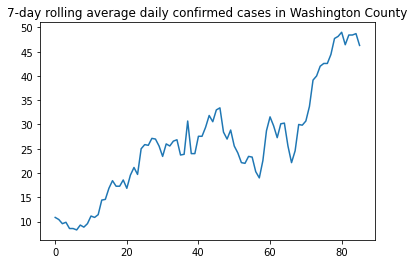

86 86
55131 Washington County 0.7098116262539287 1.990264430322486e-14


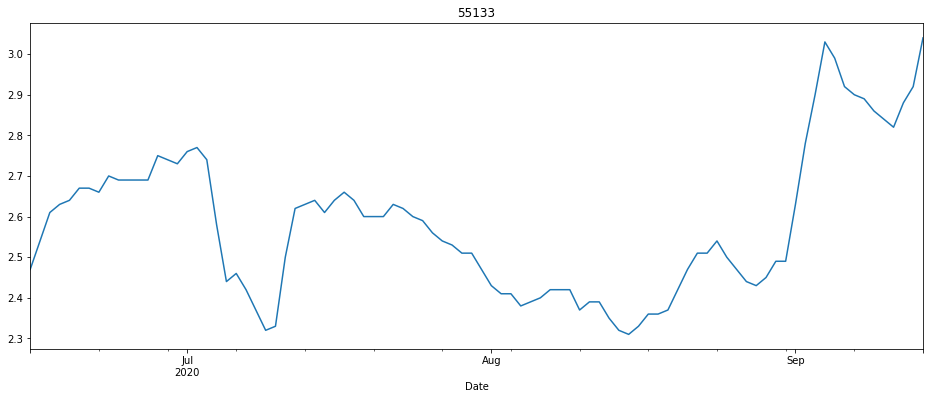

55133 Waukesha County 0.05257545570877417 0.6186704203250952


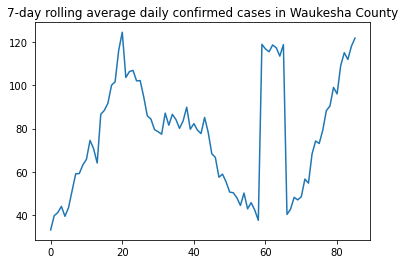

86 86
55133 Waukesha County 0.20935801693809702 0.05304020230589608


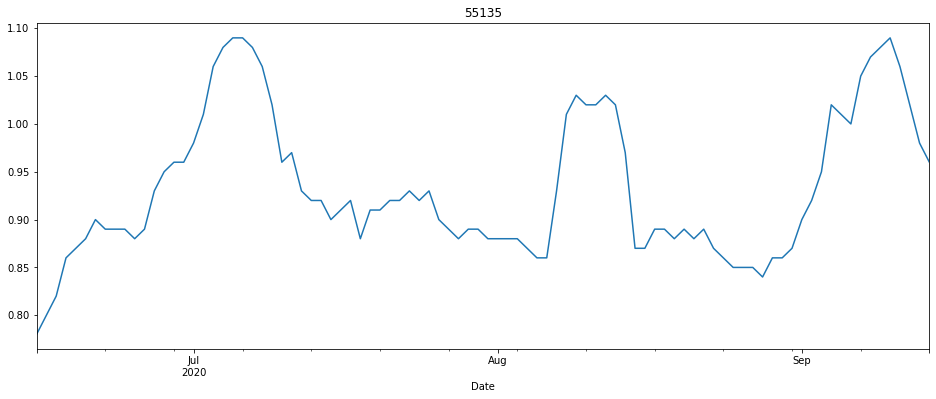

55135 Waupaca County 0.17751792973231453 0.09047725385926499


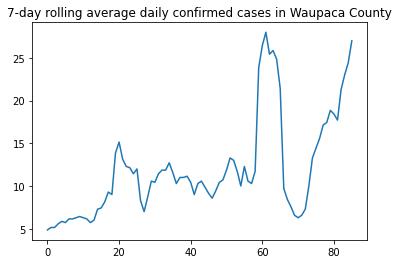

86 86
55135 Waupaca County 0.07016110940357596 0.5209263104225916


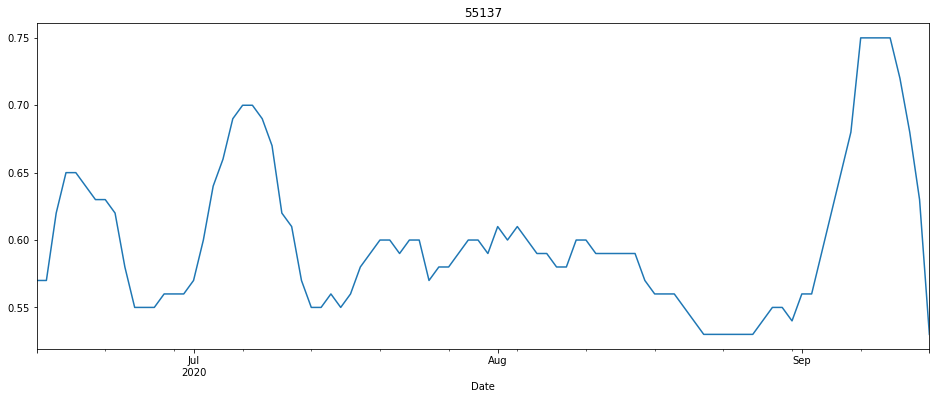

55137 Waushara County 0.19359417154040484 0.06445268257525415


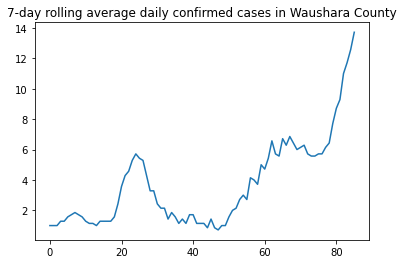

86 86
55137 Waushara County 0.07958830722512235 0.466351612715887


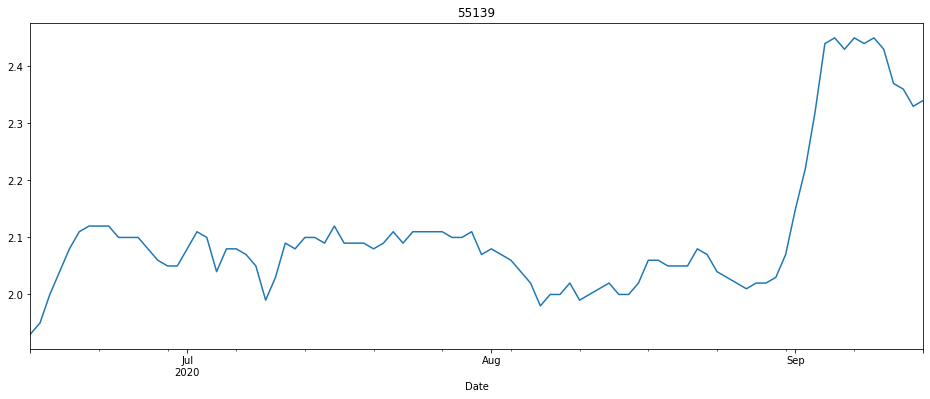

55139 Winnebago County 0.7260127318587215 2.6507952820238927e-16


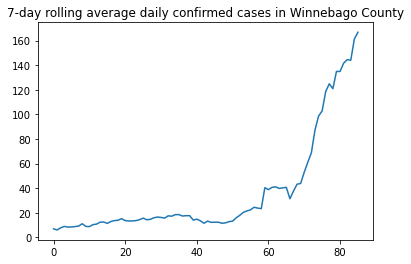

86 86
55139 Winnebago County 0.8645828569812083 7.847575691707425e-27


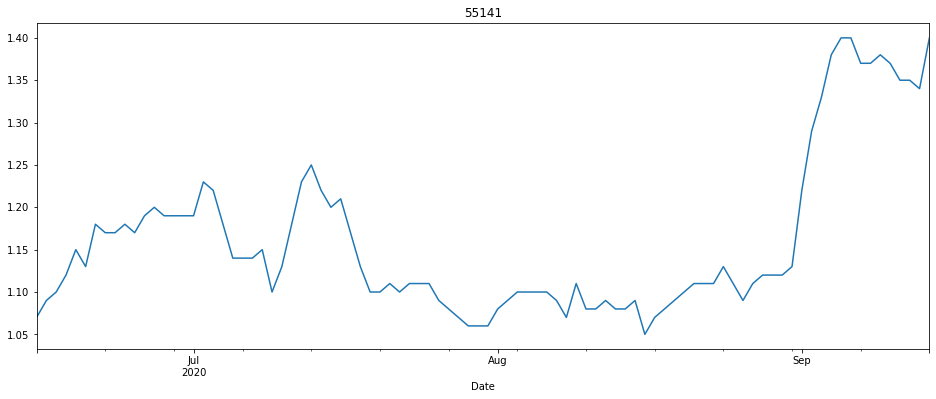

55141 Wood County 0.38499158633522496 0.0001510272339295993


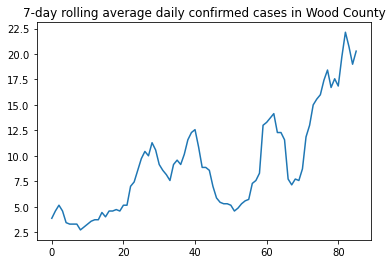

86 86
55141 Wood County 0.5707372700525509 9.613763354975158e-09


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def past_moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

pearson_list = list()
spearman_list = list()

fips_county_dict=dict()
fips_county_pearson_dict=dict()

    
## Cuebiq Contact Index data
path="./wisconsin_county_csv/"
df=pd.read_csv(path+'county_cuebiq_CCI.txt')
df.sort_values(by='county',inplace = True) 
#print(df.shape)
## Join FIPS Code
df_fips=pd.read_csv('state_and_county_fips_master.csv')
df_fips=df_fips[df_fips['state']=='WI']
CCI_df=df.merge(df_fips, how='left',left_on='county', right_on='name')
counties=CCI_df['county'].unique()
fips_codes = CCI_df['fips'].unique()
fips_county_dict = dict(zip(CCI_df.fips,CCI_df.county))
#print(CCI_df.head())


# Hospitialization Data
path="/Users/Song/COVID19/Cuebiq/"
hospitial_data = pd.read_csv(path+'/nyt_us-counties.csv', sep=',')
#print(hospitial_data.head())

for county in fips_codes:
    #print('county_fips:',county)
    df = CCI_df [(CCI_df['fips'] == county)]
    df = df.drop(['county','name','fips','state'],axis=1)
    # convert dataframe to series
    df = df.T.squeeze()
    distance_df = df.to_frame()
    distance_df.index.names = ['Date']
    distance_df.index = pd.to_datetime(df.index) # convert to datetime
    distance_df.columns=['Distance']
    distance_df['Distance'] = pd.to_numeric(distance_df['Distance'])
    distance_df=distance_df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
    start = distance_df.index.searchsorted(dt.datetime(2020, 6, 15))
    end = distance_df.index.searchsorted(dt.datetime(2020, 9, 15))
    distance_df = distance_df.iloc[start:end]
    #print(distance_df.shape)
    distance_df['Distance'].plot(figsize = (16,6))
    plt.title(county)
    plt.show()

    df = hospitial_data[hospitial_data['fips'] == county]
    #df['date'] = pd.to_datetime(df['date'])
    start_date = '2020-07-01'
    end_date = '2020-09-31'
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    df = df.loc[mask]
    #print(df.shape)
    df.set_index('date',inplace=True)
    df=df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
    start = df.index.searchsorted(start_date)
    end = df.index.searchsorted(end_date)
    state_hospitial_data = df.iloc[start:end]
    #state_hospitial_data['cases'].plot(figsize = (16,6))
    y=state_hospitial_data['cases']
    daily_hospitial_data = [None] * len(y)
    for i in range(1,len(y)):
        daily_hospitial_data[i] = y[i] - y[i-1]
    daily_hospitial_data[0] = daily_hospitial_data[1]
    #print(daily_hospitial_data)
    #plt.plot(daily_hospitial_data)
    #plt.title("Daily Confirmed Cases in County:"+str(county))
    #plt.show()
    ## Correlation
    x = np.array(distance_df['Distance'])
    x = x.astype(np.float)
    y = np.array(state_hospitial_data['cases'])
    r, p = scipy.stats.pearsonr(x, daily_hospitial_data)
    print(county,fips_county_dict[county],r,p)
    #r, p = scipy.stats.spearmanr(x, daily_hospitial_data)
    #print(state,r,p)
    daily_cases_moving_average = past_moving_average(daily_hospitial_data,7)
    plt.plot(daily_cases_moving_average)
    plt.title("7-day rolling average daily confirmed cases in "+str(fips_county_dict[county]))
    plt.show()
    x_moving_average = x[6:]
    print(len(x_moving_average),len(daily_cases_moving_average))
    r, p = scipy.stats.pearsonr(x_moving_average, daily_cases_moving_average)
    print(county,fips_county_dict[county],r,p)
    fips_county_pearson_dict[(county,fips_county_dict[county])]=(r,p)
    pearson_list.append(r)
    
    #r, p = scipy.stats.spearmanr(x_moving_average, daily_cases_moving_average)
    #spearman_list.append(r)
    #print(state,r,p)

0.3413949520285031 0.3521791555544511


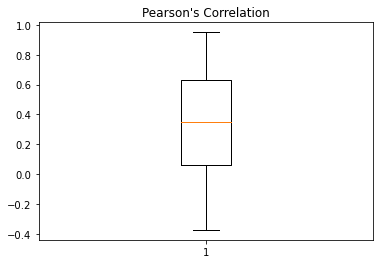

In [53]:
print(np.mean(pearson_list),np.median(pearson_list))
plt.boxplot(pearson_list)
plt.title("Pearson's Correlation")
plt.show()

In [50]:
fips_county_pearson_dict

{(55001, 'Adams County'): (-0.2665964190152123, 0.013093425026501295),
 (55003, 'Ashland County'): (-0.09936876972054985, 0.3626752752882651),
 (55005, 'Barron County'): (0.11886487482465026, 0.2756923138883246),
 (55007, 'Bayfield County'): (-0.14761318163453288, 0.17499733688604885),
 (55009, 'Brown County'): (0.324446420146903, 0.002306297566140274),
 (55011, 'Buffalo County'): (0.3735294180143085, 0.00039648304743138254),
 (55013, 'Burnett County'): (0.629724805131609, 8.294918094011071e-11),
 (55015, 'Calumet County'): (0.43815170385899727, 2.4519507186023967e-05),
 (55017, 'Chippewa County'): (0.48976081037831776, 1.702741428554878e-06),
 (55019, 'Clark County'): (0.6288541683888134, 8.963384309194335e-11),
 (55021, 'Columbia County'): (-0.11070563575090472, 0.31022876543281425),
 (55023, 'Crawford County'): (0.0984685807501402, 0.3670609041872582),
 (55025, 'Dane County'): (0.6575286516564408, 6.1062560612444315e-12),
 (55027, 'Dodge County'): (0.7562691376885593, 3.794861233374

## Find the optimal temporal lags

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def past_moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

pearson_list = list()
spearman_list = list()
lag_days = list()
fips_county_dict=dict()
fips_county_pearson_dict=dict()

## Output correlation results
fw=open('temporal_lag_correlation.txt','w')
fw.write('fips,county,pearson_corr,lag_days\n')

## Cuebiq Contact Index data
path="./wisconsin_county_csv/"
df=pd.read_csv(path+'county_cuebiq_CCI.txt')
df.sort_values(by='county',inplace = True) 
#print(df.shape)
## Join FIPS Code
df_fips=pd.read_csv('state_and_county_fips_master.csv')
df_fips=df_fips[df_fips['state']=='WI']
CCI_df=df.merge(df_fips, how='left',left_on='county', right_on='name')
counties=CCI_df['county'].unique()
fips_codes = CCI_df['fips'].unique()
fips_county_dict = dict(zip(CCI_df.fips,CCI_df.county))
#print(CCI_df.head())

# Hospitialization Data
path="/Users/Song/COVID19/Cuebiq/"
hospitial_data = pd.read_csv(path+'/nyt_us-counties.csv', sep=',')
#print(hospitial_data.head())

for county in fips_codes:
    df = hospitial_data[hospitial_data['fips'] == county]
    start_date = '2020-06-30'
    end_date = '2020-09-31'
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    df = df.loc[mask]
    #print(df.shape)
    df.set_index('date',inplace=True)
    df=df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
    start = df.index.searchsorted(start_date)
    end = df.index.searchsorted(end_date)
    state_hospitial_data = df.iloc[start:end]
    y=state_hospitial_data['cases']
    daily_hospitial_data = [None] * len(y)
    for i in range(1,len(y)):
        daily_hospitial_data[i] = y[i] - y[i-1]
    daily_hospitial_data[0] = daily_hospitial_data[1]
        
    #print('county_fips:',county)
    df = CCI_df [(CCI_df['fips'] == county)]
    df = df.drop(['county','name','fips','state'],axis=1)
    # convert dataframe to series
    df = df.T.squeeze()
    distance_df = df.to_frame()
    distance_df.index.names = ['Date']
    distance_df.index = pd.to_datetime(df.index) # convert to datetime
    distance_df.columns=['Distance']
    distance_df['Distance'] = pd.to_numeric(distance_df['Distance'])
    distance_df=distance_df.sort_index(ascending=True) # select ranges of dates, sort the rows by date first
    
    ## correlation with temporal lags 
    temp_pearson_list = list()
    temp_spearman_list = list()
    for d in range(7,21):
        start = distance_df.index.searchsorted(dt.datetime(2020, 6,30-d))
        end = distance_df.index.searchsorted(dt.datetime(2020, 9, 31-d))
        #print(start,end)
        state_distance_df = distance_df.iloc[start:end]

        ## Correlation
        x = np.array(state_distance_df['Distance'])
        x = x.astype(np.float)
        y = np.array(state_hospitial_data['cases'])
        move_days = 7
        daily_cases_moving_average = moving_average(daily_hospitial_data,move_days)
        x_moving_average = x[(move_days-1):]
        r, p = scipy.stats.pearsonr(x_moving_average, daily_cases_moving_average)
        temp_pearson_list.append(r)
        r, p = scipy.stats.spearmanr(x_moving_average, daily_cases_moving_average)
        temp_spearman_list.append(r)
    max_pearson=np.max(temp_pearson_list)
    pearson_list.append(max_pearson)
    position = np.argmax(temp_pearson_list) + 7
    lag_days.append(position)
    print(county,fips_county_dict[county],max_pearson,position)
    fw.write(str(county)+','+fips_county_dict[county]+','+str(max_pearson)+','+str(position)+'\n')
fw.close()

55001 Adams County -0.17724542958558542 19
55003 Ashland County 0.35431054279348134 20
55005 Barron County 0.4607194534547965 20
55007 Bayfield County 0.2567674515409868 20
55009 Brown County 0.38158759182880186 20
55011 Buffalo County 0.4136583503035551 7
55013 Burnett County 0.6697596204650248 17
55015 Calumet County 0.441788380192941 17
55017 Chippewa County 0.5148838630301094 14
55019 Clark County 0.7350201675330373 20
55021 Columbia County -0.04126237807550828 17
55023 Crawford County 0.28835233761000323 19
55025 Dane County 0.6825741787811686 13
55027 Dodge County 0.7710127922197448 14
55029 Door County -0.12431876761189029 18
55031 Douglas County 0.39067029270757464 11
55033 Dunn County 0.9512877850187558 16
55035 Eau Claire County 0.9412928731104369 16
55037 Florence County -0.05963406441350483 18
55039 Fond du Lac County 0.3759409148549507 17
55041 Forest County 0.5836808850287023 18
55043 Grant County 0.9136609504767862 17
55045 Green County 0.20944936864382588 10
55047 Green

0.45192182128222097 0.45283871204741977


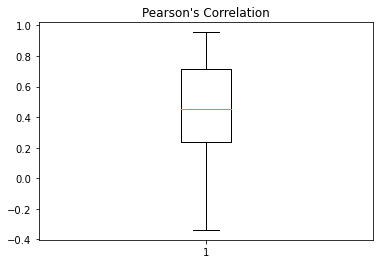

16.5 17.0


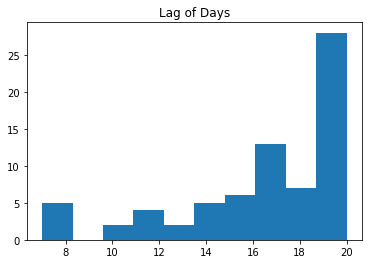

In [9]:
print(np.mean(pearson_list),np.median(pearson_list))
plt.boxplot(pearson_list)
plt.title("Pearson's Correlation")
plt.show()

print(np.mean(lag_days),np.median(lag_days))
plt.hist(lag_days)
plt.title("Lag of Days")
plt.savefig('lag_days.png',dpi=300)
plt.show()

    fips           county          pearson_corr lag_days
0  55001     Adams County  -0.17724542958558542       19
1  55003   Ashland County   0.35431054279348134       20
2  55005    Barron County    0.4607194534547965       20
3  55007  Bayfield County    0.2567674515409868       20
4  55009     Brown County   0.38158759182880186       20
   OBJECTID  GEOID     GEO      NAME        DATE  POSITIVE  NEGATIVE  DEATHS  \
0      3094  55037  County  Florence  2020-10-16       149      1047       4   
1      3685  55051  County      Iron  2020-10-16       159      1629       1   
2      3721  55091  County     Pepin  2020-10-16        86      1673       0   
3      3928  55041  County    Forest  2020-10-16       392      2206      10   
4      3998  55107  County      Rusk  2020-10-16       139      2532       1   

     POP  PCT_POP_65  ...     ShapeSTLen  POS_NEW  NEG_NEW  DTH_NEW  TEST_NEW  \
0   4337   26.283646  ...  265968.749079        0        2        0         2   
1   5715   29.8

OBJECTID  GEOID     GEO       NAME        DATE  POSITIVE  NEGATIVE  \
0       3094  55037  County   Florence  2020-10-16       149      1047   
1       3685  55051  County       Iron  2020-10-16       159      1629   
2       3721  55091  County      Pepin  2020-10-16        86      1673   
3       3928  55041  County     Forest  2020-10-16       392      2206   
4       3998  55107  County       Rusk  2020-10-16       139      2532   
..       ...    ...     ...        ...         ...       ...       ...   
67      4564  55101  County     Racine  2020-10-16      6036     71984   
68      4565  55009  County      Brown  2020-10-16     12848     80659   
69      4567  55133  County   Waukesha  2020-10-16      9935     91837   
70      4579  55025  County       Dane  2020-10-16     12296    214057   
71      4580  55079  County  Milwaukee  2020-10-16     34400    279095   

    DEATHS     POP  PCT_POP_65  ...  TEST_NEW  HOSP_YES  HOSP_NO  HOSP_UNK  \
0        4    4337   26.283646  ...         2        15       88        46   
1        1    5715   29.876797  ...         6         8      123        28   
2        0    7262   23.009933  ...        17         5       68        13   
3       10    9018   22.903507  ...        24        16      267       109   
4        1   14183   24.982799  ...       118         4       27       108   
..     ...     ...         ...  ...       ...       ...      ...       ...   
67     101  195398   16.372484  ...       178       503     4669       864   
68      84  259786   14.707159  ...       787       473     8301      4074   
69     103  398879   18.654331  ...       831       528     4769      4638   
70      46  529843   13.852328  ...      1838       450     5378      6468   
71     554  954209   13.374887  ...      1486      2937    17667     13796   

    POP_MOE                                           geometry   fips  \
0      None  POLYGON ((-9855436.248 5783746.772, -9855419.3...  55037   
1      None  POLYGON ((-10065330.011 5871537.422, -10065330...  55051   
2      None  POLYGON ((-10202472.324 5571853.988, -10202470...  55091   
3      None  POLYGON ((-9890834.255 5786816.172, -9890822.9...  55041   
4      None  POLYGON ((-10094312.954 5722570.378, -10094313...  55107   
..      ...                                                ...    ...   
67     None  POLYGON ((-9776779.458 5287989.466, -9776764.8...  55101   
68     None  MULTIPOLYGON (((-9823958.337 5571249.848, -982...  55009   
69     None  POLYGON ((-9842645.971 5341655.052, -9842622.3...  55133   
70     None  POLYGON ((-9908452.731 5355428.082, -9908452.6...  55025   
71     None  MULTIPOLYGON (((-9796540.430 5341331.958, -979...  55079   

              county          pearson_corr  lag_days  
0    Florence County  -0.05963406441350483        18  
1        Iron County     0.444957970640043        20  
2       Pepin County    0.2592046704735842        20  
3      Forest County    0.5836808850287023        18  
4        Rusk County      0.72899500473105        13  
..               ...                   ...       ...  
67     Racine County    0.5118204913614656        20  
68      Brown County   0.38158759182880186        20  
69   Waukesha County   0.22050446875077762        15  
70       Dane County    0.6825741787811686        13  
71  Milwaukee County   0.20963553291555306        19  

[72 rows x 34 columns]

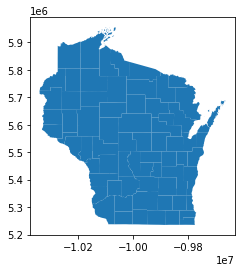

In [1]:
import pandas as pd #used to read in the revenue file 
import matplotlib.pyplot as plt #for plotting
#to read in shape file and provides high #level interface with #matplotlib library for making maps
import geopandas as gpd
#import locally saved file
df_corr = pd.read_csv('temporal_lag_correlation.txt',dtype=object)
print(df_corr.head())

#import world shape map externally, no need to have a saved file
WI_shp = gpd.read_file('/Users/Song/COVID19/Wisconsin/COVID-19_Data_by_County-shp/COVID-19_Data_by_County.shp')
print(WI_shp.head())
WI_shp.plot()
#merge both data sets using fips code as unique identifiers
WI = WI_shp.merge(df_corr, how='left', left_on = 'GEOID', right_on = 'fips')
WI

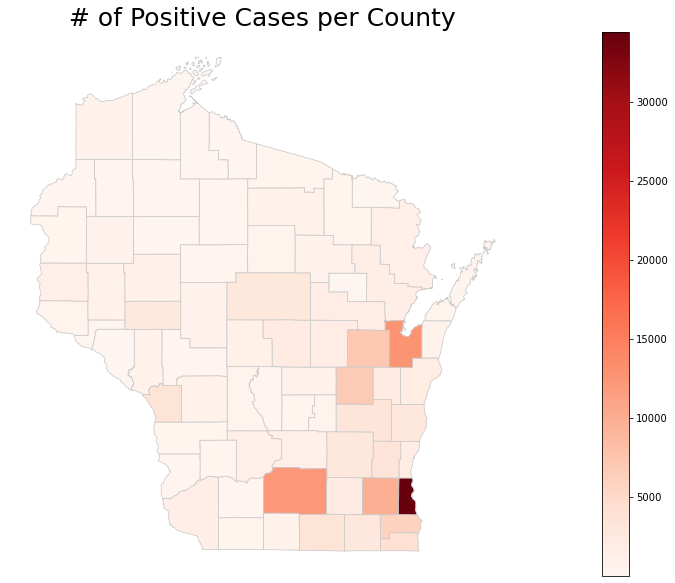

In [2]:
# set the value column that will be visualised
variable = 'POSITIVE'
# set the range for the choropleth values
vmin, vmax = 10, max(WI['POSITIVE'])
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('# of Positive Cases per County', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
WI.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

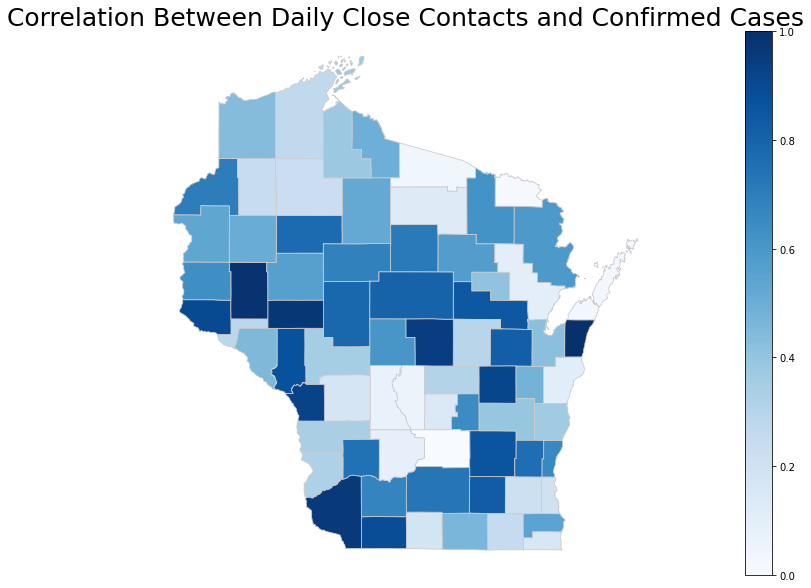

In [6]:
# set the value column that will be visualised
variable = 'pearson_corr'
# set the range for the choropleth values
vmin, vmax = 0, 1
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Correlation Between Daily Close Contacts and Confirmed Cases', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
WI.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.savefig('WI_county_corr.png',dpi=300)